In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()



# 그래프 기본 설정
#plt.rcParams['font.family'] = 'NanumGothic' #리눅스용
plt.rcParams['font.family'] = 'Malgun Gothic' #윈도우용
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


#label_encoder
from sklearn.preprocessing import LabelEncoder

#다중공산성을 봐봅시다
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#파일 경로
file_dir = "C:/Users/sherm/Desktop/workspace/likeLion_final_project/data/train/0.종합본/"

In [265]:
df=pd.read_parquet(file_dir + "train_잔액정보_append.parquet")

### 기본 정보들

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800000 entries, 0 to 4799999
Data columns (total 83 columns):
 #   Column             Dtype  
---  ------             -----  
 0   기준년월               int64  
 1   ID                 object 
 2   잔액_일시불_B0M         int64  
 3   잔액_할부_B0M          int64  
 4   잔액_현금서비스_B0M       int64  
 5   잔액_리볼빙일시불이월_B0M    int64  
 6   잔액_리볼빙CA이월_B0M     int64  
 7   잔액_카드론_B0M         int64  
 8   월중평잔_일시불_B0M       int64  
 9   월중평잔_할부_B0M        int64  
 10  월중평잔_CA_B0M        int64  
 11  카드론잔액_최종경과월        int64  
 12  연체일자_B0M           float64
 13  연체잔액_B0M           int64  
 14  연체잔액_일시불_B0M       int64  
 15  연체잔액_할부_B0M        int64  
 16  연체잔액_현금서비스_B0M     int64  
 17  연체잔액_카드론_B0M       int64  
 18  연체잔액_대환론_B0M       int64  
 19  잔액_현금서비스_B1M       int64  
 20  잔액_현금서비스_B2M       int64  
 21  잔액_카드론_B1M         int64  
 22  잔액_카드론_B2M         int64  
 23  잔액_카드론_B3M         int64  
 24  잔액_카드론_B4M         int64  
 25  잔액_카드론_B5M        

In [297]:
encoder=LabelEncoder()
df['Segment']=encoder.fit_transform(df['Segment'])

- 유일한 범주형 변수는 라벨링 걸어주기

In [298]:
df_temp=df.drop(['기준년월','ID'],axis=1)

In [310]:
df_temp

,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,월중평잔_CA_B0M,연체잔액_B0M,...,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M,Segment
0,998,962,22971,0,0,0,1084,547,25032,0,...,2440,0,0,0,572,0,17008,0,0,3
1,998,962,22971,0,0,0,1084,547,25032,0,...,2440,0,0,0,572,0,17008,0,0,3
2,998,962,22971,0,0,0,1084,547,25032,0,...,2440,0,0,0,572,0,17008,0,0,3
3,2565,2390,0,0,0,0,4090,2553,0,0,...,2677,0,2830,0,2736,0,0,0,0,4
4,2565,2390,0,0,0,0,4090,2553,0,0,...,2677,0,2830,0,2736,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4799996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4799997,1110,4093,0,0,0,0,637,2780,0,0,...,2415,0,0,0,6558,0,0,0,0,4
4799998,1110,4093,0,0,0,0,637,2780,0,0,...,2415,0,0,0,6558,0,0,0,0,4


In [41]:
temp=df_temp.var()[df_temp.var() < 1e-3].index.to_list()

### 전처리

In [299]:
drop_list=['연체일자_B0M','카드론잔액_최종경과월','최종연체개월수_R15M','RV잔액이월횟수_R3M','RV잔액이월횟수_R6M','연체잔액_일시불_해외_B0M','연체잔액_CA_해외_B0M']

In [300]:
df_temp.drop(drop_list, axis=1,inplace=True)

In [301]:
df_temp

,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,월중평잔_CA_B0M,연체잔액_B0M,...,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M,Segment
0,998,962,22971,0,0,0,1084,547,25032,0,...,2440,0,0,0,572,0,17008,0,0,3
1,998,962,22971,0,0,0,1084,547,25032,0,...,2440,0,0,0,572,0,17008,0,0,3
2,998,962,22971,0,0,0,1084,547,25032,0,...,2440,0,0,0,572,0,17008,0,0,3
3,2565,2390,0,0,0,0,4090,2553,0,0,...,2677,0,2830,0,2736,0,0,0,0,4
4,2565,2390,0,0,0,0,4090,2553,0,0,...,2677,0,2830,0,2736,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4799996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4799997,1110,4093,0,0,0,0,637,2780,0,0,...,2415,0,0,0,6558,0,0,0,0,4
4799998,1110,4093,0,0,0,0,637,2780,0,0,...,2415,0,0,0,6558,0,0,0,0,4


## EDA

### VIF

X = df_temp.drop('Segment',axis=1)
X_const = add_constant(X)
vif_df_01 = pd.DataFrame()
vif_df_01["feature"] = X.columns
vif_df_01["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

In [270]:
X = df_temp.drop('Segment',axis=1) 
X_const = add_constant(X) 
vif_df_01 = pd.DataFrame() 
vif_df_01["feature"] = X.columns 
vif_df_01["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

In [273]:
vif_df_01.nlargest(60,'VIF')

,feature,VIF
9,연체잔액_B0M,4.881283e+08
1,잔액_할부_B0M,4.382848e+08
41,잔액_할부_무이자_B0M,2.965835e+08
12,연체잔액_현금서비스_B0M,2.179988e+08
40,잔액_할부_유이자_B0M,7.708193e+07
13,연체잔액_카드론_B0M,3.361297e+07
11,연체잔액_할부_B0M,2.384816e+07
14,연체잔액_대환론_B0M,1.128089e+07
10,연체잔액_일시불_B0M,8.110160e+06
7,월중평잔_할부_B0M,3.243226e+02


In [260]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def calculate_vif_fast(X):
    vif_data = []
    for i in range(X.shape[1]):
        y = X.iloc[:, i]
        X_others = X.drop(X.columns[i], axis=1)
        model = LinearRegression().fit(X_others, y)
        r_squared = model.score(X_others, y)
        vif = 1 / (1 - r_squared) if r_squared < 1 else np.inf
        vif_data.append(vif)
    return pd.DataFrame({'variable': X.columns, 'VIF': vif_data})


In [302]:
X = df_temp.drop('Segment',axis=1)
X_const = add_constant(X)
temp=calculate_vif_fast(X_const)

KeyboardInterrupt: 

In [ ]:
temp.nlargest(60, "VIF")

In [37]:
drop_list=list(temp.nlargest(60, "VIF")['variable'])[1:]
df_drop=df_temp.drop(drop_list, axis=1)
df_drop

,잔액_리볼빙CA이월_B0M,연체원금_B2M,연체일수_최근,최종연체회차,매각잔액_B1M,잔액_할부_해외_B0M,연체잔액_RV일시불_B0M,연체잔액_CA_B0M,평잔_할부_해외_3M,평잔_CA_해외_3M,평잔_할부_해외_6M,평잔_CA_해외_6M,Segment
0,0,0,-999999,0,0,0,0,0,0,0,0,0,3
1,0,0,-999999,0,0,0,0,0,0,0,0,0,3
2,0,0,-999999,0,0,0,0,0,0,0,0,0,3
3,0,0,-999999,0,0,0,0,0,0,0,0,0,4
4,0,0,-999999,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799995,0,0,-999999,-99,0,0,0,0,0,0,0,0,4
4799996,0,0,-999999,-99,0,0,0,0,0,0,0,0,4
4799997,0,0,-999999,-99,0,0,0,0,0,0,0,0,4
4799998,0,0,-999999,-99,0,0,0,0,0,0,0,0,4


In [ ]:
vif_df

### 1D

#### Segment
 - 타겟변수 고객의 분류

In [321]:
df_temp['Segment'].value_counts()

Segment
4    3844104
3     698484
2     255180
0       1944
1        288
Name: count, dtype: int64

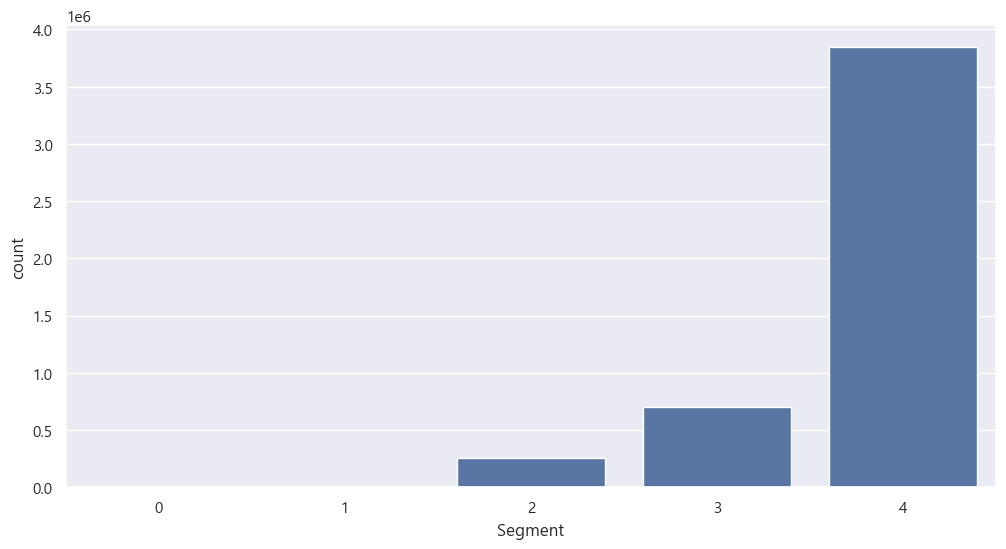

In [323]:
sns.countplot(x=df_temp['Segment'])
plt.show()

#### 잔액_일시불_B0M
 - 잔액_일시불(당원)

In [64]:
df_temp['잔액_일시불_B0M'].describe()

count    4.800000e+06
mean     3.358514e+03
std      6.356762e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.327000e+03
75%      3.944000e+03
max      2.227670e+05
Name: 잔액_일시불_B0M, dtype: float64

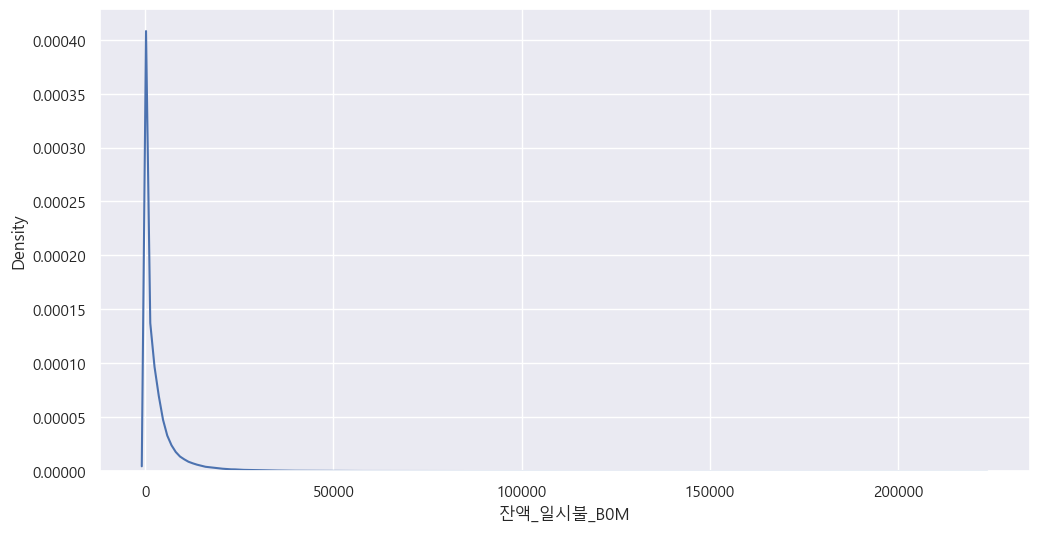

In [66]:
sns.kdeplot(x=df_temp['잔액_일시불_B0M'])
plt.show()

<Axes: xlabel='잔액_일시불_B0M'>

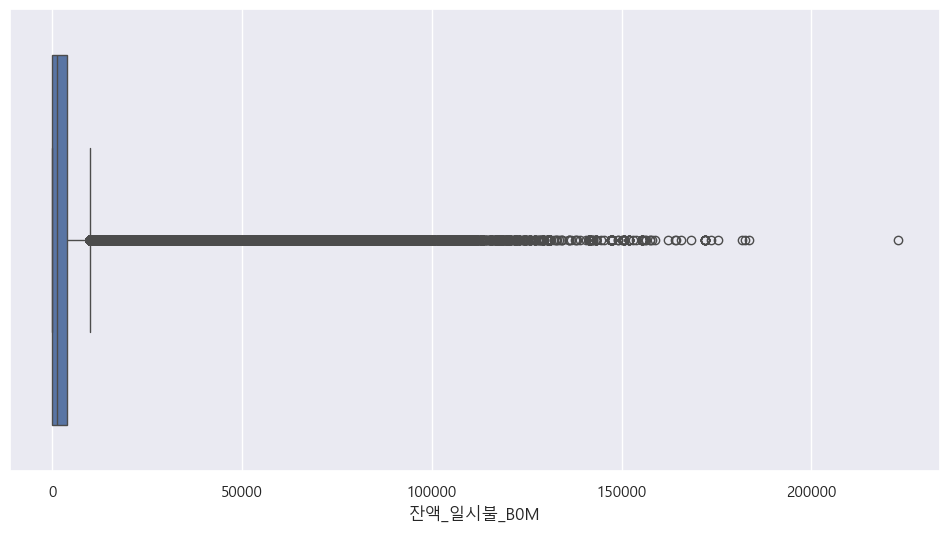

In [68]:
sns.boxplot(x=df_temp['잔액_일시불_B0M'])

#### 잔액_할부_B0M
- 잔액_할부(당월)

In [75]:
df_temp['잔액_할부_B0M'].value_counts().sort_values()

잔액_할부_B0M
32688          1
21083          1
25901          1
26654          1
28473          1
          ...   
1809         617
1574         626
1785         628
1921         643
0        3138759
Name: count, Length: 25495, dtype: int64

In [69]:
df_temp['잔액_할부_B0M'].describe()

count    4.800000e+06
mean     1.655338e+03
std      3.671084e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.022000e+03
max      7.146500e+04
Name: 잔액_할부_B0M, dtype: float64

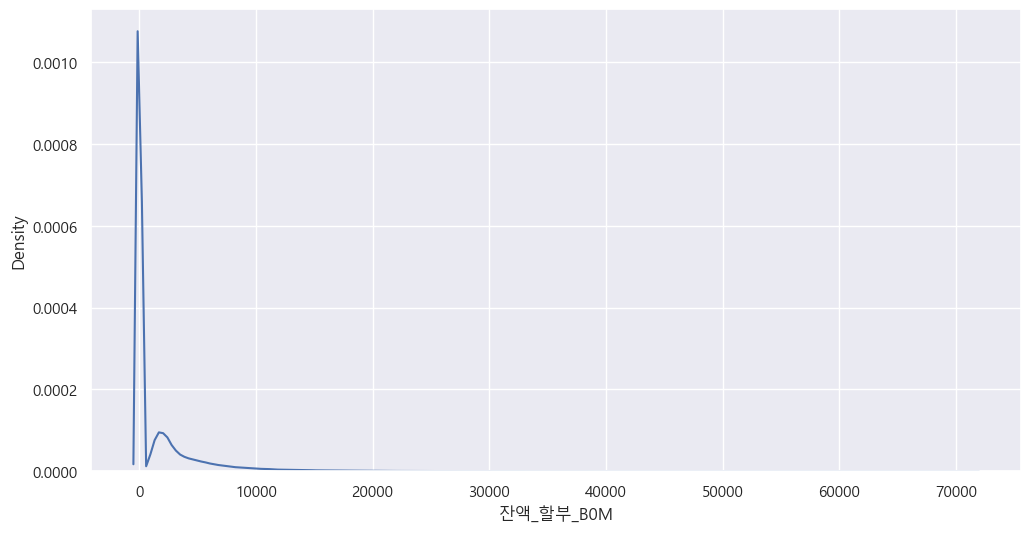

In [74]:
sns.kdeplot(x=df_temp['잔액_할부_B0M'])
plt.show()

<Axes: xlabel='잔액_할부_B0M'>

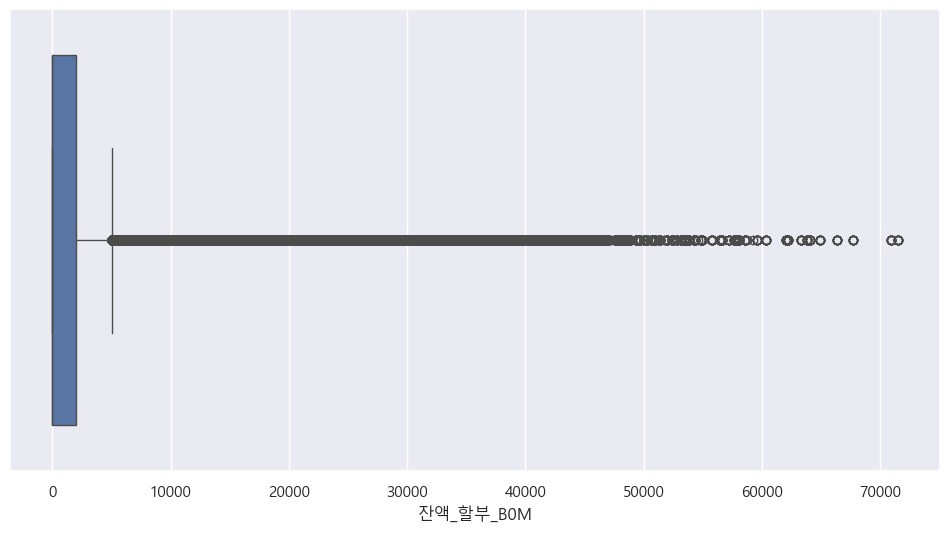

In [72]:
sns.boxplot(x=df_temp['잔액_할부_B0M'])

#### 잔액_현금서비스_B0M
- 잔액_현금서비스(당월)

In [80]:
df_temp['잔액_현금서비스_B0M'].value_counts()

잔액_현금서비스_B0M
0        4548260
9032         102
8077          85
6833          82
6160          77
          ...   
20248          1
4883           1
43771          1
33005          1
31696          1
Name: count, Length: 25915, dtype: int64

In [77]:
df_temp['잔액_현금서비스_B0M'].describe()

count    4.800000e+06
mean     7.012327e+02
std      3.564569e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.217200e+04
Name: 잔액_현금서비스_B0M, dtype: float64

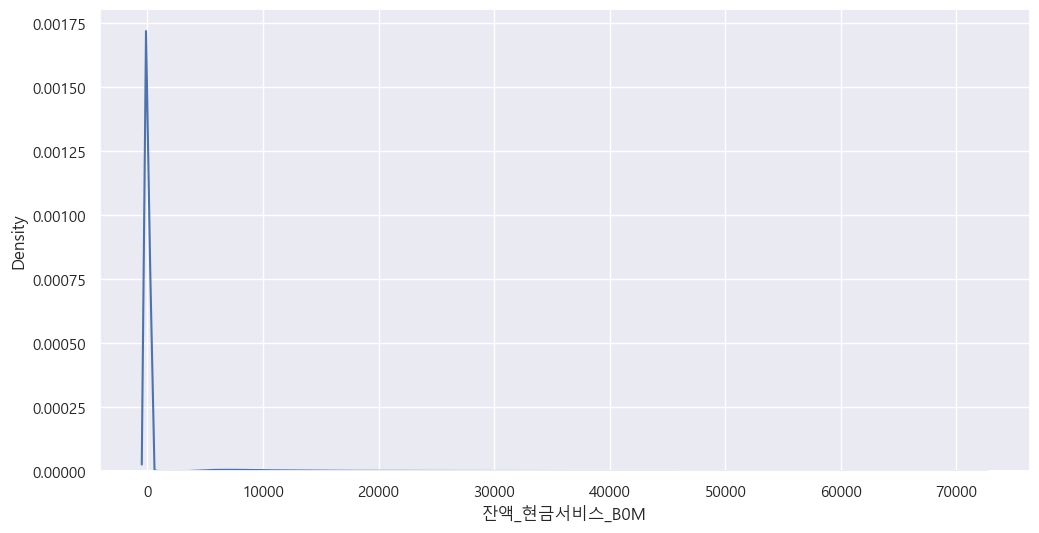

In [78]:
sns.kdeplot(x=df_temp['잔액_현금서비스_B0M'])
plt.show()

<Axes: xlabel='잔액_현금서비스_B0M'>

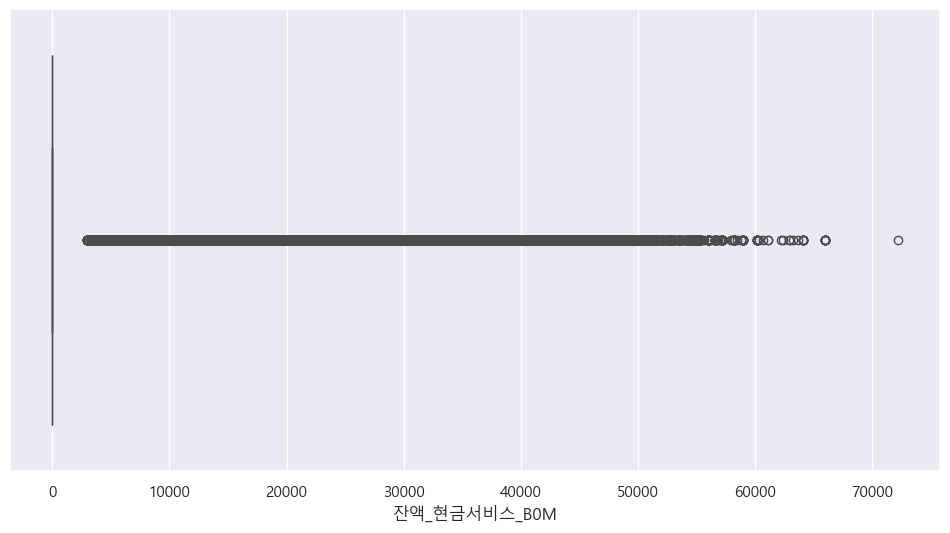

In [79]:
sns.boxplot(x=df_temp['잔액_현금서비스_B0M'])

#### 잔액_총합_B0M(파생변수)
- 잔액_전체이용량(당월)

In [81]:
df_temp["잔액_총합_B0M"]=df_temp["잔액_일시불_B0M"]+df_temp["잔액_할부_B0M"]+df_temp['잔액_현금서비스_B0M']

In [82]:
df_temp['잔액_총합_B0M'].value_counts()

잔액_총합_B0M
0        1192162
9           3503
10          3391
11          3326
8           3028
          ...   
68294          1
58292          1
55201          1
45067          1
97236          1
Name: count, Length: 51813, dtype: int64

In [83]:
df_temp['잔액_총합_B0M'].describe()

count    4.800000e+06
mean     5.715085e+03
std      8.842774e+03
min      0.000000e+00
25%      9.000000e+00
50%      2.500000e+03
75%      7.496000e+03
max      2.341190e+05
Name: 잔액_총합_B0M, dtype: float64

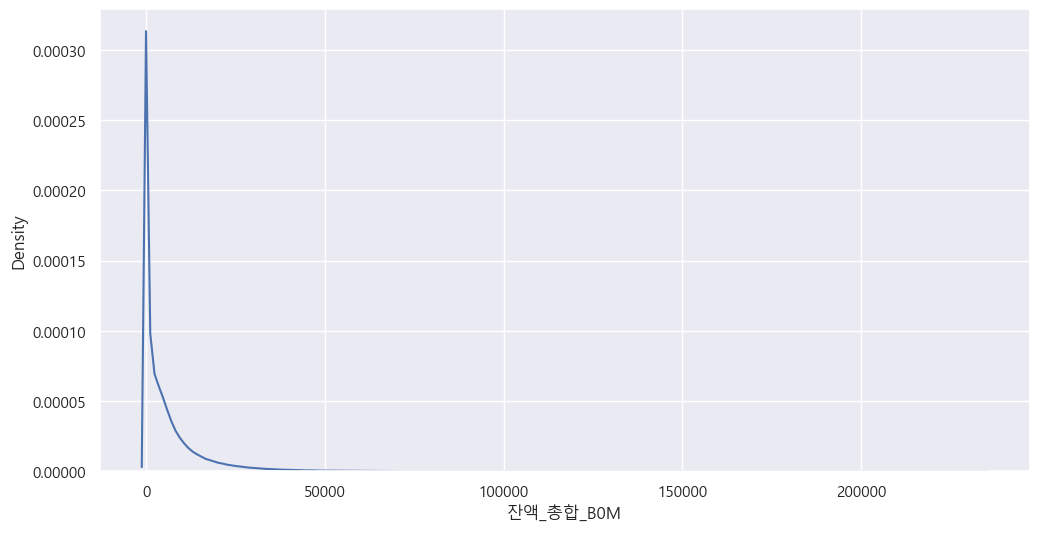

In [84]:
sns.kdeplot(x=df_temp['잔액_총합_B0M'])
plt.show()

<Axes: xlabel='잔액_총합_B0M'>

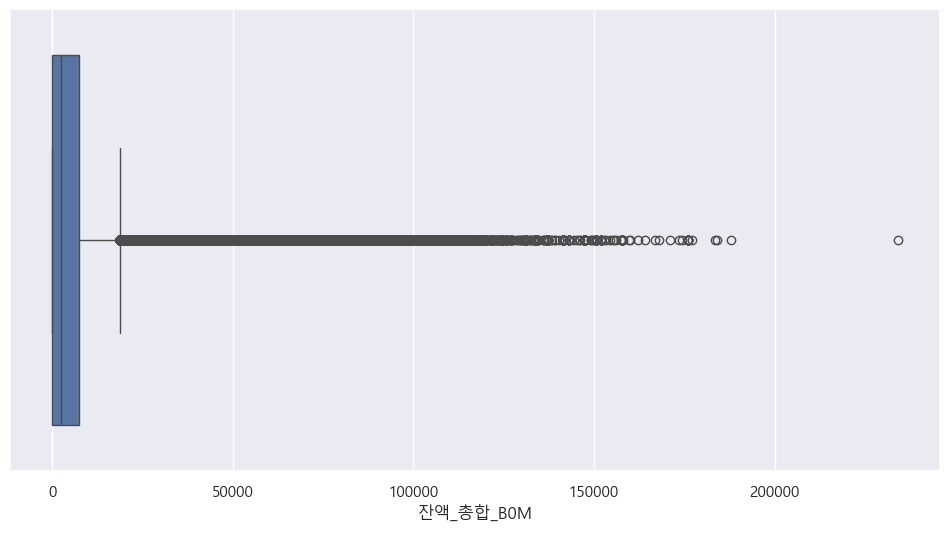

In [85]:
sns.boxplot(x=df_temp['잔액_총합_B0M'])

#### 잔액_리볼빙일시불이월_B0M
- 잔액 리볼빙 일시불 이월 (당월)

In [87]:
df_temp['잔액_리볼빙일시불이월_B0M'].value_counts()

잔액_리볼빙일시불이월_B0M
0        4665508
8086          64
11419         59
12877         55
8983          51
          ...   
20633          1
19544          1
18715          1
17746          1
20115          1
Name: count, Length: 15115, dtype: int64

In [88]:
df_temp['잔액_리볼빙일시불이월_B0M'].describe()

count    4.800000e+06
mean     3.319664e+02
std      2.064152e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.341600e+04
Name: 잔액_리볼빙일시불이월_B0M, dtype: float64

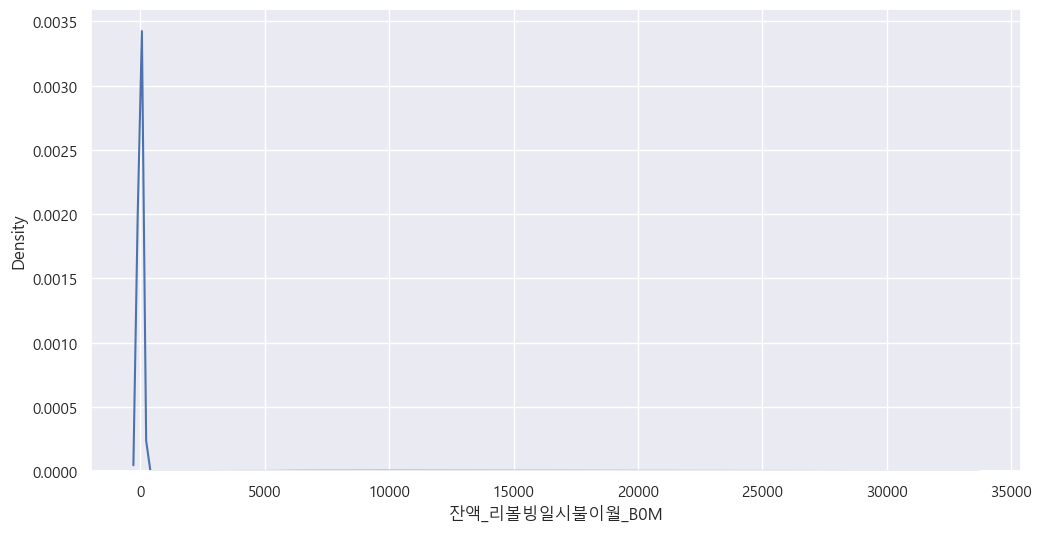

In [89]:
sns.kdeplot(x=df_temp['잔액_리볼빙일시불이월_B0M'])
plt.show()

<Axes: xlabel='잔액_리볼빙일시불이월_B0M'>

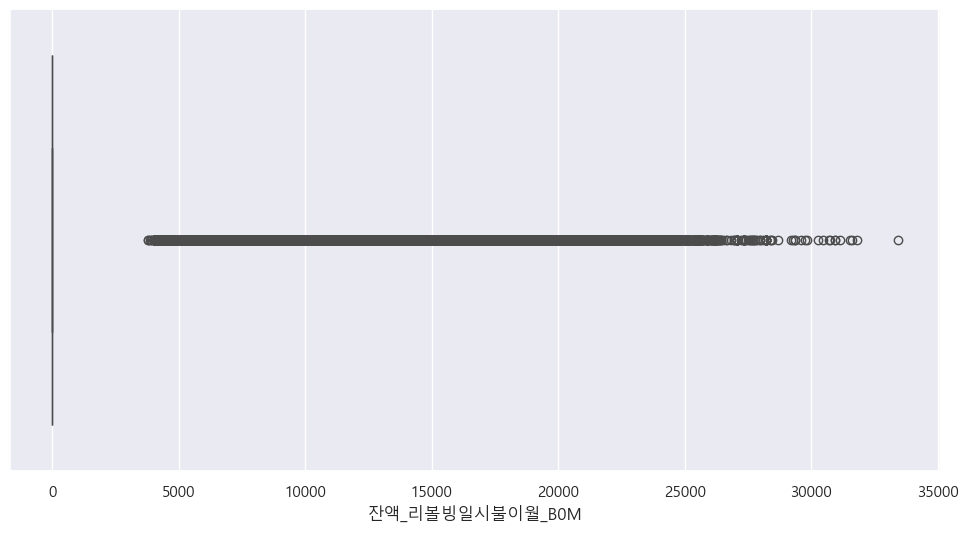

In [90]:
sns.boxplot(x=df_temp['잔액_리볼빙일시불이월_B0M'])

#### 잔액_리볼빙CA이월_B0M
- 잔액 리볼빙 현금서비스 이월 (당월)

In [91]:
df_temp['잔액_리볼빙CA이월_B0M'].value_counts()

잔액_리볼빙CA이월_B0M
0        4797114
5858          28
26566         28
26650         28
5878          27
          ...   
15125          1
3446           1
26304          1
15865          1
10565          1
Name: count, Length: 621, dtype: int64

In [92]:
df_temp['잔액_리볼빙CA이월_B0M'].describe()

count    4.800000e+06
mean     1.158504e+01
std      5.276501e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.695400e+04
Name: 잔액_리볼빙CA이월_B0M, dtype: float64

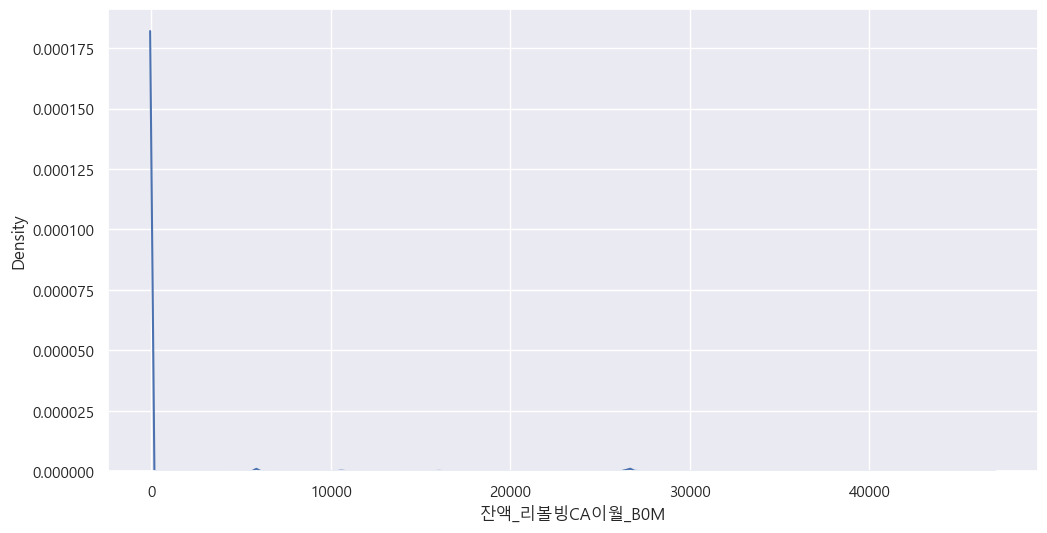

In [93]:
sns.kdeplot(x=df_temp['잔액_리볼빙CA이월_B0M'])
plt.show()

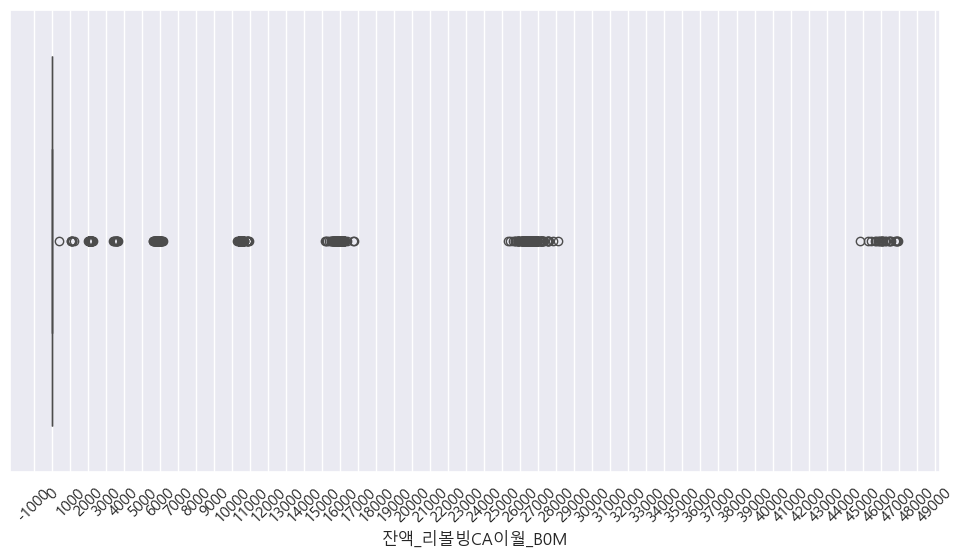

In [106]:
sns.boxplot(x=df_temp['잔액_리볼빙CA이월_B0M'])
plt.xticks(range(-1000,50000,1000),rotation=45)
plt.show()

#### 리볼빙CA_그룹(파생변수)
- 결측치가 그룹을 지어서 나타나는 것을 보고 만듦

In [107]:
df_temp['리볼빙CA_그룹'] = pd.cut(
    df_temp['잔액_리볼빙CA이월_B0M'],
    bins=[-1, 1, 1000, 3000, 4000, 10000, 14000, 20000, 30000, 50000],
    labels=False
)
df_temp['리볼빙CA_그룹'].value_counts()

리볼빙CA_그룹
0    4797114
7       1681
4        621
5        369
6        134
2         45
8         24
3         11
1          1
Name: count, dtype: int64

<Axes: xlabel='리볼빙CA_그룹', ylabel='count'>

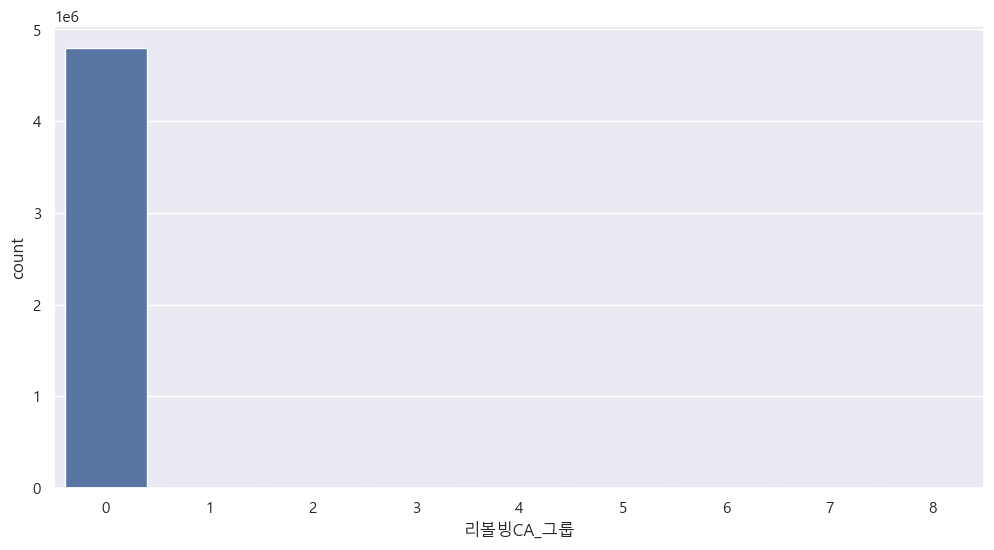

In [108]:
sns.countplot(x=df_temp['리볼빙CA_그룹'])

#### 잔액_카드론_B0M
- 잔액 카드론 (당월)

In [109]:
df_temp['잔액_카드론_B0M'].value_counts()

잔액_카드론_B0M
0         4499758
32910          55
22671          49
13686          48
14835          46
           ...   
155809          1
121582          1
69937           1
8490            1
87033           1
Name: count, Length: 54426, dtype: int64

In [110]:
df_temp['잔액_카드론_B0M'].describe()

count    4.800000e+06
mean     2.595097e+03
std      1.198638e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.465240e+05
Name: 잔액_카드론_B0M, dtype: float64

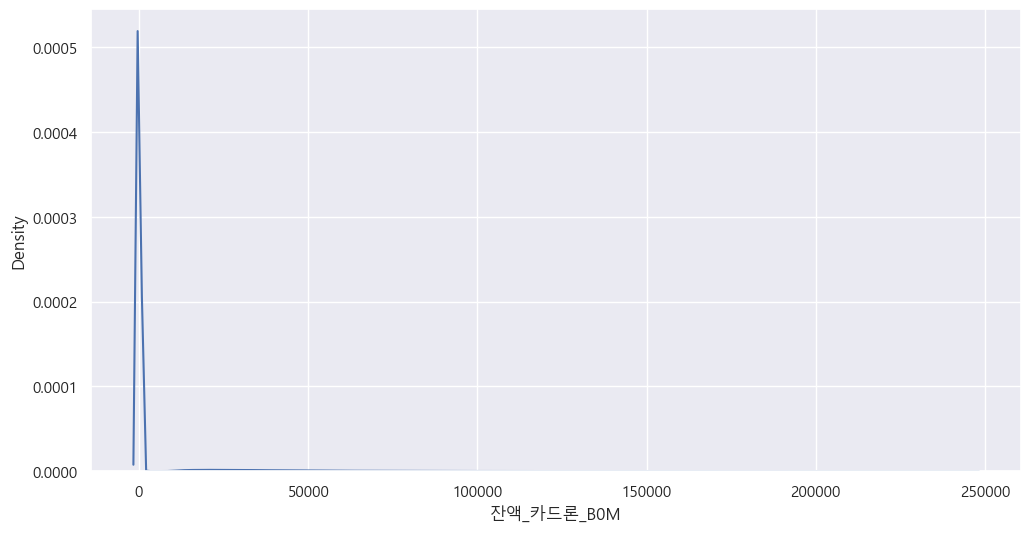

In [111]:
sns.kdeplot(x=df_temp['잔액_카드론_B0M'])
plt.show()

<Axes: xlabel='잔액_카드론_B0M'>

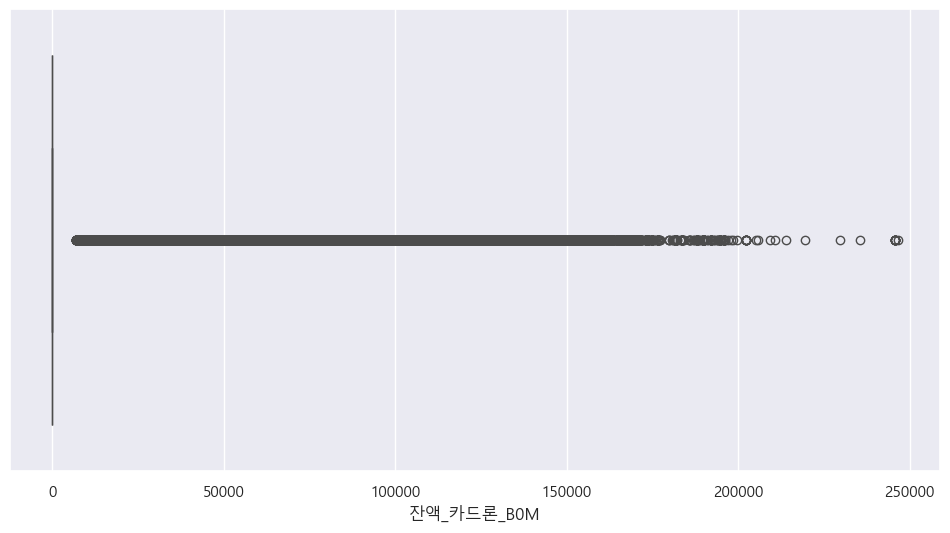

In [112]:
sns.boxplot(x=df_temp['잔액_카드론_B0M'])

#### 월중평잔_일시불_B0M
- 월 평균 잔액 일시불 (당월)

In [113]:
df_temp['월중평잔_일시불_B0M'].value_counts()

월중평잔_일시불_B0M
0        1282437
8           5190
7           5173
9           4869
10          3837
          ...   
67014          1
33741          1
47906          1
35639          1
42729          1
Name: count, Length: 44182, dtype: int64

In [114]:
df_temp['월중평잔_일시불_B0M'].describe()

count    4.800000e+06
mean     3.788691e+03
std      6.934577e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.443000e+03
75%      4.605000e+03
max      2.015160e+05
Name: 월중평잔_일시불_B0M, dtype: float64

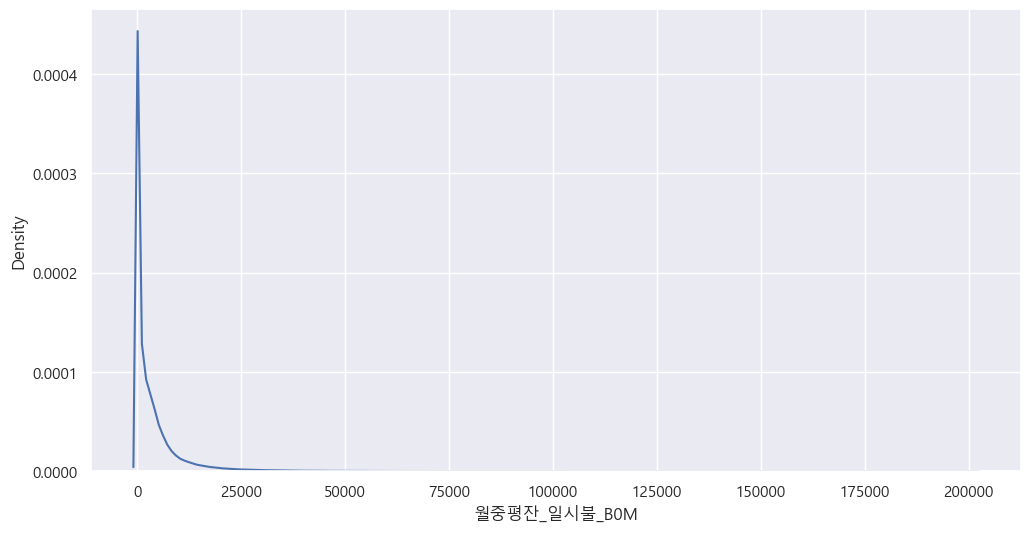

In [115]:
sns.kdeplot(x=df_temp['월중평잔_일시불_B0M'])
plt.show()

<Axes: xlabel='월중평잔_일시불_B0M'>

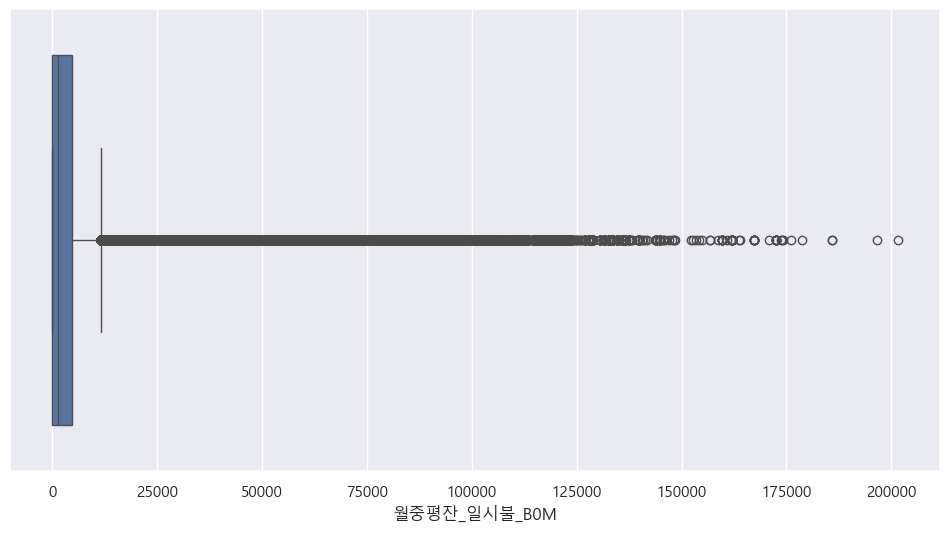

In [116]:
sns.boxplot(x=df_temp['월중평잔_일시불_B0M'])

#### 월중평잔_할부_B0M
- 월 평균 잔액 할부 (당월)

In [119]:
df_temp['월중평잔_할부_B0M'].value_counts()

월중평잔_할부_B0M
0        3051741
1226         647
1453         634
1247         629
1396         625
          ...   
55768          1
51845          1
42541          1
25856          1
67756          1
Name: count, Length: 37691, dtype: int64

In [120]:
df_temp['월중평잔_할부_B0M'].describe()

count    4.800000e+06
mean     2.126529e+03
std      6.218025e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.737000e+03
max      1.807770e+05
Name: 월중평잔_할부_B0M, dtype: float64

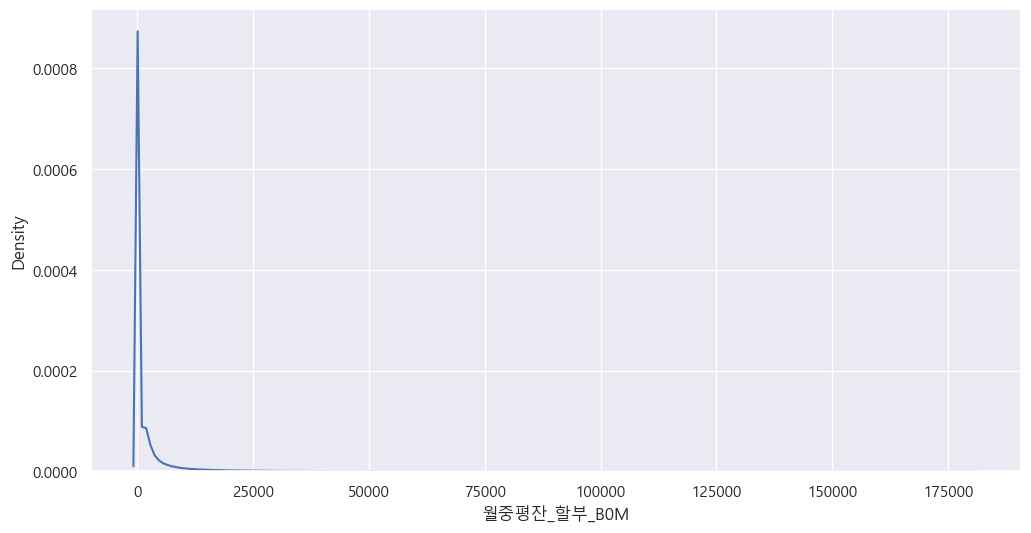

In [121]:
sns.kdeplot(x=df_temp['월중평잔_할부_B0M'])
plt.show()

<Axes: xlabel='월중평잔_할부_B0M'>

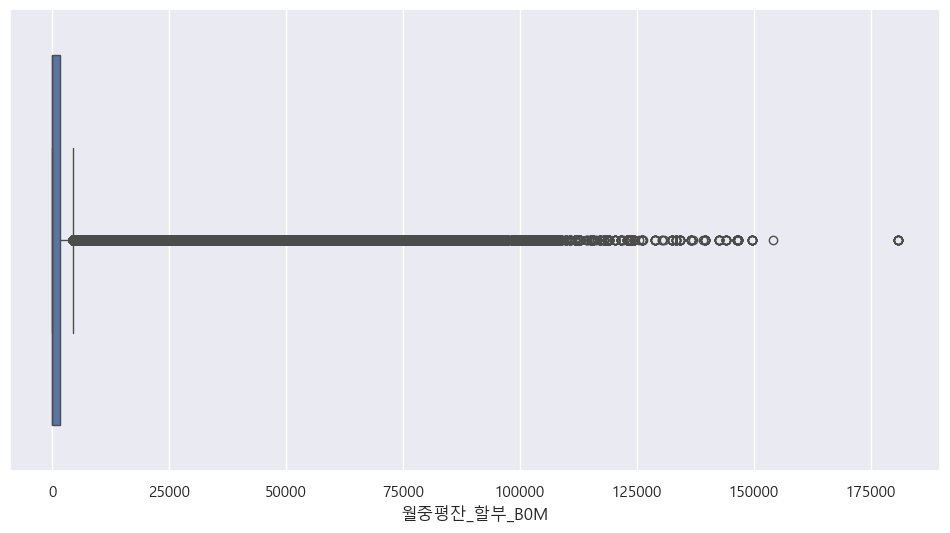

In [122]:
sns.boxplot(x=df_temp['월중평잔_할부_B0M'])

#### 월중평잔_CA_B0M
- 월 평잔 잔액 현금서비스 (당월)

In [123]:
df_temp['월중평잔_CA_B0M'].value_counts()

월중평잔_CA_B0M
0        4493214
2620         116
3194         115
4734         107
3399         103
          ...   
24734          1
21805          1
24343          1
27394          1
33447          1
Name: count, Length: 29577, dtype: int64

In [124]:
df_temp['월중평잔_CA_B0M'].describe()

count    4.800000e+06
mean     7.182417e+02
std      4.017121e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.112290e+05
Name: 월중평잔_CA_B0M, dtype: float64

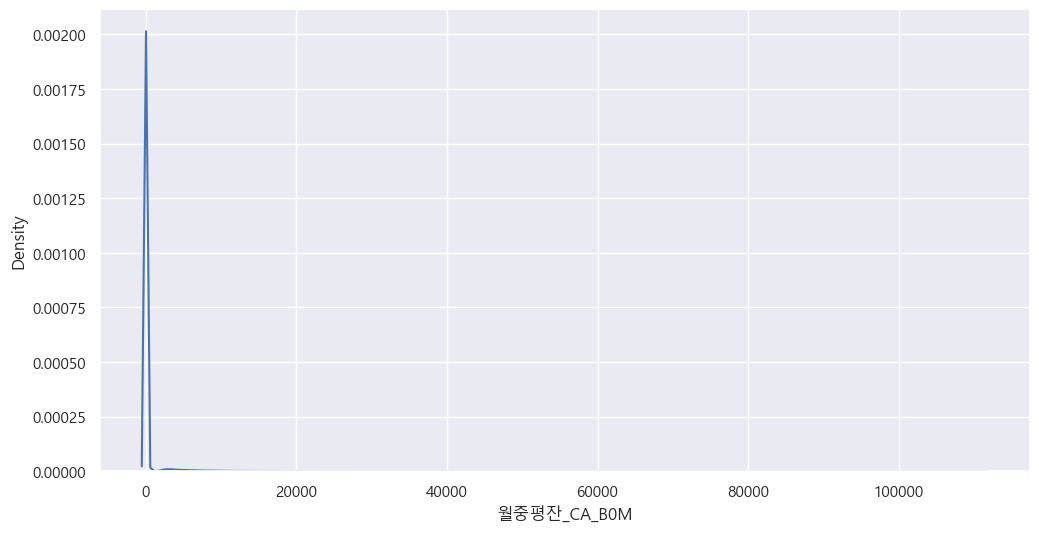

In [125]:
sns.kdeplot(x=df_temp['월중평잔_CA_B0M'])
plt.show()

<Axes: xlabel='월중평잔_CA_B0M'>

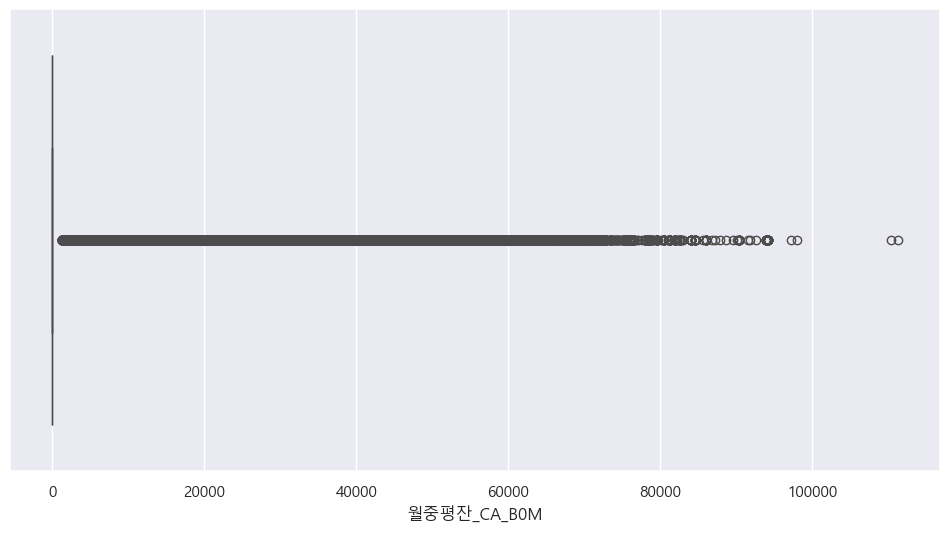

In [126]:
sns.boxplot(x=df_temp['월중평잔_CA_B0M'])

#### 카드론잔액_최종경과월 -> Drop
- 카드론 잔액 발생 이후 경과월

In [127]:
df_temp['카드론잔액_최종경과월'].value_counts()

카드론잔액_최종경과월
0    4800000
Name: count, dtype: int64

#### 연체일자_B0M (시계열) -> 다시 분석 해볼 필요가 있음
- 연체 발생 일자(당월)

In [141]:
df_temp['연체일자_B0M'].value_counts()

연체일자_B0M
20180505.0    612
20180424.0    495
20180507.0    477
20180430.0    468
20180509.0    434
             ... 
20180819.0      4
20180816.0      3
20180820.0      2
20180817.0      1
20180821.0      1
Name: count, Length: 137, dtype: int64

In [142]:
df_temp['연체일자_B0M'].describe()

count    1.834200e+04
mean     2.018050e+07
std      8.358707e+01
min      2.018041e+07
25%      2.018042e+07
50%      2.018050e+07
75%      2.018052e+07
max      2.018082e+07
Name: 연체일자_B0M, dtype: float64

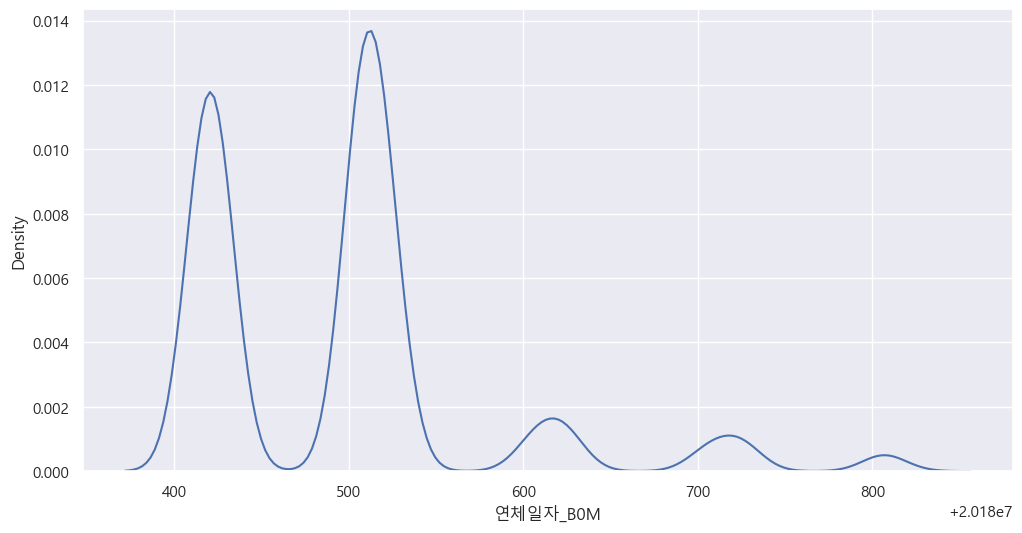

In [143]:
sns.kdeplot(x=df_temp['연체일자_B0M'])
plt.show()

<Axes: xlabel='연체일자_B0M'>

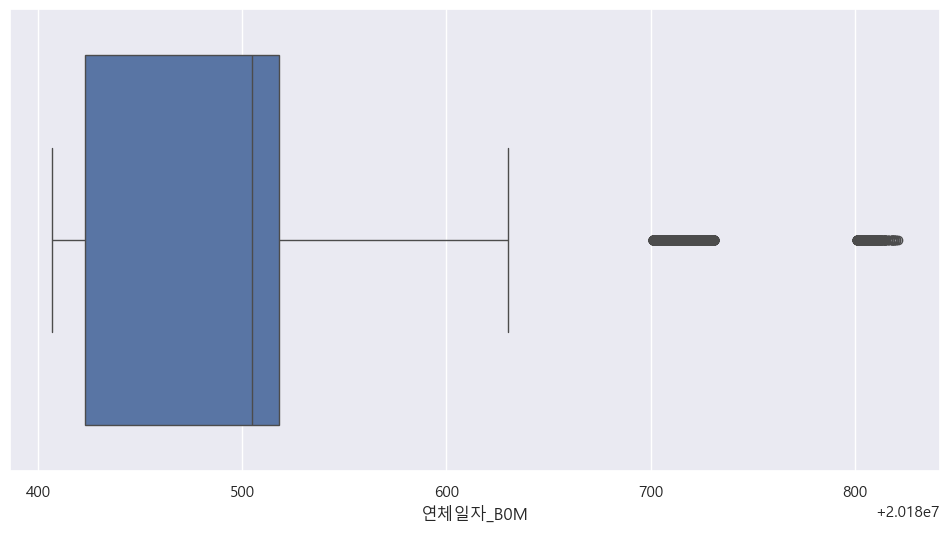

In [144]:
sns.boxplot(x=df_temp['연체일자_B0M'])

#### 연체잔액_B0M
- 연체 잔액 (당월)

In [145]:
df_temp['연체잔액_B0M'].value_counts()

연체잔액_B0M
0       4786294
1118         38
3524         37
1129         36
941          36
         ...   
2524          1
814           1
2271          1
3918          1
3334          1
Name: count, Length: 2048, dtype: int64

In [146]:
df_temp['연체잔액_B0M'].describe()

count    4.800000e+06
mean     1.721350e+01
std      5.071231e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.472500e+04
Name: 연체잔액_B0M, dtype: float64

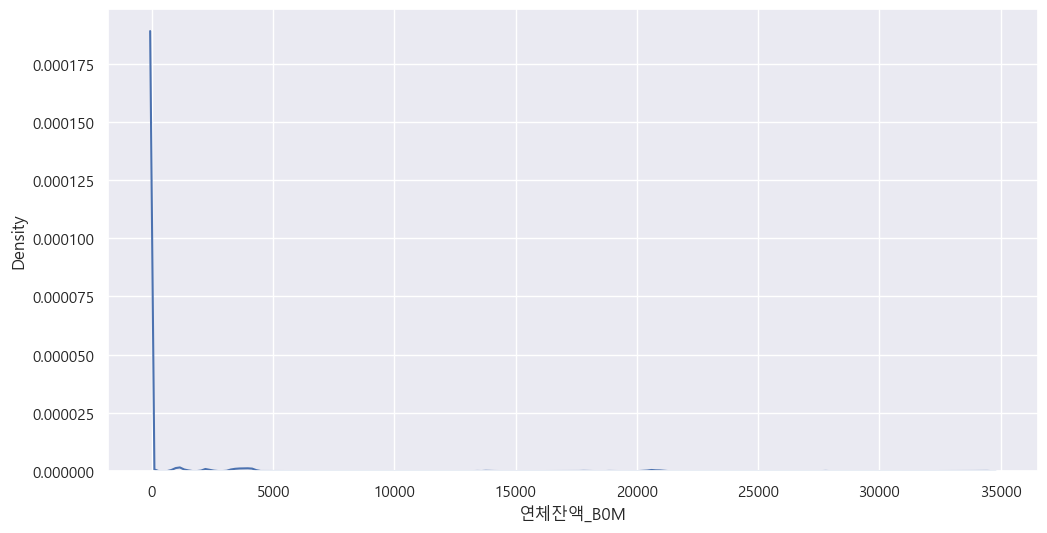

In [147]:
sns.kdeplot(x=df_temp['연체잔액_B0M'])
plt.show()

<Axes: xlabel='연체잔액_B0M'>

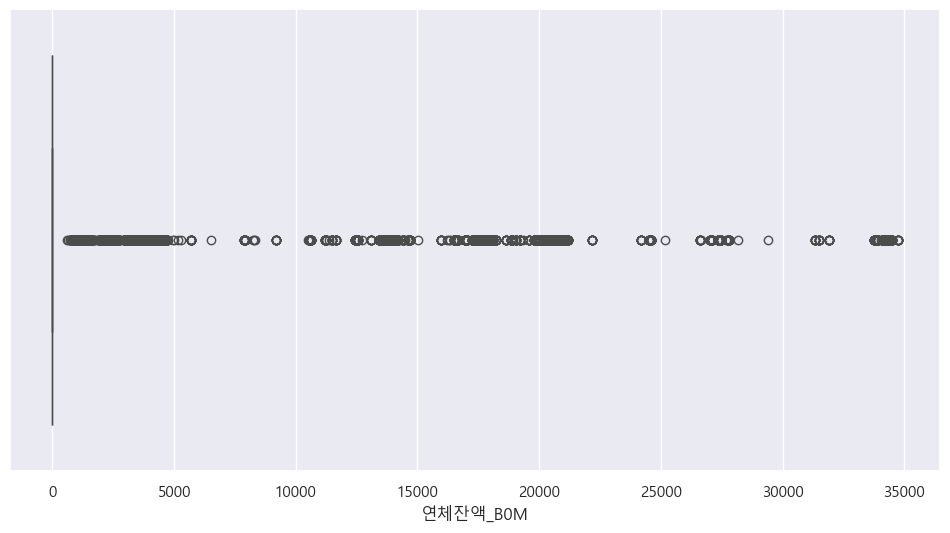

In [148]:
sns.boxplot(x=df_temp['연체잔액_B0M'])

#### 연체잔액_일시불_B0M
- 연체 잔액 일시불 (당월)

In [149]:
df_temp['연체잔액_일시불_B0M'].value_counts()

연체잔액_일시불_B0M
0       4788143
1354         65
1384         59
1118         58
1181         58
         ...   
854           1
1782          1
1520          1
780           1
1054          1
Name: count, Length: 860, dtype: int64

In [150]:
df_temp['연체잔액_일시불_B0M'].describe()

count    4.800000e+06
mean     3.207436e+00
std      6.535543e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.537000e+03
Name: 연체잔액_일시불_B0M, dtype: float64

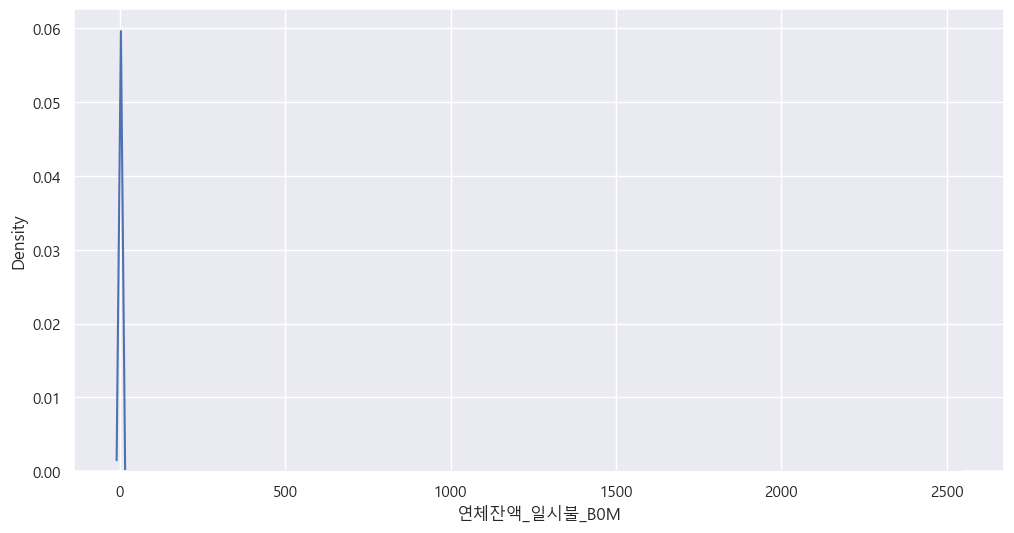

In [151]:
sns.kdeplot(x=df_temp['연체잔액_일시불_B0M'])
plt.show()

<Axes: xlabel='연체잔액_일시불_B0M'>

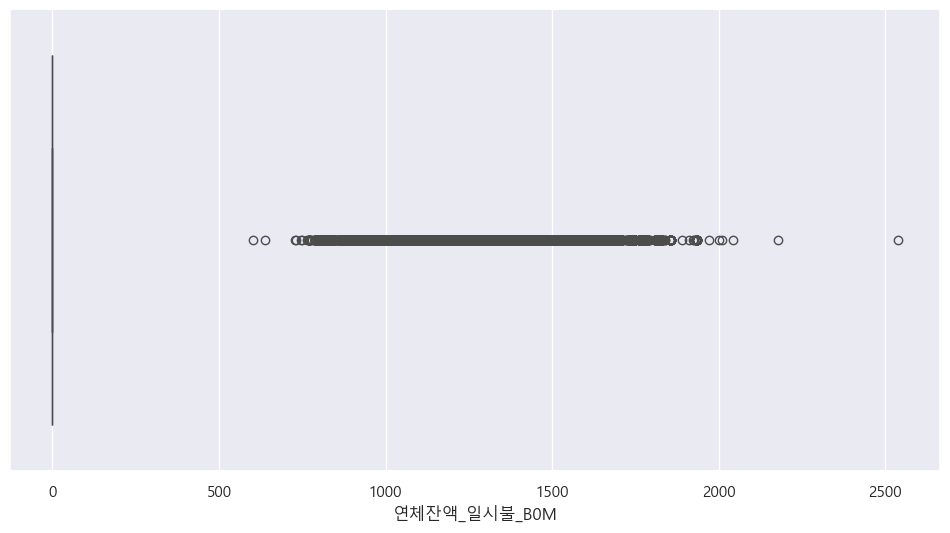

In [152]:
sns.boxplot(x=df_temp['연체잔액_일시불_B0M'])

#### 연체잔액_할부_B0M
- 연체 잔액 할부 (당월)

In [153]:
df_temp['연체잔액_할부_B0M'].value_counts()

연체잔액_할부_B0M
0       4790164
2288         59
2344         56
2460         50
2664         48
         ...   
2789          1
2071          1
2756          1
2192          1
2201          1
Name: count, Length: 791, dtype: int64

In [154]:
df_temp['연체잔액_할부_B0M'].describe()

count    4.800000e+06
mean     5.060011e+00
std      1.120749e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.325000e+03
Name: 연체잔액_할부_B0M, dtype: float64

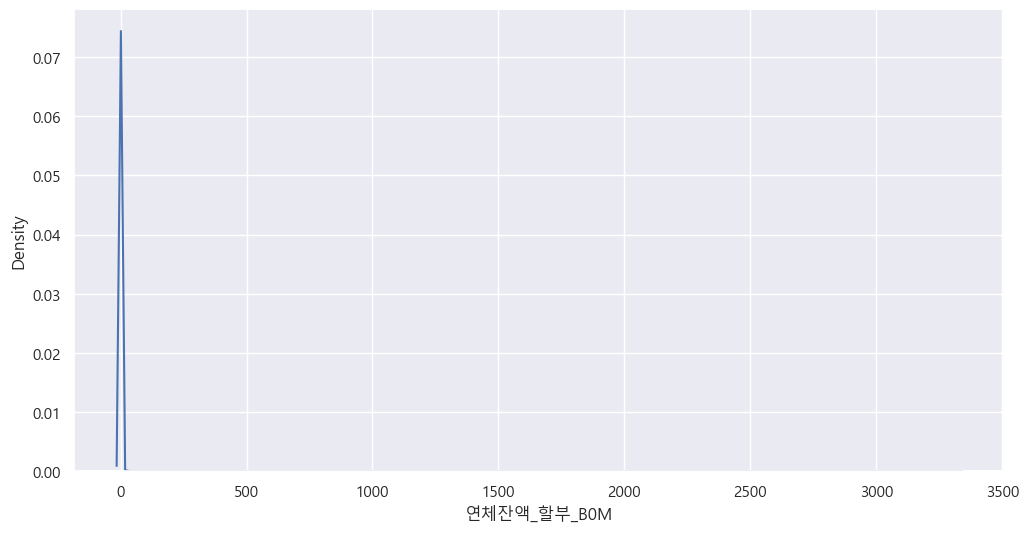

In [155]:
sns.kdeplot(x=df_temp['연체잔액_할부_B0M'])
plt.show()

<Axes: xlabel='연체잔액_할부_B0M'>

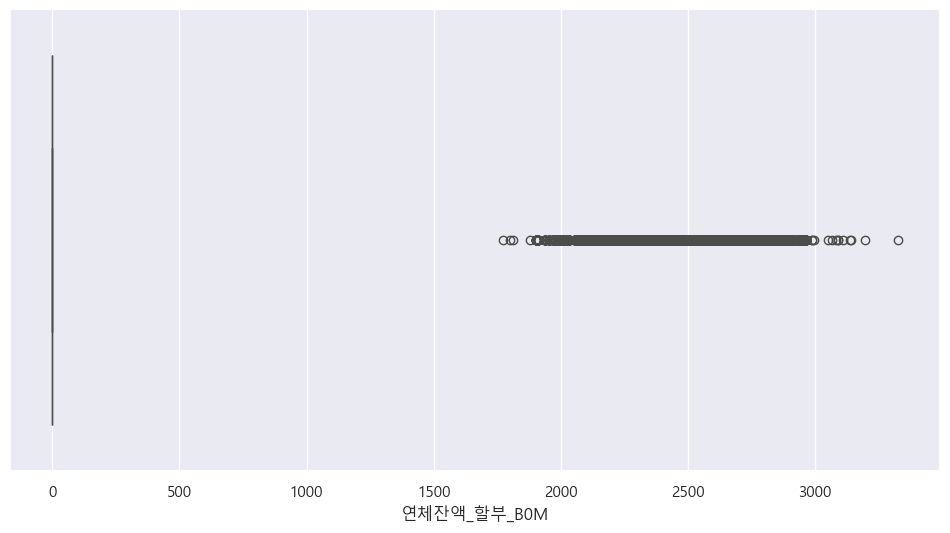

In [156]:
sns.boxplot(x=df_temp['연체잔액_할부_B0M'])

#### 연체잔액_현금서비스_B0M
- 연체 잔액 현금서비스 (당월)

In [157]:
df_temp['연체잔액_현금서비스_B0M'].value_counts()

연체잔액_현금서비스_B0M
0        4797727
16471         45
16378         45
16444         36
16422         36
          ...   
17252          1
10569          1
16543          1
16781          1
16548          1
Name: count, Length: 246, dtype: int64

In [158]:
df_temp['연체잔액_현금서비스_B0M'].describe()

count    4.800000e+06
mean     7.289214e+00
std      3.388918e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.524300e+04
Name: 연체잔액_현금서비스_B0M, dtype: float64

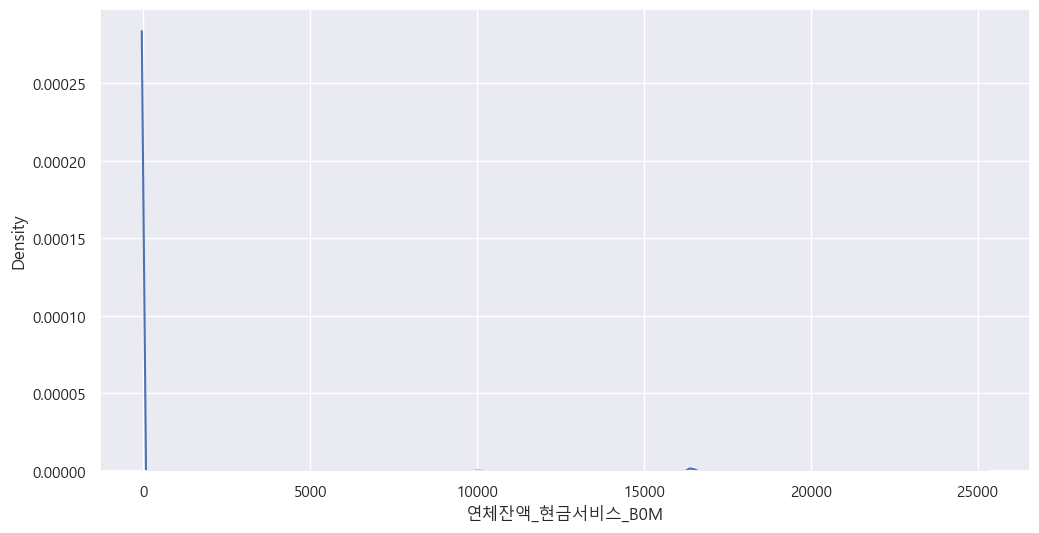

In [159]:
sns.kdeplot(x=df_temp['연체잔액_현금서비스_B0M'])
plt.show()

<Axes: xlabel='연체잔액_현금서비스_B0M'>

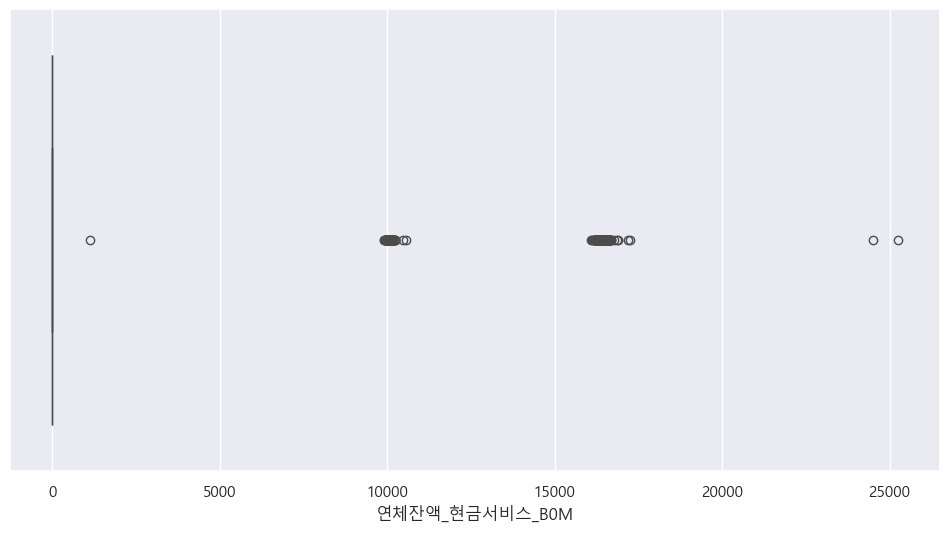

In [160]:
sns.boxplot(x=df_temp['연체잔액_현금서비스_B0M'])

#### 연체잔액_카드론_B0M
 - 연체 잔액 카드론 (당월)

In [4]:
df_temp['연체잔액_카드론_B0M'].value_counts()

연체잔액_카드론_B0M
0        4799375
6740          18
13245         18
13448         10
13271         10
          ...   
13326          1
13297          1
4194           1
13637          1
13246          1
Name: count, Length: 85, dtype: int64

In [5]:
df_temp['연체잔액_카드론_B0M'].describe()

count    4.800000e+06
mean     1.438748e+00
std      1.330717e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.363700e+04
Name: 연체잔액_카드론_B0M, dtype: float64

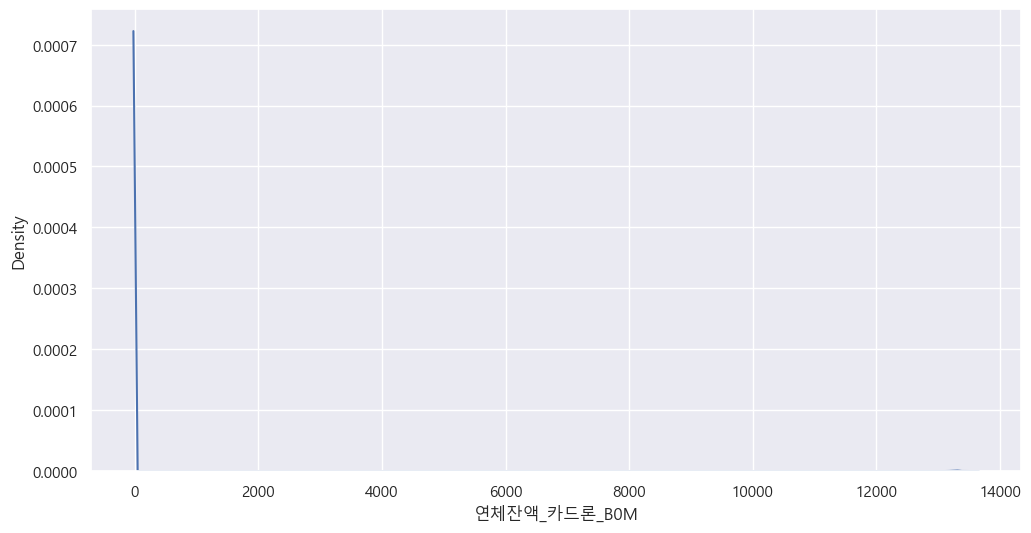

In [6]:
sns.kdeplot(x=df_temp['연체잔액_카드론_B0M'])
plt.show()

<Axes: xlabel='연체잔액_카드론_B0M'>

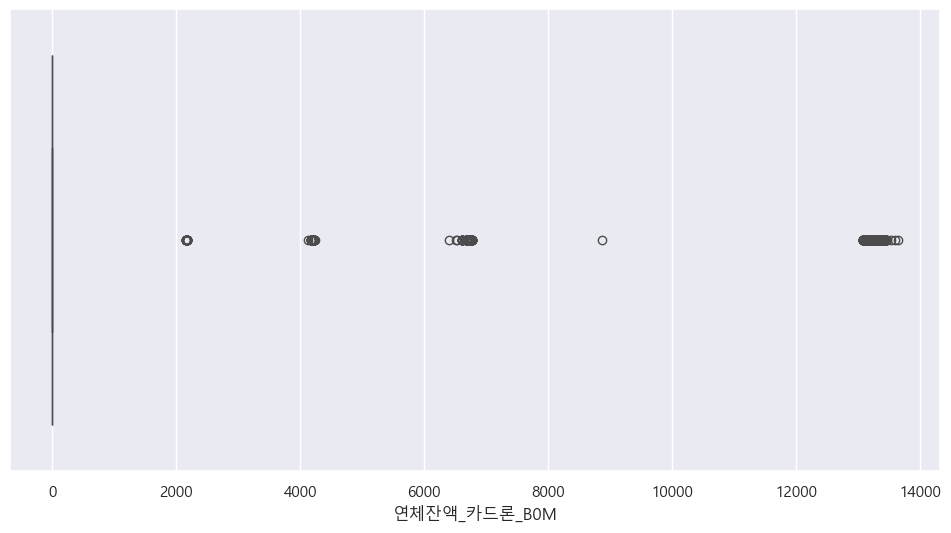

In [7]:
sns.boxplot(x=df_temp['연체잔액_카드론_B0M'])

#### 연체잔액_대환론_B0M
 - 연체 잔액 대환 대출 (당월)

In [8]:
df_temp['연체잔액_대환론_B0M'].value_counts()

연체잔액_대환론_B0M
0        4799962
27479          9
27348          9
27752          9
27018          9
27108          1
27663          1
Name: count, dtype: int64

In [9]:
df_temp['연체잔액_대환론_B0M'].describe()

count    4.800000e+06
mean     2.169050e-01
std      7.709336e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.775200e+04
Name: 연체잔액_대환론_B0M, dtype: float64

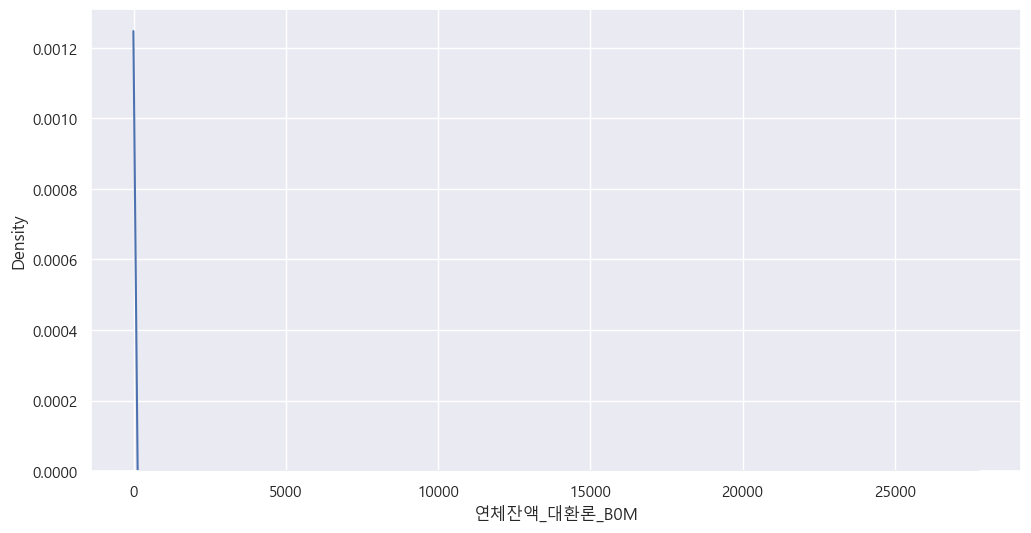

In [10]:
sns.kdeplot(x=df_temp['연체잔액_대환론_B0M'])
plt.show()

<Axes: xlabel='연체잔액_대환론_B0M'>

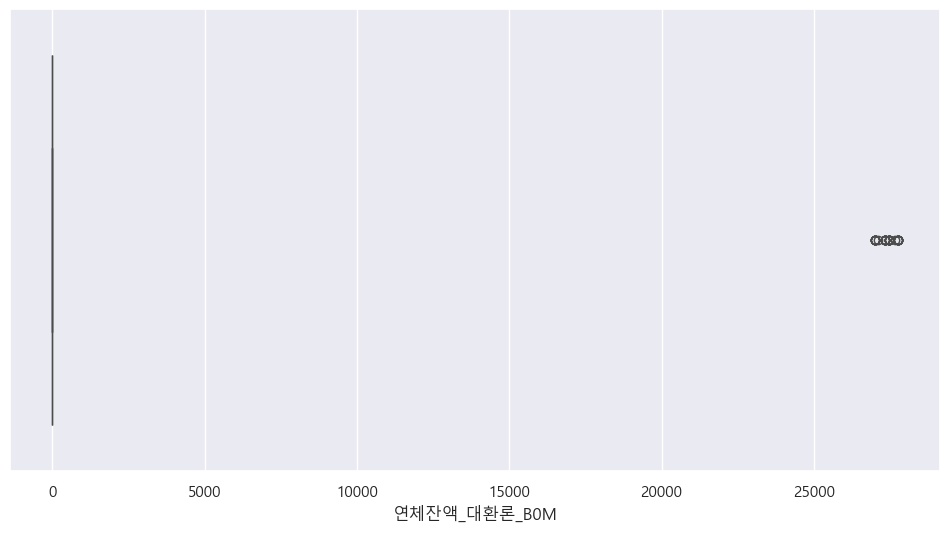

In [11]:
sns.boxplot(x=df_temp['연체잔액_대환론_B0M'])

#### 연체잔액_총합_B0M(파생변수)
 - 일시불 할부 현금서비스 합이 잔액과 같은지 확인

In [26]:
df_temp['연체잔액_총합_B0M'] = df_temp['연체잔액_일시불_B0M'] + df_temp['연체잔액_할부_B0M'] + df_temp['연체잔액_현금서비스_B0M'] + df_temp['연체잔액_카드론_B0M'] + df_temp['연체잔액_대환론_B0M']

In [27]:
df_temp['연체잔액_총합_B0M'].value_counts()

연체잔액_총합_B0M
0        4786294
1118          38
4022          37
1129          36
3967          36
          ...   
20980          1
1376           1
3454           1
20853          1
2655           1
Name: count, Length: 2062, dtype: int64

In [28]:
df_temp['연체잔액_총합_B0M'].describe()

count    4.800000e+06
mean     1.721231e+01
std      5.070967e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.472400e+04
Name: 연체잔액_총합_B0M, dtype: float64

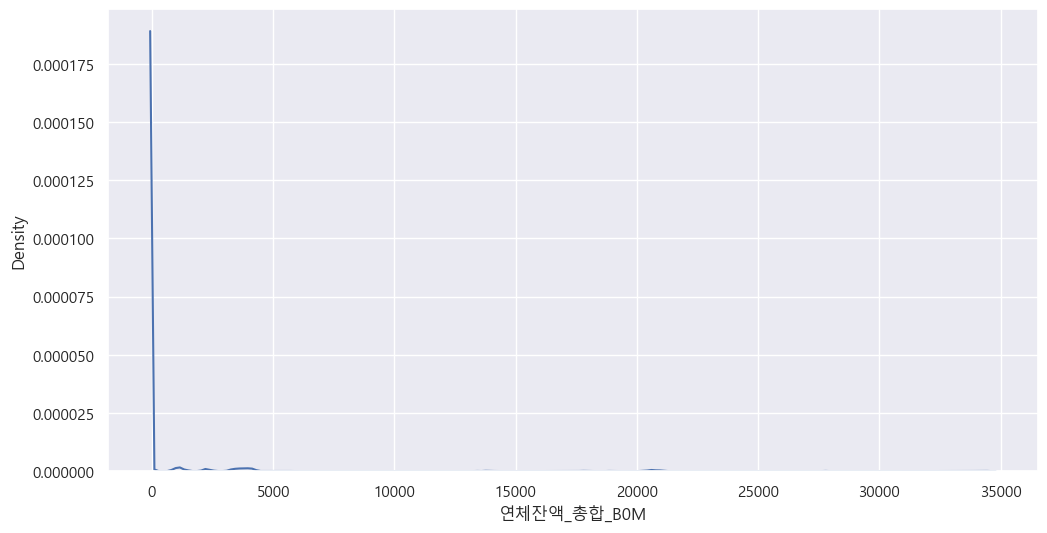

In [29]:
sns.kdeplot(x=df_temp['연체잔액_총합_B0M'])
plt.show()

<Axes: xlabel='연체잔액_총합_B0M'>

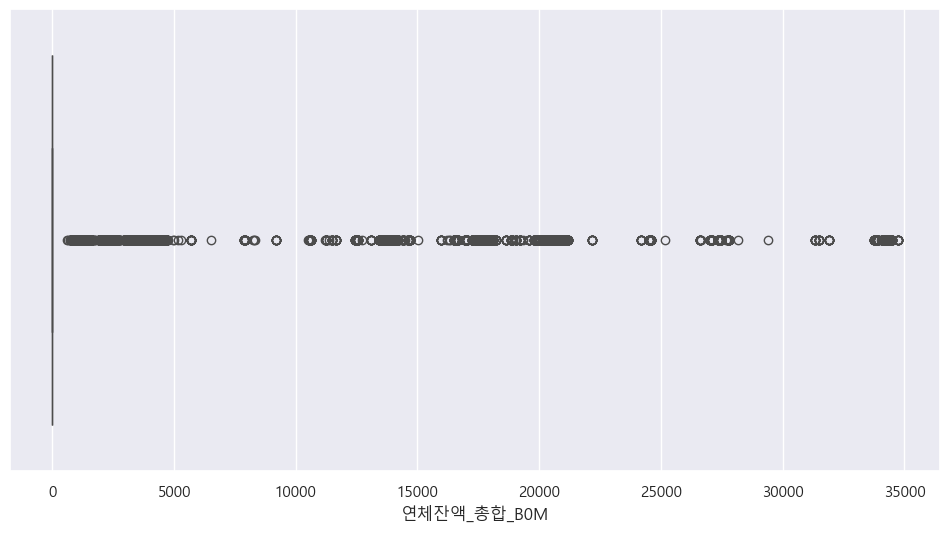

In [30]:
sns.boxplot(x=df_temp['연체잔액_총합_B0M'])

#### 연체차이_B0M(파생변수)
 - 연체잔액과 연체잔액_총합과의 차이로 정보량 차이 확인

In [31]:
df_temp['연체차이_B0M']= df_temp['연체잔액_B0M'] - df_temp['연체잔액_총합_B0M']

In [32]:
df_temp['연체차이_B0M'].value_counts()

연체차이_B0M
0    4794788
1       4760
2        443
3          9
Name: count, dtype: int64

In [33]:
df_temp['연체차이_B0M'].describe()

count    4.800000e+06
mean     1.181875e-03
std      3.709868e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+00
Name: 연체차이_B0M, dtype: float64

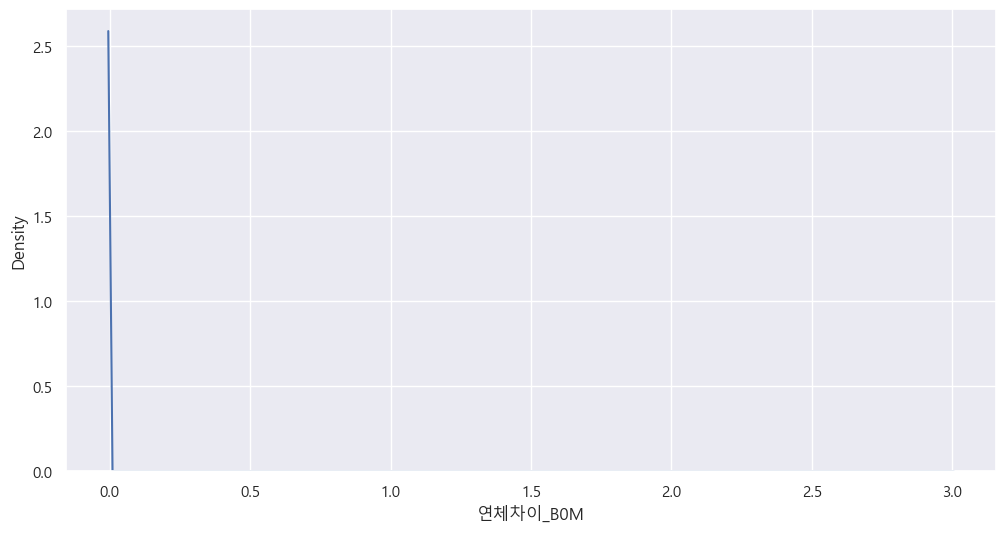

In [34]:
sns.kdeplot(x=df_temp['연체차이_B0M'])
plt.show()

<Axes: xlabel='연체차이_B0M'>

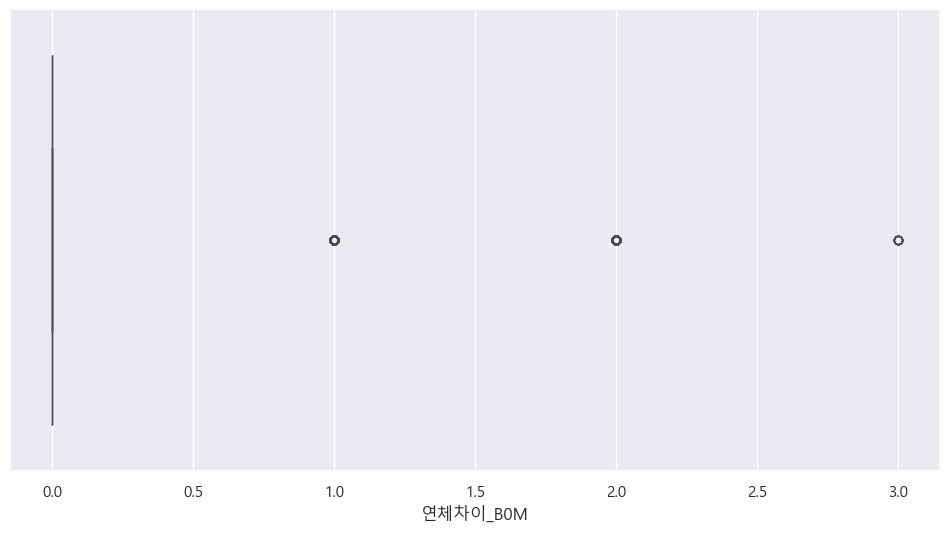

In [35]:
sns.boxplot(x=df_temp['연체차이_B0M'])

#### 잔액_현금서비스_B1M
 - 잔액 현금 서비스 (1개월전)

In [12]:
df_temp['잔액_현금서비스_B1M'].value_counts()

잔액_현금서비스_B1M
0        4523992
5222          84
5541          78
4630          76
4320          75
          ...   
46070          1
48056          1
28296          1
29102          1
41826          1
Name: count, Length: 29875, dtype: int64

In [13]:
df_temp['잔액_현금서비스_B1M'].describe()

count    4.800000e+06
mean     7.739348e+02
std      4.155193e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.057440e+05
Name: 잔액_현금서비스_B1M, dtype: float64

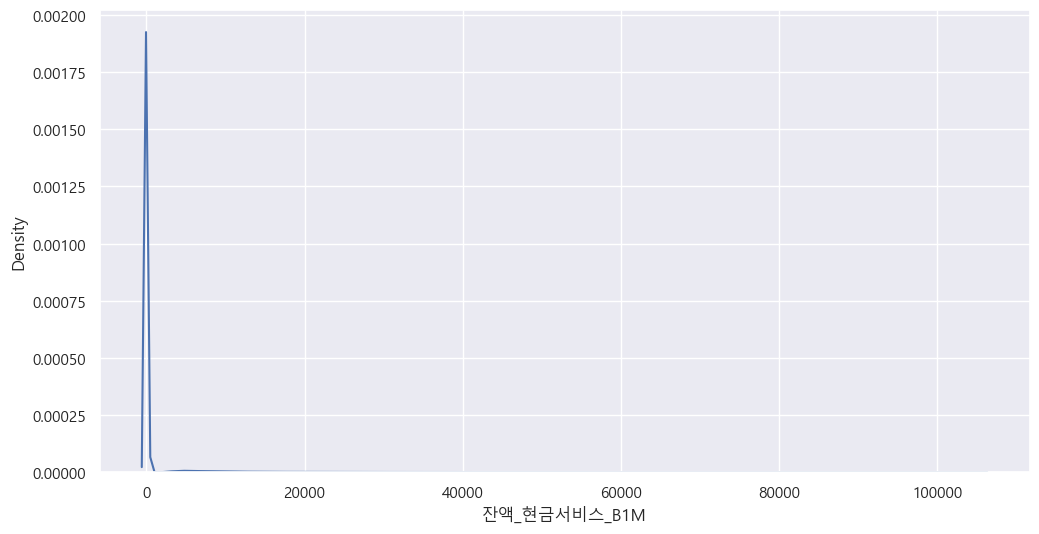

In [14]:
sns.kdeplot(x=df_temp['잔액_현금서비스_B1M'])
plt.show()

<Axes: xlabel='잔액_현금서비스_B1M'>

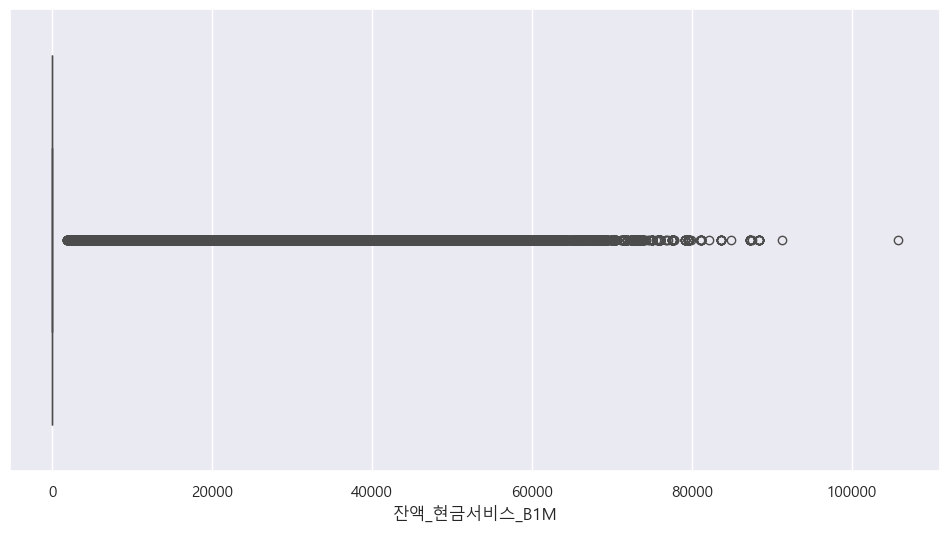

In [15]:
sns.boxplot(x=df_temp['잔액_현금서비스_B1M'])

#### 잔액_현금서비스_B2M
 - 잔액 현금 서비스 (2개월전)

In [36]:
df_temp['잔액_현금서비스_B2M'].value_counts()

잔액_현금서비스_B2M
0        4531492
5926          86
5475          79
4591          78
6469          77
          ...   
31148          1
28249          1
30206          1
24414          1
41321          1
Name: count, Length: 29713, dtype: int64

In [37]:
df_temp['잔액_현금서비스_B2M'].describe()

count    4.800000e+06
mean     7.744844e+02
std      4.020362e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.057440e+05
Name: 잔액_현금서비스_B2M, dtype: float64

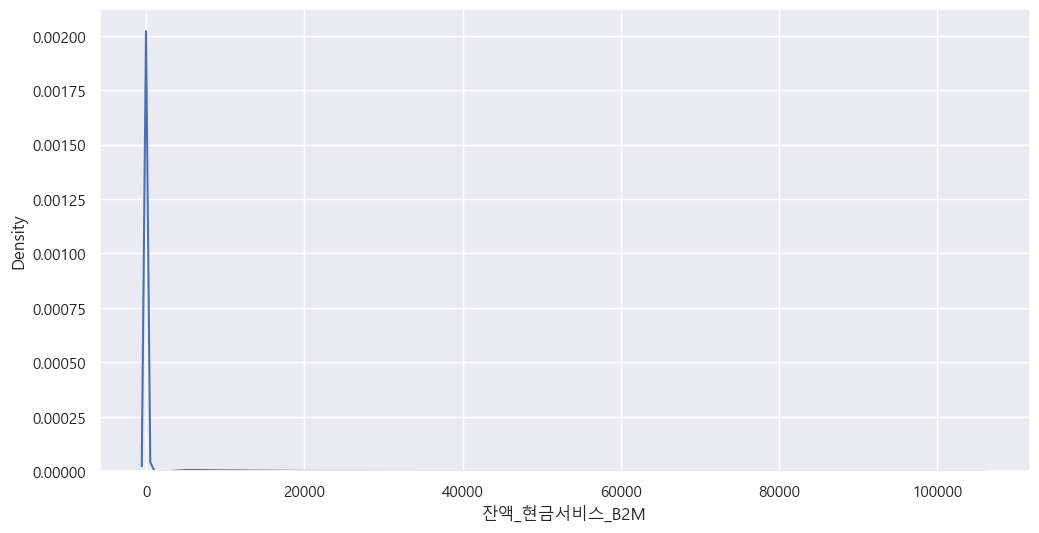

In [38]:
sns.kdeplot(x=df_temp['잔액_현금서비스_B2M'])
plt.show()

<Axes: xlabel='잔액_현금서비스_B2M'>

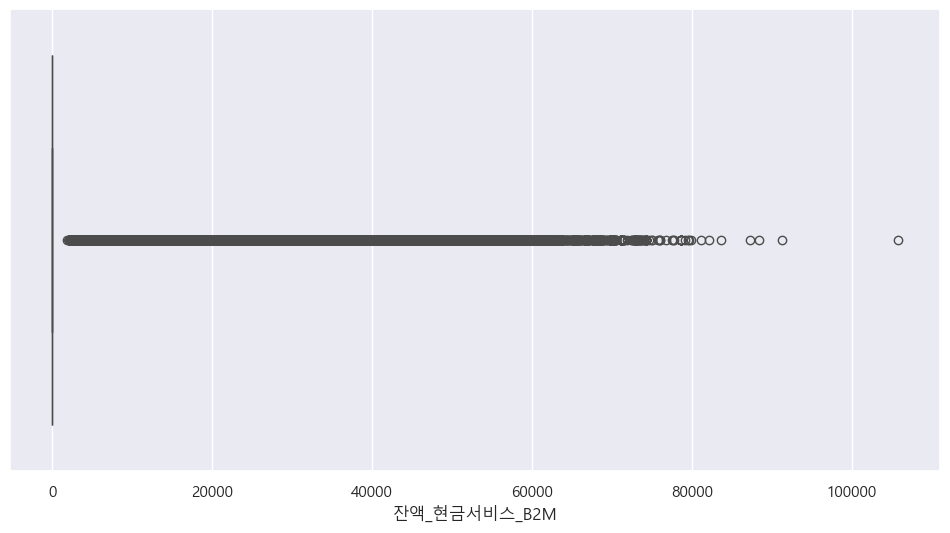

In [40]:
sns.boxplot(x=df_temp['잔액_현금서비스_B2M'])

#### 잔액_카드론_B1M
 - 잔액 카드론 (1개월전)

In [41]:
df_temp['잔액_카드론_B1M'].value_counts()

잔액_카드론_B1M
0         4498443
23964          47
48232          47
27480          47
26627          46
           ...   
36069           1
66517           1
55877           1
125706          1
46161           1
Name: count, Length: 57192, dtype: int64

In [42]:
df_temp['잔액_카드론_B1M'].describe()

count    4.800000e+06
mean     2.749786e+03
std      1.304593e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.449060e+05
Name: 잔액_카드론_B1M, dtype: float64

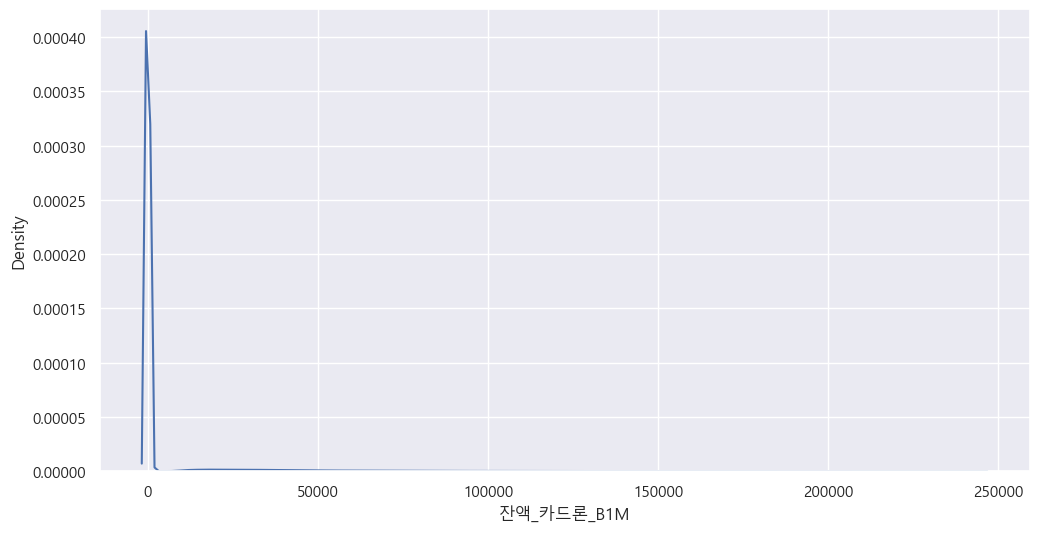

In [43]:
sns.kdeplot(x=df_temp['잔액_카드론_B1M'])
plt.show()

<Axes: xlabel='잔액_카드론_B1M'>

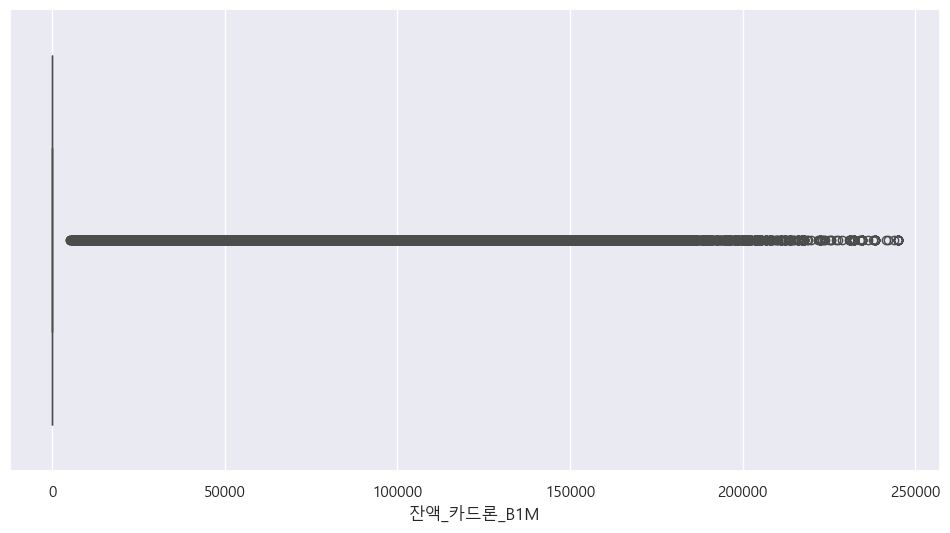

In [44]:
sns.boxplot(x=df_temp['잔액_카드론_B1M'])

#### 잔액_카드론_B2M
 - 잔액 카드론 (2개월전)

In [46]:
df_temp['잔액_카드론_B2M'].value_counts()

잔액_카드론_B2M
0         4498339
33518          48
20102          47
18590          47
21746          46
           ...   
71278           1
10806           1
70156           1
118987          1
53960           1
Name: count, Length: 57704, dtype: int64

In [47]:
df_temp['잔액_카드론_B2M'].describe()

count    4.800000e+06
mean     2.798137e+03
std      1.329737e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.449060e+05
Name: 잔액_카드론_B2M, dtype: float64

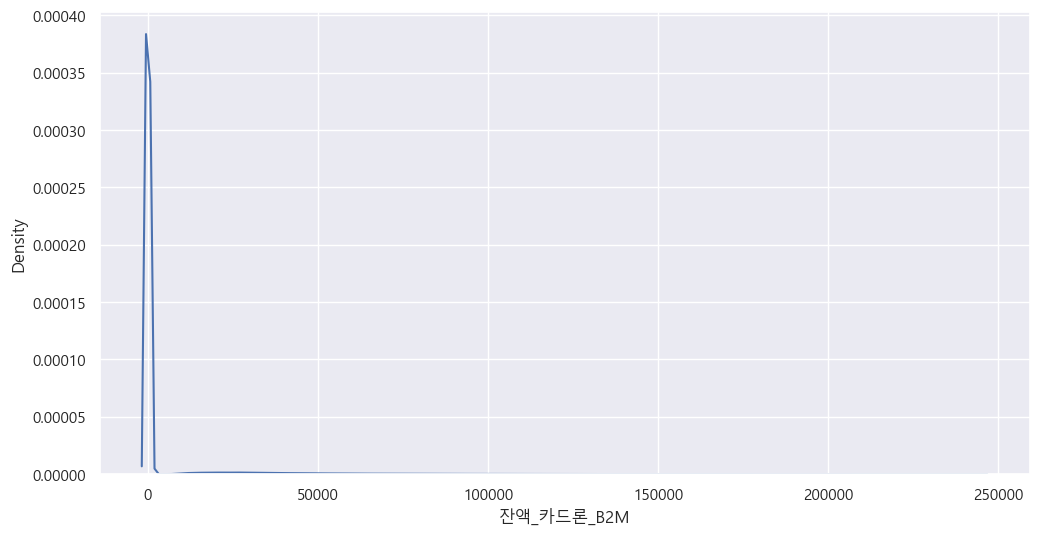

In [48]:
sns.kdeplot(x=df_temp['잔액_카드론_B2M'])
plt.show()

<Axes: xlabel='잔액_카드론_B2M'>

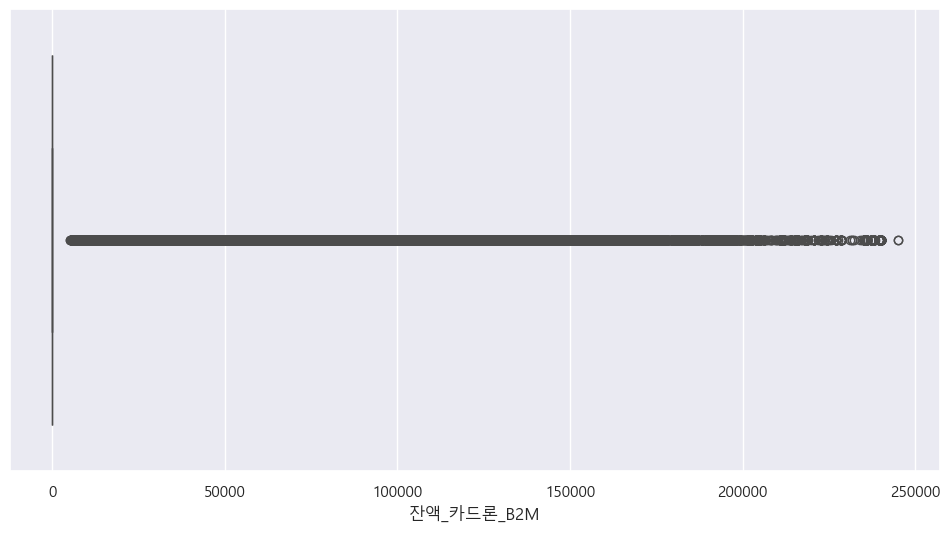

In [49]:
sns.boxplot(x=df_temp['잔액_카드론_B2M'])

#### 잔액_카드론_B3M
 - 잔액 카드론 (3개월전)

In [50]:
df_temp['잔액_카드론_B3M'].value_counts()

잔액_카드론_B3M
0         4500145
230000        117
40850          45
23369          41
23065          40
           ...   
67172           1
50793           1
12896           1
101437          1
49245           1
Name: count, Length: 57918, dtype: int64

In [51]:
df_temp['잔액_카드론_B3M'].describe()

count    4.800000e+06
mean     2.746249e+03
std      1.315517e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.449060e+05
Name: 잔액_카드론_B3M, dtype: float64

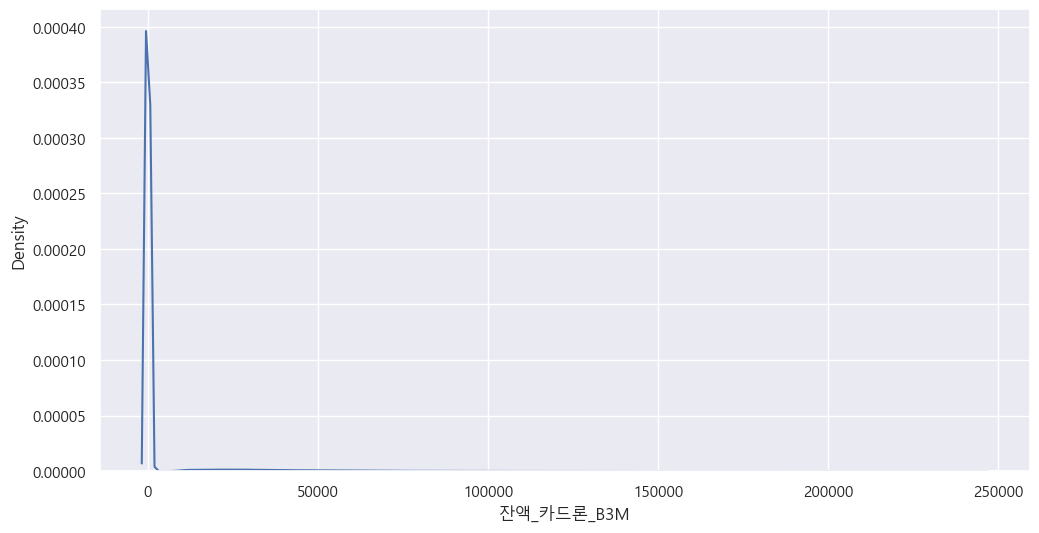

In [52]:
sns.kdeplot(x=df_temp['잔액_카드론_B3M'])
plt.show()

<Axes: xlabel='잔액_카드론_B3M'>

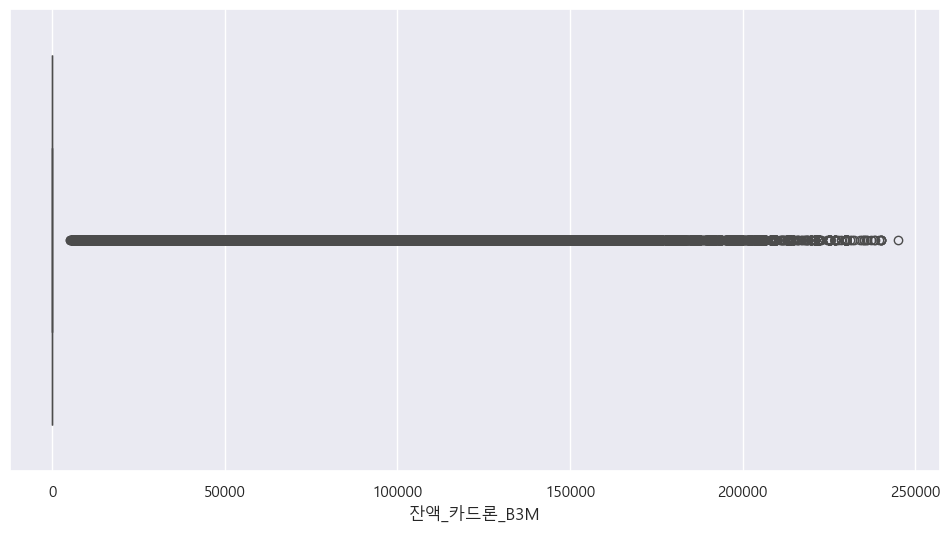

In [53]:
sns.boxplot(x=df_temp['잔액_카드론_B3M'])

#### 잔액_카드론_B4M
 - 잔액 카드론 (4개월전)

In [54]:
df_temp['잔액_카드론_B4M'].value_counts()

잔액_카드론_B4M
0         4493561
230000         58
27469          56
22932          55
27846          48
           ...   
17883           1
12460           1
42070           1
140347          1
108996          1
Name: count, Length: 58096, dtype: int64

In [55]:
df_temp['잔액_카드론_B4M'].describe()

count    4.800000e+06
mean     2.785444e+03
std      1.306437e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.449060e+05
Name: 잔액_카드론_B4M, dtype: float64

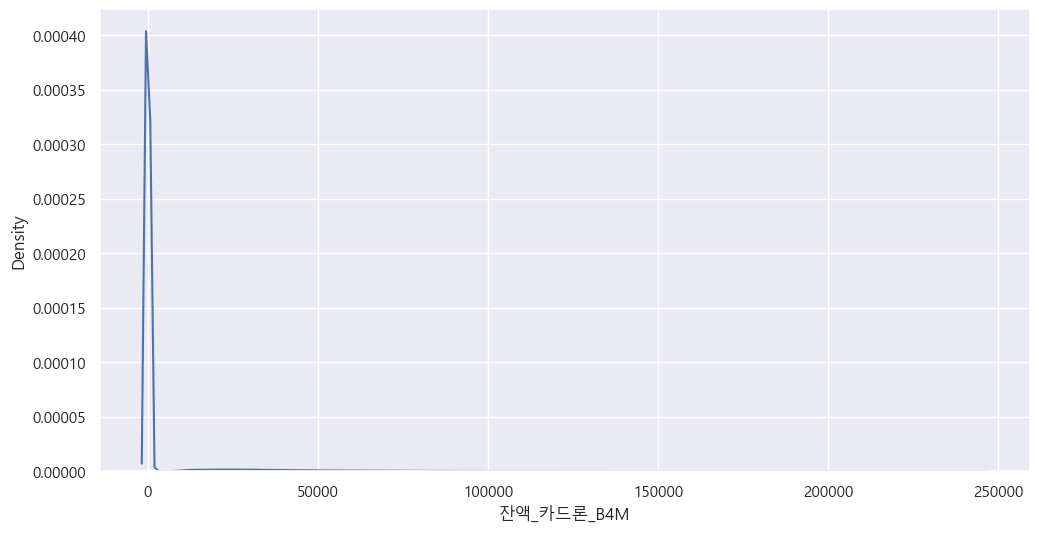

In [56]:
sns.kdeplot(x=df_temp['잔액_카드론_B4M'])
plt.show()

<Axes: xlabel='잔액_카드론_B4M'>

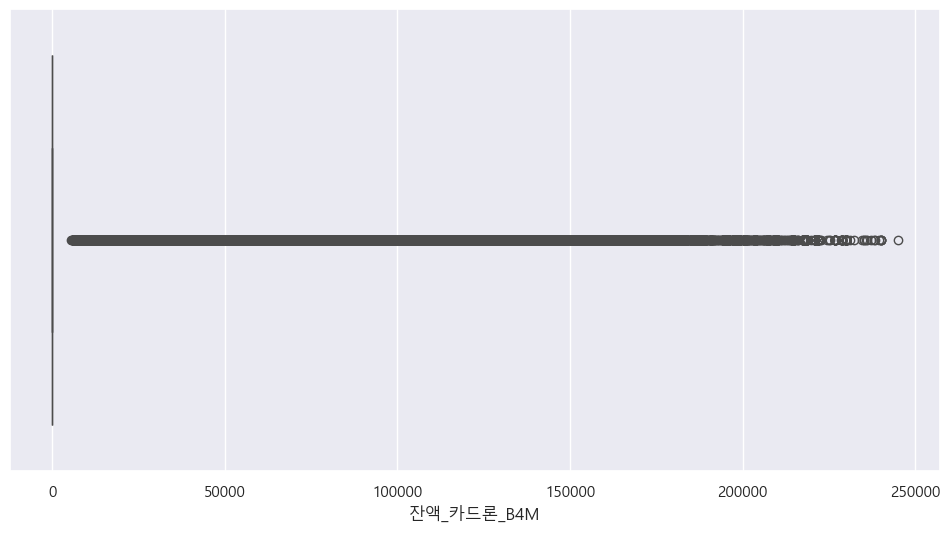

In [57]:
sns.boxplot(x=df_temp['잔액_카드론_B4M'])

#### 잔액_카드론_B5M
 - 잔액 카드론 (5개월전)

In [58]:
df_temp['잔액_카드론_B5M'].value_counts()

잔액_카드론_B5M
0         4490349
28566          58
32548          47
18233          47
25753          46
           ...   
112591          1
34948           1
52730           1
67200           1
70413           1
Name: count, Length: 58414, dtype: int64

In [59]:
df_temp['잔액_카드론_B5M'].describe()

count    4.800000e+06
mean     2.748800e+03
std      1.262763e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.300000e+05
Name: 잔액_카드론_B5M, dtype: float64

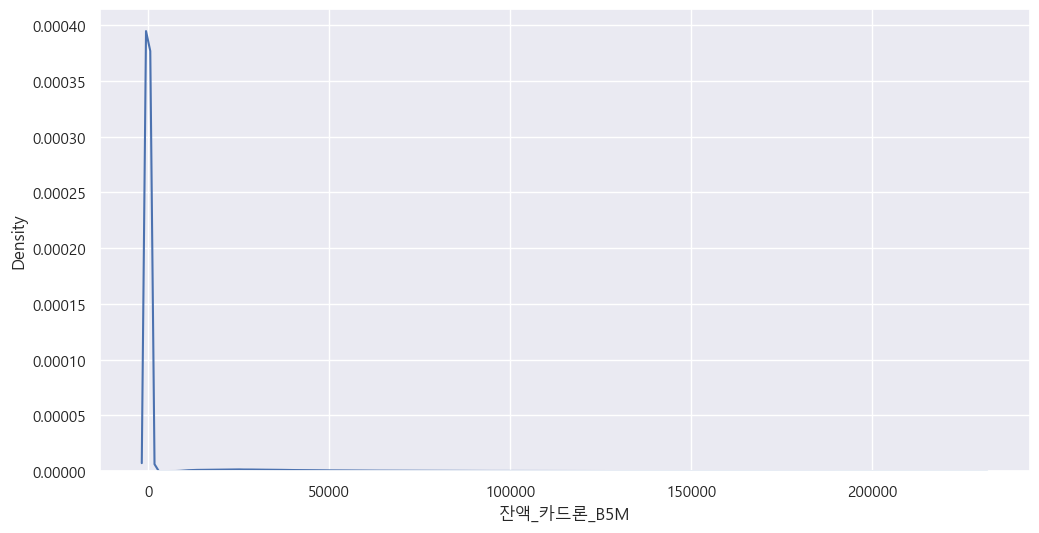

In [60]:
sns.kdeplot(x=df_temp['잔액_카드론_B5M'])
plt.show()

<Axes: xlabel='잔액_카드론_B5M'>

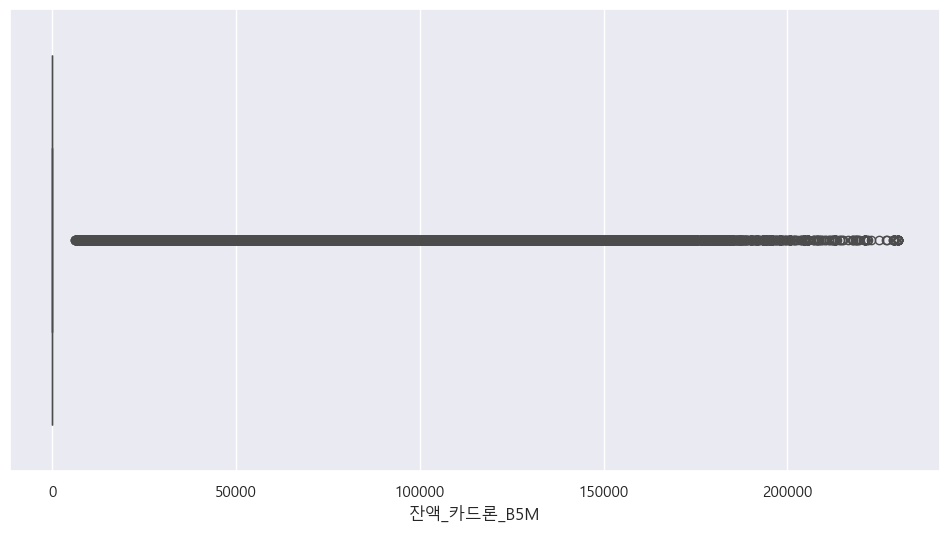

In [61]:
sns.boxplot(x=df_temp['잔액_카드론_B5M'])

#### 잔액_할부_B1M
 - 잔액 할부 (1개월전)

In [62]:
df_temp['잔액_할부_B1M'].value_counts()

잔액_할부_B1M
0        3129783
1220         568
1338         560
1240         554
1202         547
          ...   
32126          1
22224          1
28953          1
23775          1
22231          1
Name: count, Length: 39226, dtype: int64

In [63]:
df_temp['잔액_할부_B1M'].describe()

count    4.800000e+06
mean     2.231557e+03
std      6.610121e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.733000e+03
max      1.701440e+05
Name: 잔액_할부_B1M, dtype: float64

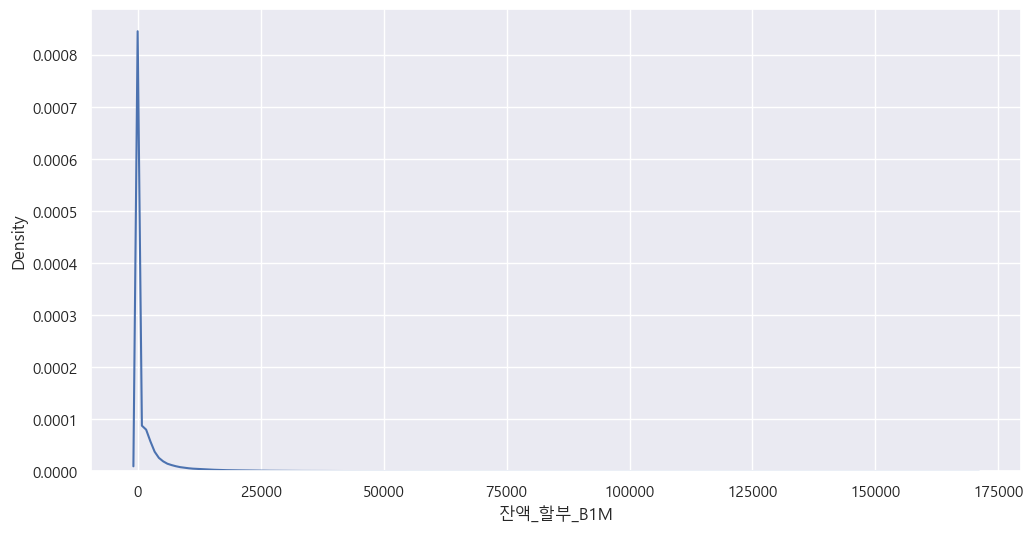

In [64]:
sns.kdeplot(x=df_temp['잔액_할부_B1M'])
plt.show()

<Axes: xlabel='잔액_할부_B1M'>

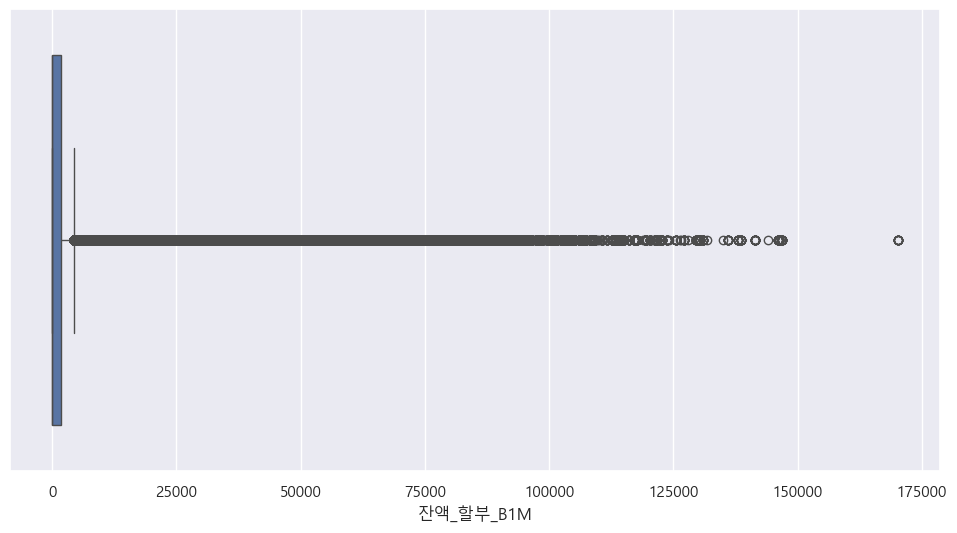

In [65]:
sns.boxplot(x=df_temp['잔액_할부_B1M'])

#### 잔액_할부_B2M
 - 잔액 카드론 (2개월전)

In [66]:
df_temp['잔액_할부_B2M'].value_counts()

잔액_할부_B2M
0        3143880
1936         582
1030         524
1032         519
1220         518
          ...   
53320          1
23238          1
28425          1
83537          1
40612          1
Name: count, Length: 41091, dtype: int64

In [67]:
df_temp['잔액_할부_B2M'].describe()

count    4.800000e+06
mean     2.240867e+03
std      6.308010e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.856000e+03
max      1.701440e+05
Name: 잔액_할부_B2M, dtype: float64

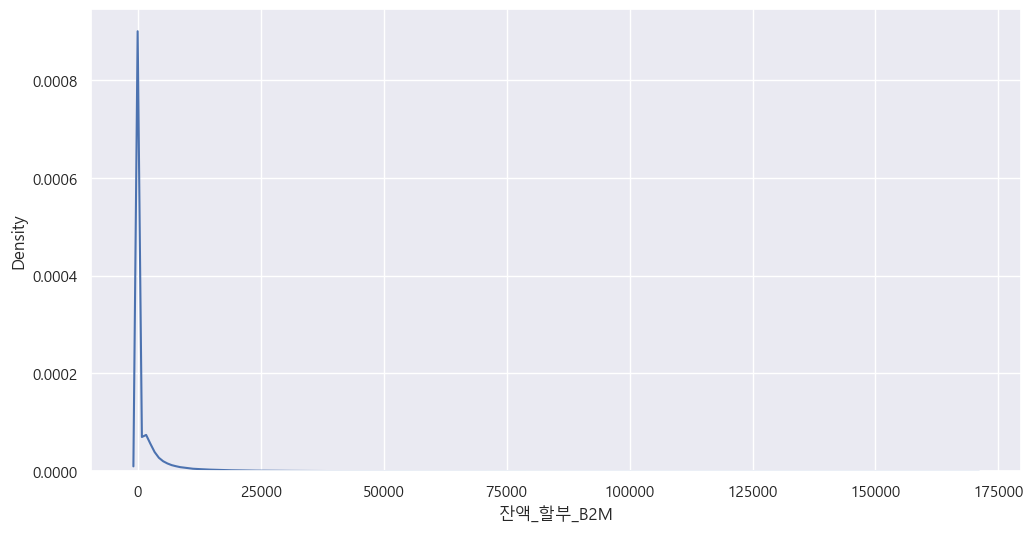

In [68]:
sns.kdeplot(x=df_temp['잔액_할부_B2M'])
plt.show()

<Axes: xlabel='잔액_할부_B2M'>

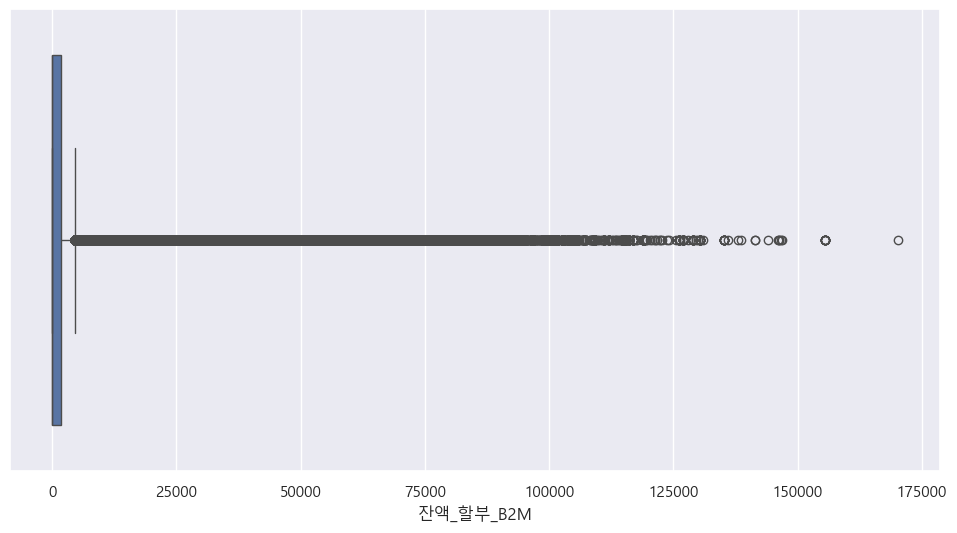

In [69]:
sns.boxplot(x=df_temp['잔액_할부_B2M'])

#### 잔액_일시불_B1M
 - 잔액 일시불 (1개월전)

In [70]:
df_temp['잔액_일시불_B1M'].value_counts()

잔액_일시불_B1M
0        1409440
159         1646
195         1597
134         1563
166         1562
          ...   
32985          1
33189          1
37274          1
90956          1
37073          1
Name: count, Length: 44932, dtype: int64

In [71]:
df_temp['잔액_일시불_B1M'].describe()

count    4.800000e+06
mean     3.509647e+03
std      7.341129e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.078000e+03
75%      3.941000e+03
max      2.459490e+05
Name: 잔액_일시불_B1M, dtype: float64

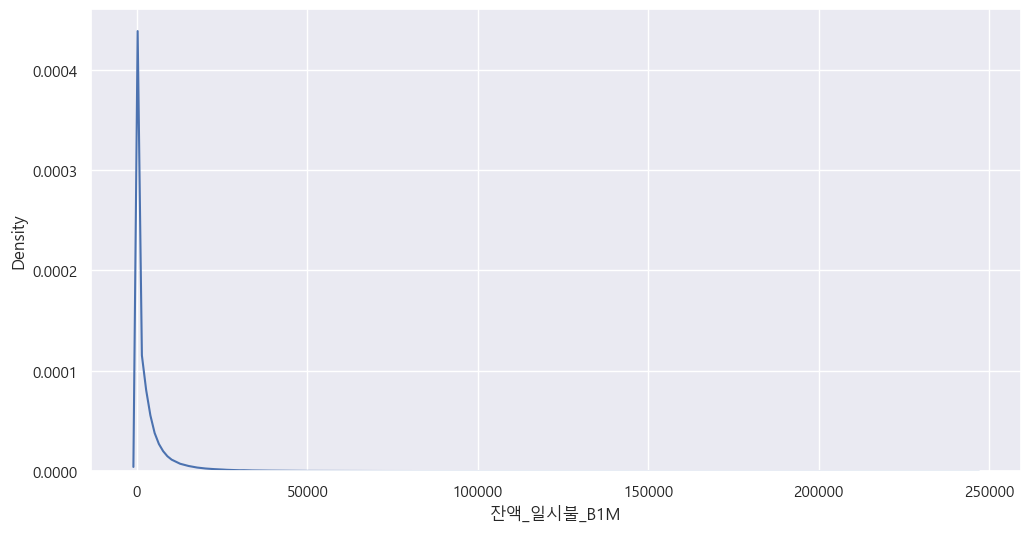

In [72]:
sns.kdeplot(x=df_temp['잔액_일시불_B1M'])
plt.show()

<Axes: xlabel='잔액_일시불_B1M'>

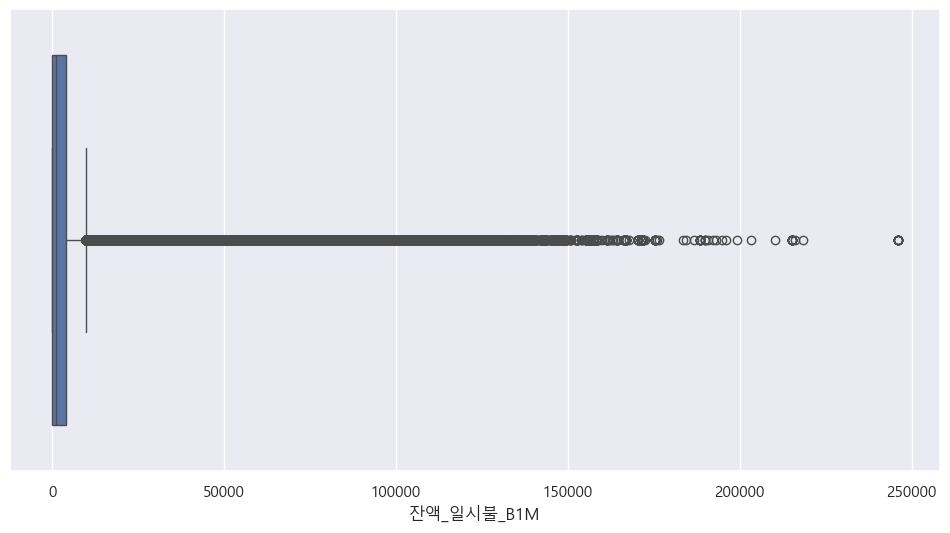

In [73]:
sns.boxplot(x=df_temp['잔액_일시불_B1M'])

#### 잔액_일시불_B2M
 - 잔액 일시불 (2개월전)

In [74]:
df_temp['잔액_일시불_B2M'].value_counts()

잔액_일시불_B2M
0         1423402
252          1577
189          1553
182          1488
191          1486
           ...   
17481           1
21091           1
32180           1
46968           1
141590          1
Name: count, Length: 44875, dtype: int64

In [75]:
df_temp['잔액_일시불_B2M'].describe()

count    4.800000e+06
mean     3.584915e+03
std      7.471876e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.117000e+03
75%      4.003000e+03
max      2.768130e+05
Name: 잔액_일시불_B2M, dtype: float64

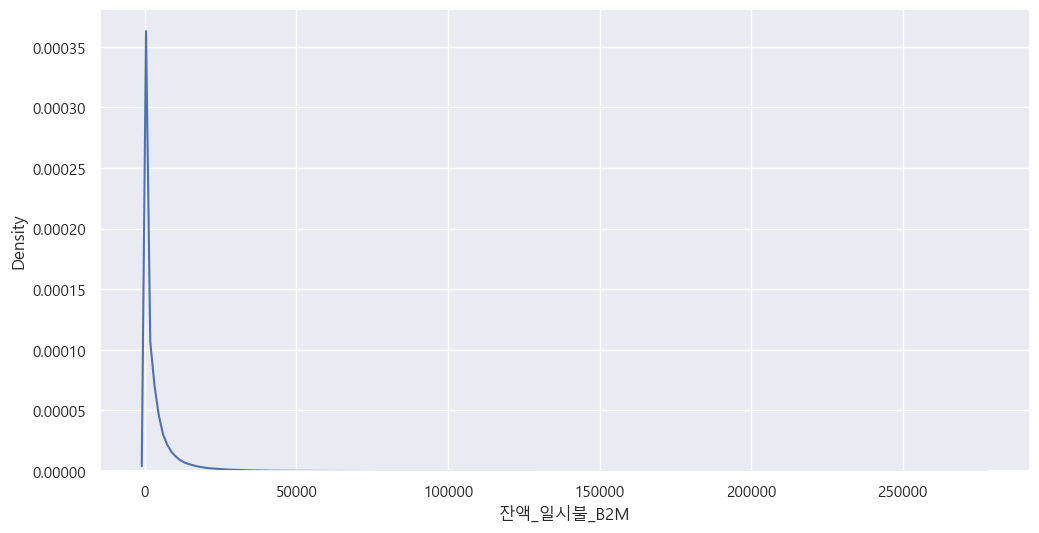

In [76]:
sns.kdeplot(x=df_temp['잔액_일시불_B2M'])
plt.show()

<Axes: xlabel='잔액_일시불_B2M'>

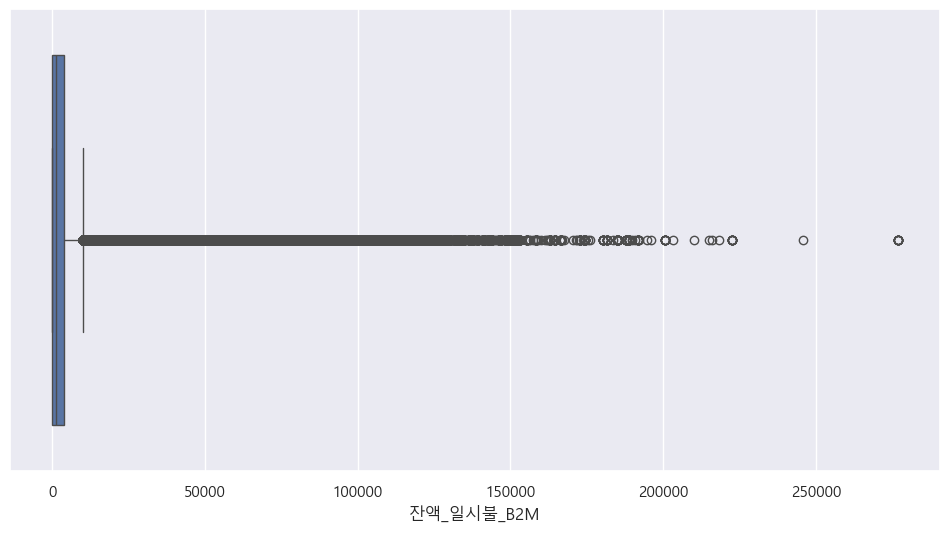

In [77]:
sns.boxplot(x=df_temp['잔액_일시불_B2M'])

#### 연체일수_B1M
 - 연체 경과 일수 (전월기준)

In [129]:
df_temp['연체일수_B1M'].value_counts()

연체일수_B1M
-999999    4178090
 0          619625
 1            2285
Name: count, dtype: int64

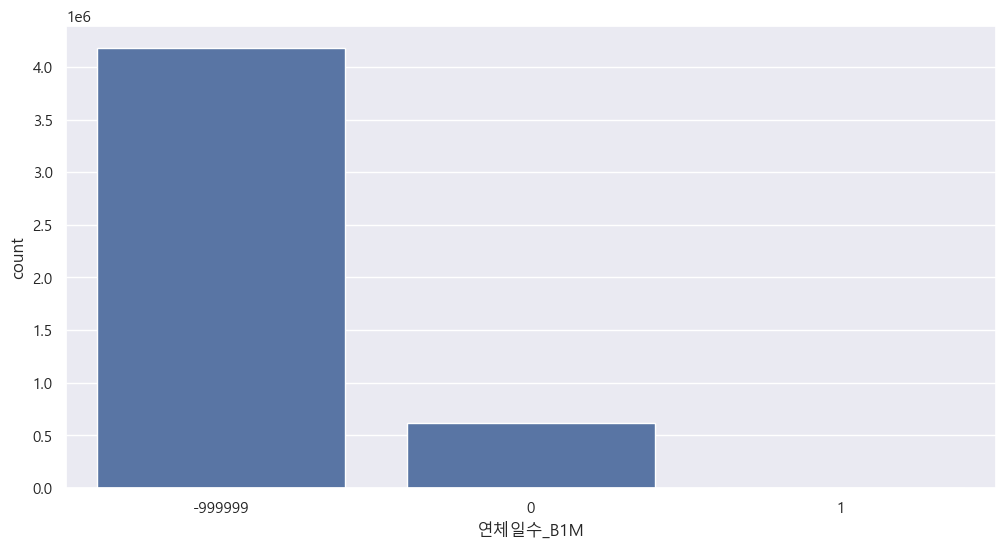

In [131]:
sns.countplot(x=df_temp['연체일수_B1M'])
plt.show()

#### 연체일수_B2M
 - 연체 경과 일수 (2전월기준)

In [132]:
df_temp['연체일수_B2M'].value_counts()

연체일수_B2M
-999999    4169136
 0          630163
 1             701
Name: count, dtype: int64

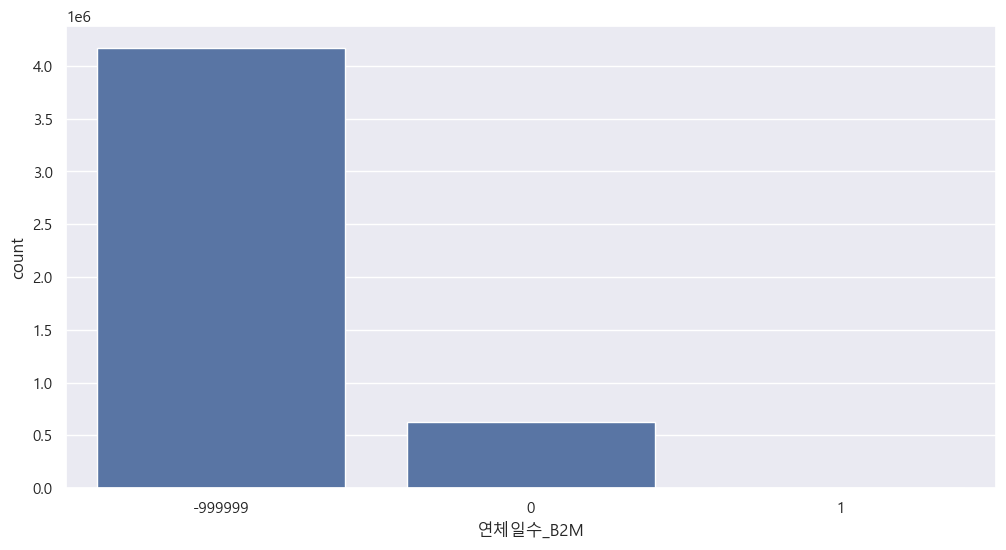

In [133]:
sns.countplot(x=df_temp['연체일수_B2M'])
plt.show()

#### 연체원금_B1M
 - 연체원금 (전월기준)

In [134]:
df_temp['연체원금_B1M'].value_counts()

연체원금_B1M
0       4761057
731          63
832          63
1101         63
1068         57
         ...   
1719          1
6541          1
4604          1
7731          1
4741          1
Name: count, Length: 5589, dtype: int64

In [137]:
df_temp['연체원금_B1M'].describe()

count    4.800000e+06
mean     2.882932e+01
std      4.338563e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.811600e+04
Name: 연체원금_B1M, dtype: float64

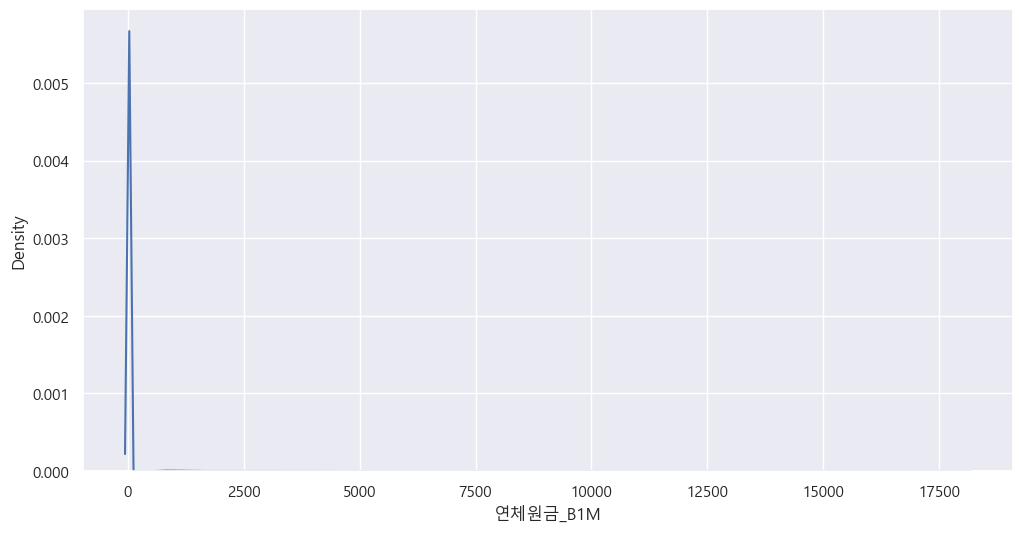

In [136]:
sns.kdeplot(x=df_temp['연체원금_B1M'])
plt.show()

#### 연체원금_B2M
 - 연체 경과 일수 (2전월기준)

In [138]:
df_temp['연체원금_B2M'].value_counts()

연체원금_B2M
0        4770201
1744          39
4072          37
1696          37
1767          37
          ...   
4772           1
7942           1
2534           1
12615          1
6367           1
Name: count, Length: 5883, dtype: int64

In [139]:
df_temp['연체원금_B2M'].describe()

count    4.800000e+06
mean     2.499725e+01
std      3.662939e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.811600e+04
Name: 연체원금_B2M, dtype: float64

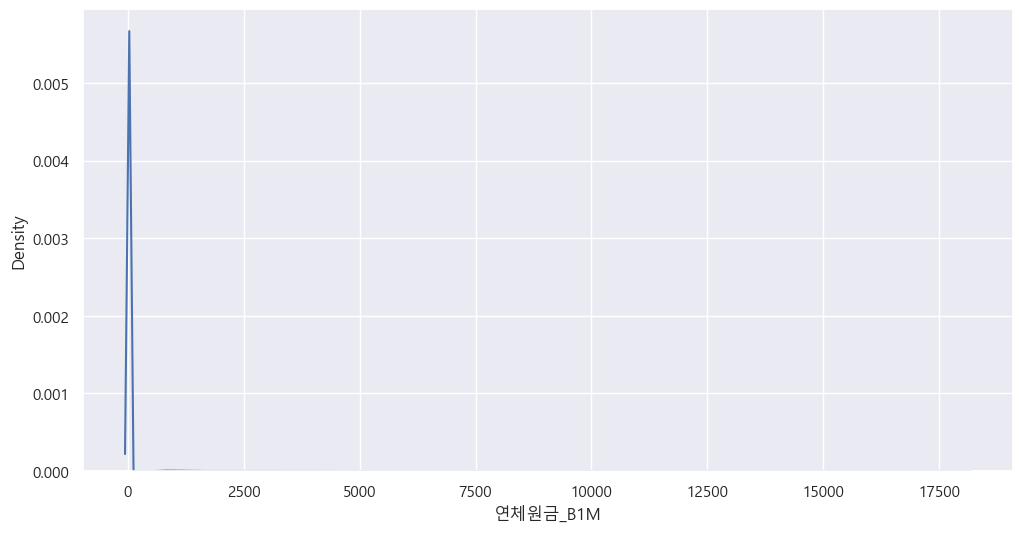

In [140]:
sns.kdeplot(x=df_temp['연체원금_B1M'])
plt.show()

#### 연체일수_최근
 - 이번 연체 이전 연체일수

In [78]:
df_temp['연체일수_최근'].value_counts()

연체일수_최근
-999999    4768086
 0           24722
 1            7192
Name: count, dtype: int64

In [79]:
df_temp['연체일수_최근'].describe()

count    4.800000e+06
mean    -9.933503e+05
std      8.126829e+04
min     -9.999990e+05
25%     -9.999990e+05
50%     -9.999990e+05
75%     -9.999990e+05
max      1.000000e+00
Name: 연체일수_최근, dtype: float64

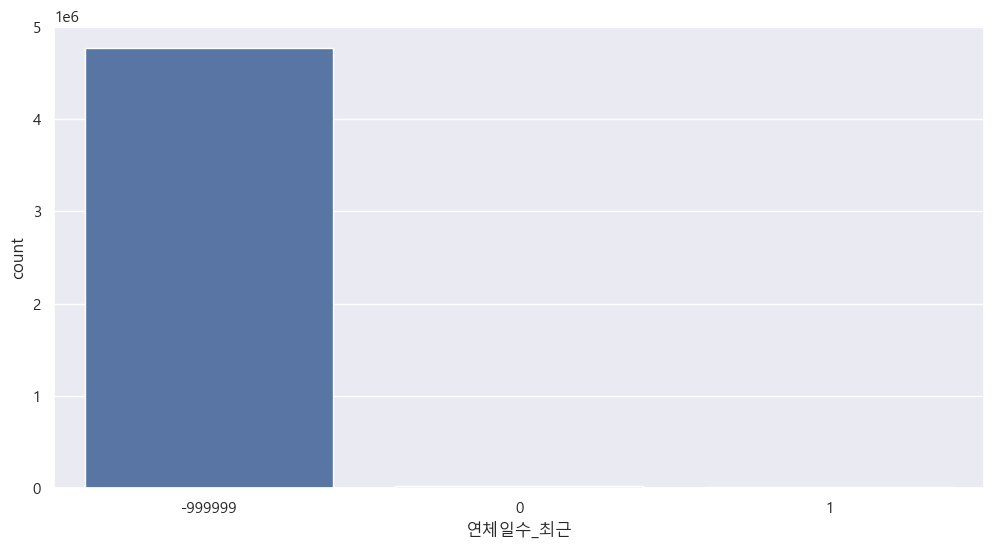

In [81]:
sns.countplot(x=df_temp['연체일수_최근'])
plt.show()

#### 연체원금_최근
 - 이번 연체 이전 연체금액

In [84]:
df_temp['연체원금_최근'].value_counts()

연체원금_최근
0       4780488
5192         38
3930         28
7890         28
3206         28
         ...   
2981          1
4166          1
6361          1
5500          1
2784          1
Name: count, Length: 3853, dtype: int64

In [85]:
df_temp['연체원금_최근'].describe()

count    4.800000e+06
mean     2.339319e+01
std      3.986297e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.619700e+04
Name: 연체원금_최근, dtype: float64

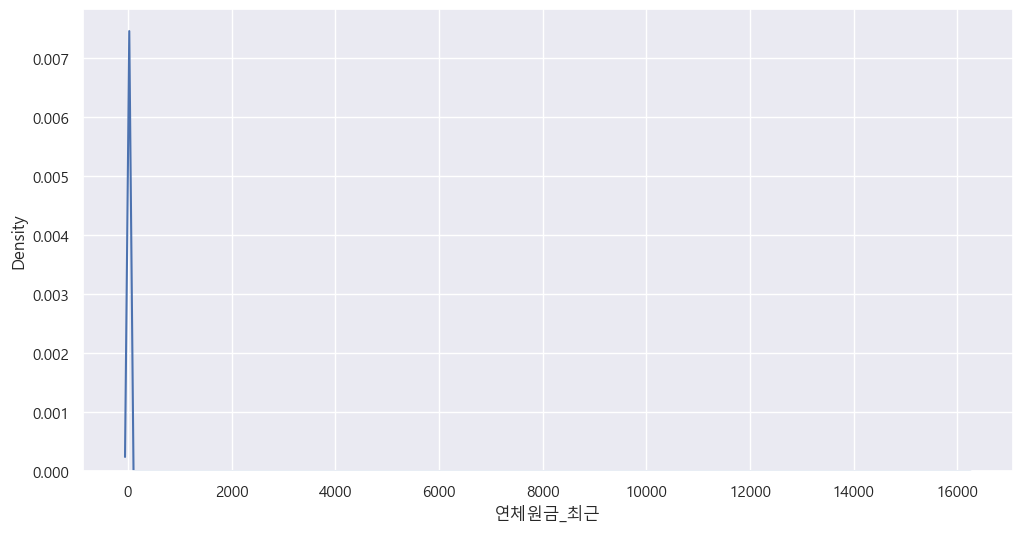

In [86]:
sns.kdeplot(x=df_temp['연체원금_최근'])
plt.show()

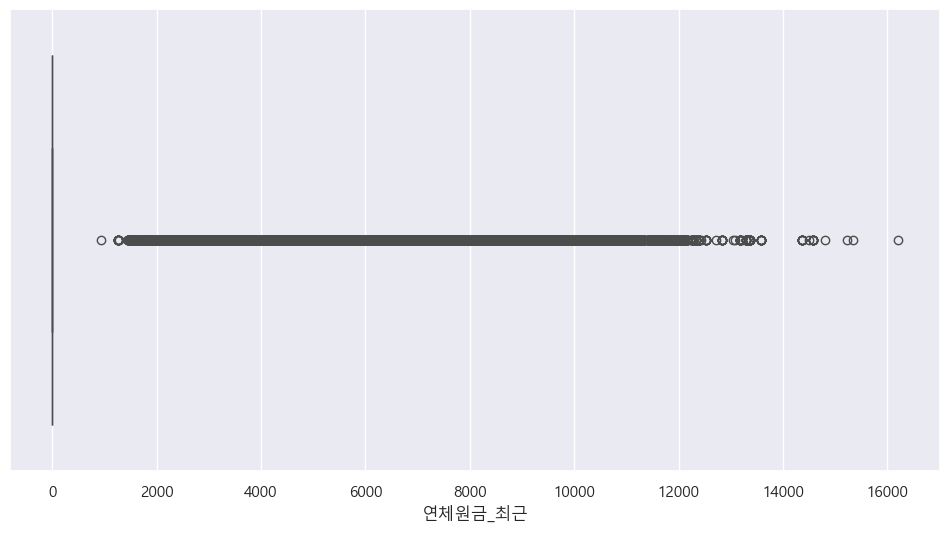

In [87]:
sns.boxplot(x=df_temp['연체원금_최근'])
plt.show()

#### 최종연체회차
 - 최종 연체 회차

In [89]:
df_temp['최종연체회차'].value_counts()

최종연체회차
-99    3233236
 0     1566764
Name: count, dtype: int64

In [90]:
df_temp['최종연체회차'].describe()

count    4.800000e+06
mean    -6.668549e+01
std      4.642100e+01
min     -9.900000e+01
25%     -9.900000e+01
50%     -9.900000e+01
75%      0.000000e+00
max      0.000000e+00
Name: 최종연체회차, dtype: float64

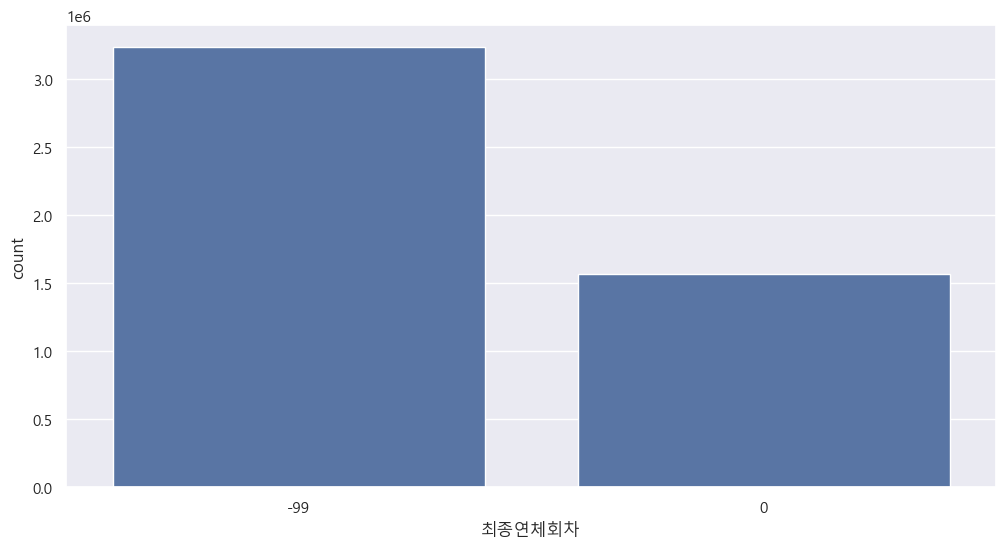

In [91]:
sns.countplot(x=df_temp['최종연체회차'])
plt.show()

#### 매각잔액_B1M
 - 매각 잔액 (1개월전)

In [92]:
df_temp['매각잔액_B1M'].value_counts()

매각잔액_B1M
0        4799991
46708          9
Name: count, dtype: int64

In [93]:
df_temp['매각잔액_B1M'].describe()

count    4.800000e+06
mean     8.757750e-02
std      6.395751e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.670800e+04
Name: 매각잔액_B1M, dtype: float64

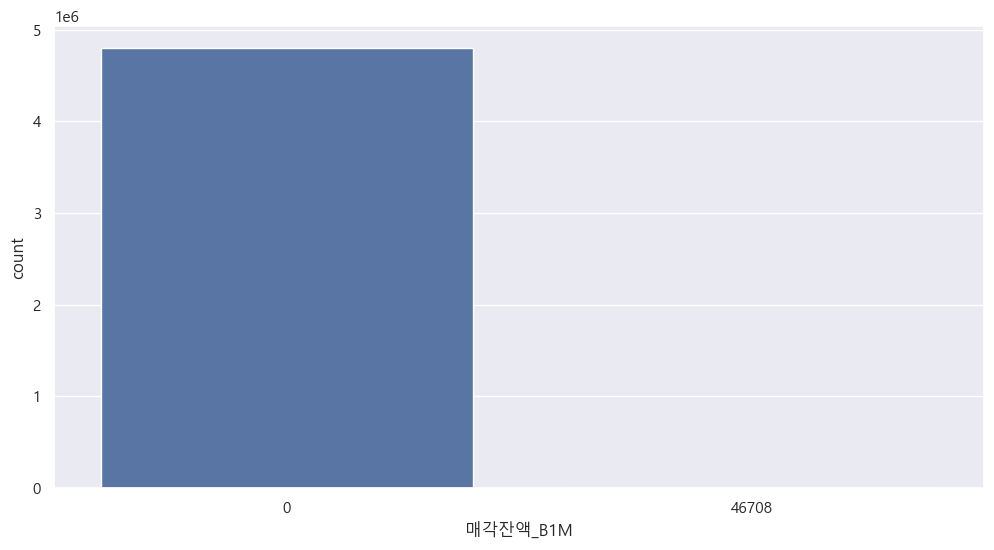

In [94]:
sns.countplot(x=df_temp['매각잔액_B1M'])
plt.show()

#### 최종연체개월수_R15M -> 0만 있음 drop
 - 최종 연체 개월수 (최근15개월간)

In [95]:
df_temp['최종연체개월수_R15M'].value_counts()

최종연체개월수_R15M
0    4800000
Name: count, dtype: int64

#### RV_평균잔액_R12M
 - 리볼빙 평균잔액 (최근1년간)

In [98]:
df_temp['RV_평균잔액_R12M'].value_counts()

RV_평균잔액_R12M
0        4508887
346          457
471          452
363          444
335          444
          ...   
17697          1
14262          1
29983          1
25549          1
17349          1
Name: count, Length: 24879, dtype: int64

In [99]:
df_temp['RV_평균잔액_R12M'].describe()

count    4.800000e+06
mean     3.948255e+02
std      2.977156e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.032310e+05
Name: RV_평균잔액_R12M, dtype: float64

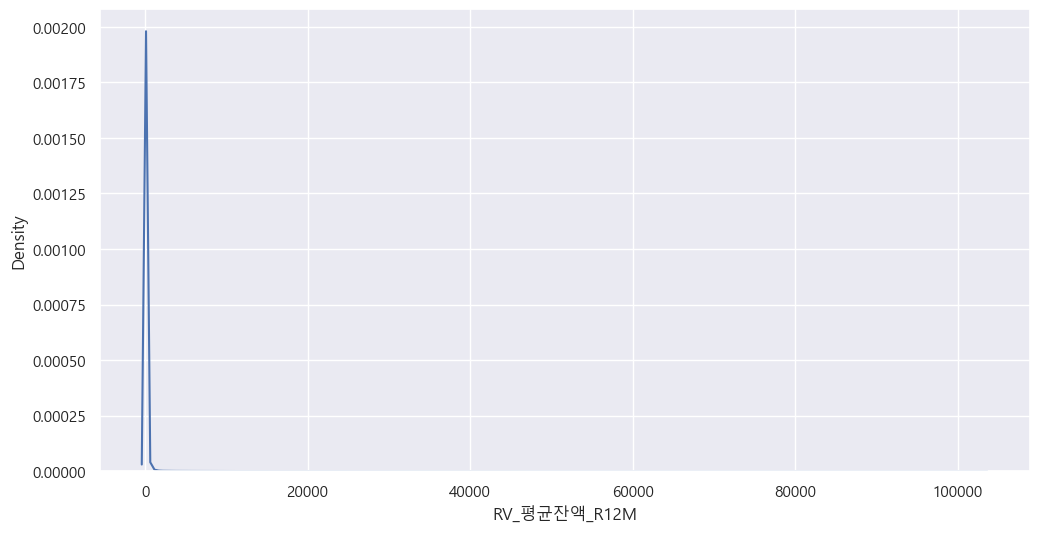

In [101]:
sns.kdeplot(x=df_temp['RV_평균잔액_R12M'])
plt.show()

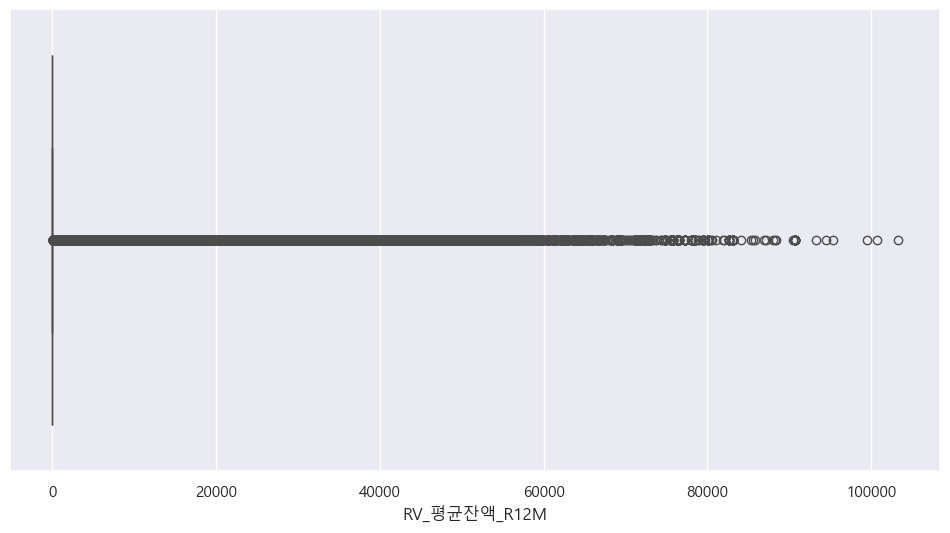

In [102]:
sns.boxplot(x=df_temp['RV_평균잔액_R12M'])
plt.show()

#### RV_최대잔액_R12M
 - 리볼빙 최대잔액 (최근1년간)

In [103]:
df_temp['RV_최대잔액_R12M'].value_counts()

RV_최대잔액_R12M
0        4508903
2734         192
2298         164
2933         157
2447         156
          ...   
22743          1
24944          1
34605          1
35509          1
6081           1
Name: count, Length: 29302, dtype: int64

In [104]:
df_temp['RV_최대잔액_R12M'].describe()

count    4.800000e+06
mean     6.322937e+02
std      3.731217e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.445500e+04
Name: RV_최대잔액_R12M, dtype: float64

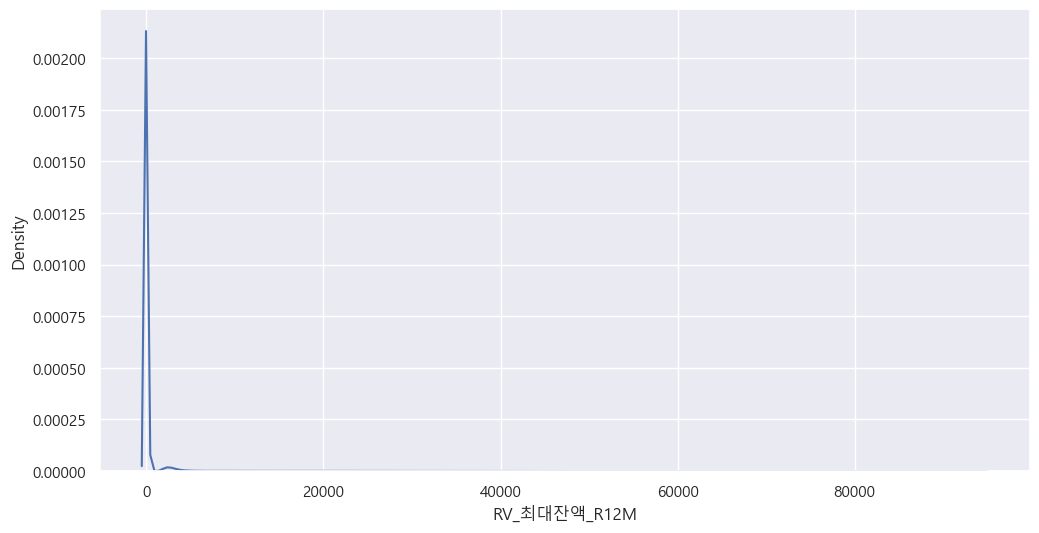

In [105]:
sns.kdeplot(x=df_temp['RV_최대잔액_R12M'])
plt.show()

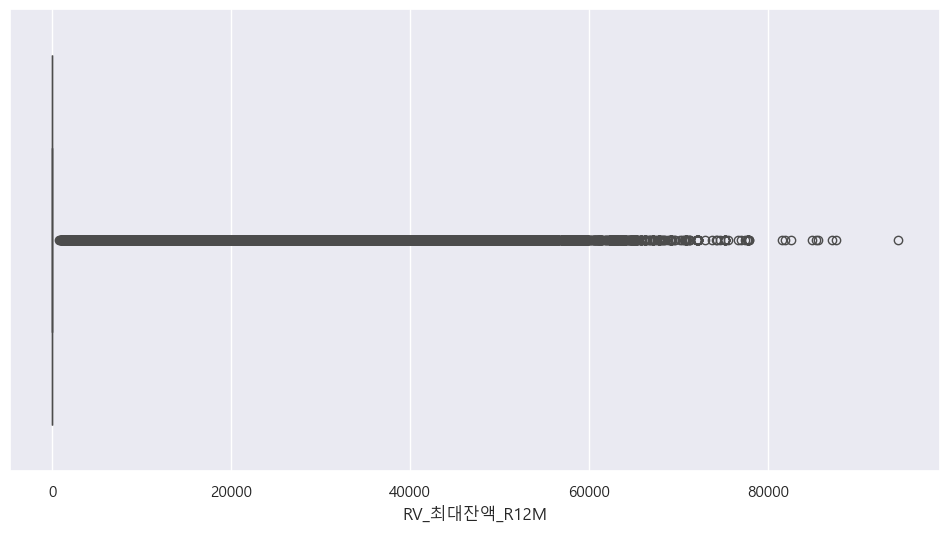

In [106]:
sns.boxplot(x=df_temp['RV_최대잔액_R12M'])
plt.show()

#### RV_평균잔액_R6M
 - 리볼빙 평균잔액 (최근6개월간)

In [107]:
df_temp['RV_평균잔액_R6M'].value_counts()

RV_평균잔액_R6M
0        4567710
632          263
715          250
725          240
677          237
          ...   
7321           1
15934          1
19788          1
7292           1
19050          1
Name: count, Length: 23831, dtype: int64

In [108]:
df_temp['RV_평균잔액_R6M'].describe()

count    4.800000e+06
mean     3.744872e+02
std      2.676455e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.496900e+04
Name: RV_평균잔액_R6M, dtype: float64

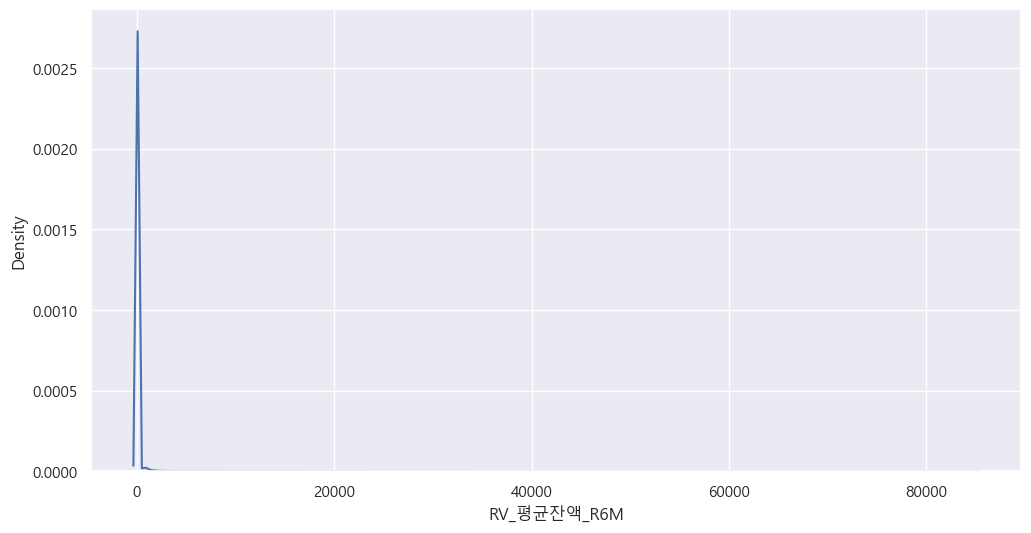

In [109]:
sns.kdeplot(x=df_temp['RV_평균잔액_R6M'])
plt.show()

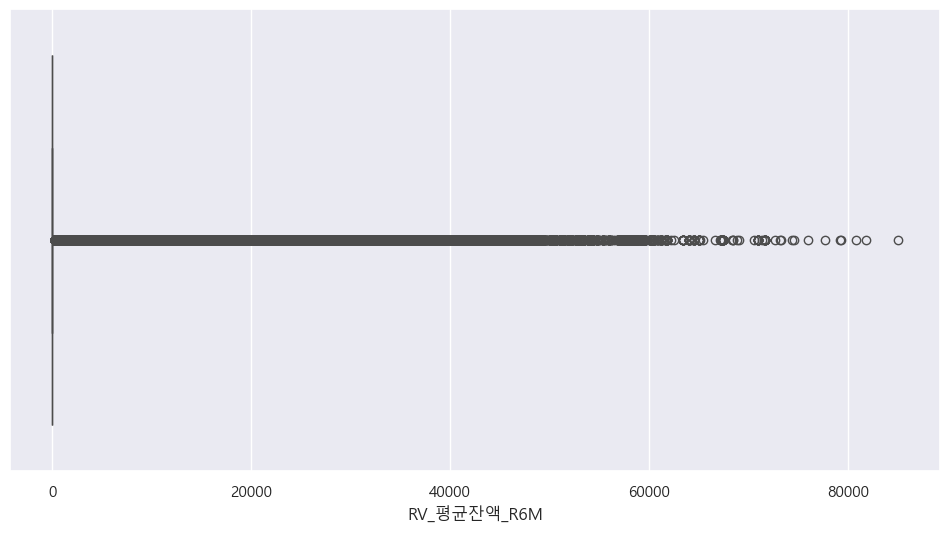

In [110]:
sns.boxplot(x=df_temp['RV_평균잔액_R6M'])
plt.show()

#### RV_최대잔액_R6M
 - 리볼빙 최대잔액 (최근6개월간)

In [111]:
df_temp['RV_최대잔액_R6M'].value_counts()

RV_최대잔액_R6M
0        4567752
2418         134
2452         131
2371         128
2858         120
          ...   
20130          1
26397          1
35052          1
36716          1
23499          1
Name: count, Length: 25896, dtype: int64

In [112]:
df_temp['RV_최대잔액_R6M'].describe()

count    4.800000e+06
mean     5.107466e+02
std      3.093798e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.314400e+04
Name: RV_최대잔액_R6M, dtype: float64

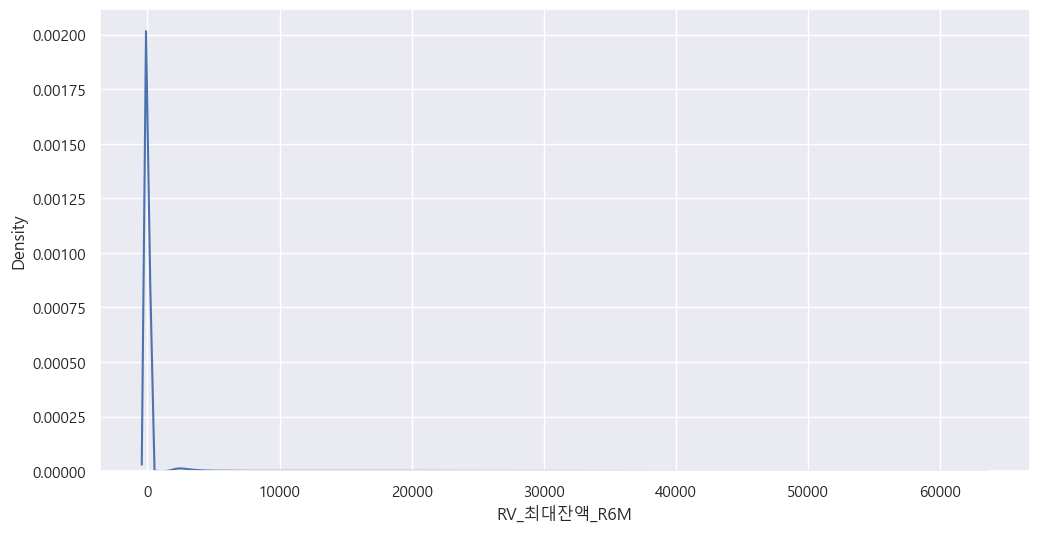

In [113]:
sns.kdeplot(x=df_temp['RV_최대잔액_R6M'])
plt.show()

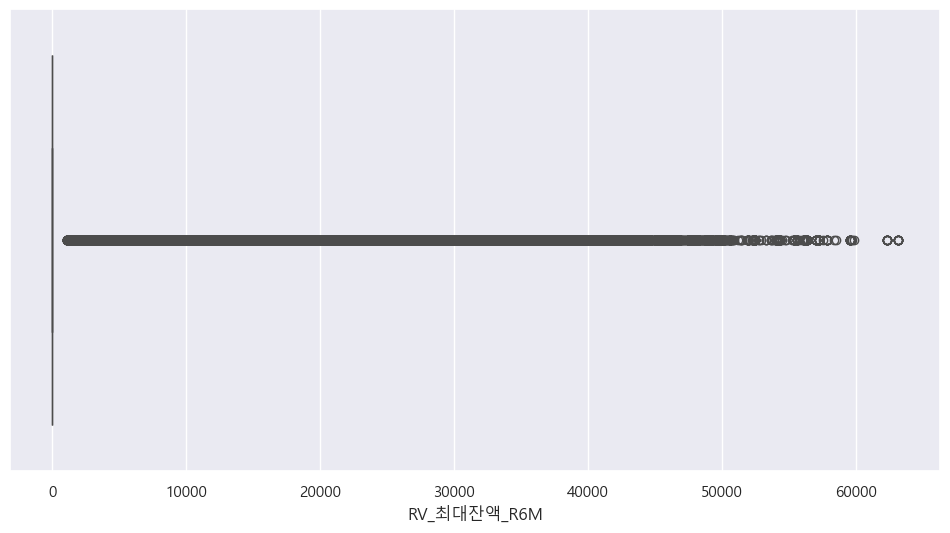

In [114]:
sns.boxplot(x=df_temp['RV_최대잔액_R6M'])
plt.show()

#### RV_평균잔액_R3M
 - 리볼빙 평균잔액 (최근3개월간)

In [115]:
df_temp['RV_평균잔액_R3M'].value_counts()

RV_평균잔액_R3M
0        4610887
1827         121
1583         116
1835         108
1809         105
          ...   
991            1
7853           1
13366          1
16665          1
16380          1
Name: count, Length: 21845, dtype: int64

In [116]:
df_temp['RV_평균잔액_R3M'].describe()

count    4.800000e+06
mean     3.507437e+02
std      2.278271e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.085500e+04
Name: RV_평균잔액_R3M, dtype: float64

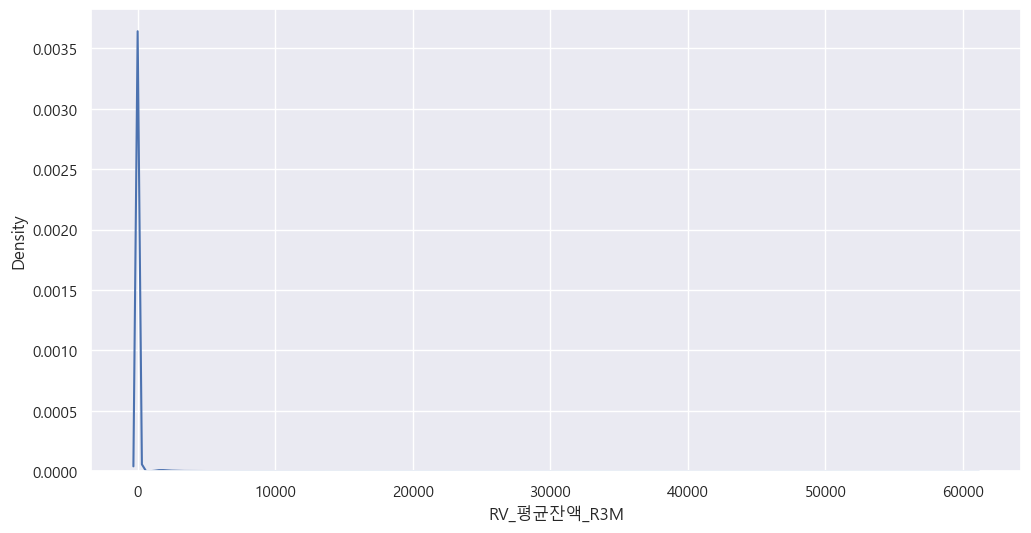

In [117]:
sns.kdeplot(x=df_temp['RV_평균잔액_R3M'])
plt.show()

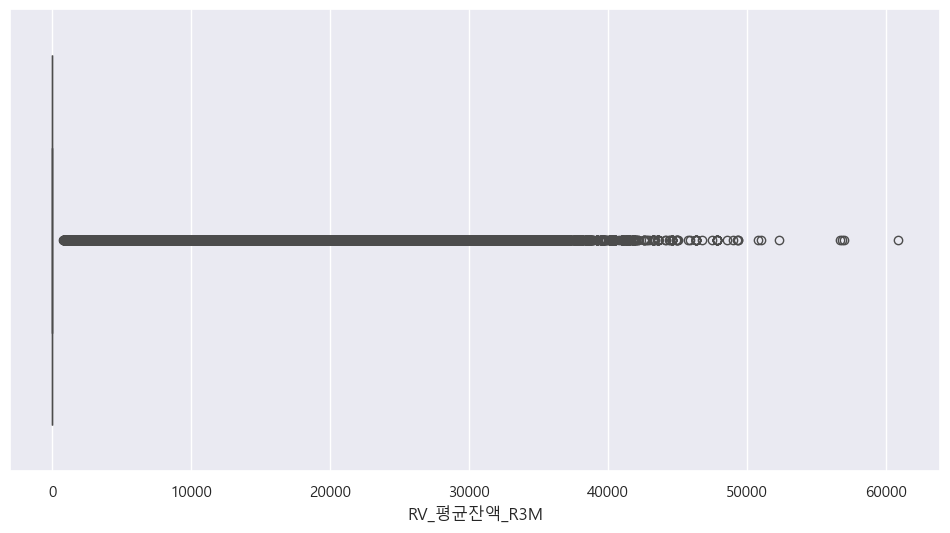

In [118]:
sns.boxplot(x=df_temp['RV_평균잔액_R3M'])
plt.show()

#### RV_최대잔액_R3M
 - 리볼빙 최대잔액 (최근3개월간)

In [119]:
df_temp['RV_최대잔액_R3M'].value_counts()

RV_최대잔액_R3M
0        4610559
3778          92
3170          86
3025          77
3306          71
          ...   
35650          1
29997          1
17543          1
23494          1
17547          1
Name: count, Length: 22811, dtype: int64

In [120]:
df_temp['RV_최대잔액_R3M'].describe()

count    4.800000e+06
mean     4.357568e+02
std      2.615714e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.956400e+04
Name: RV_최대잔액_R3M, dtype: float64

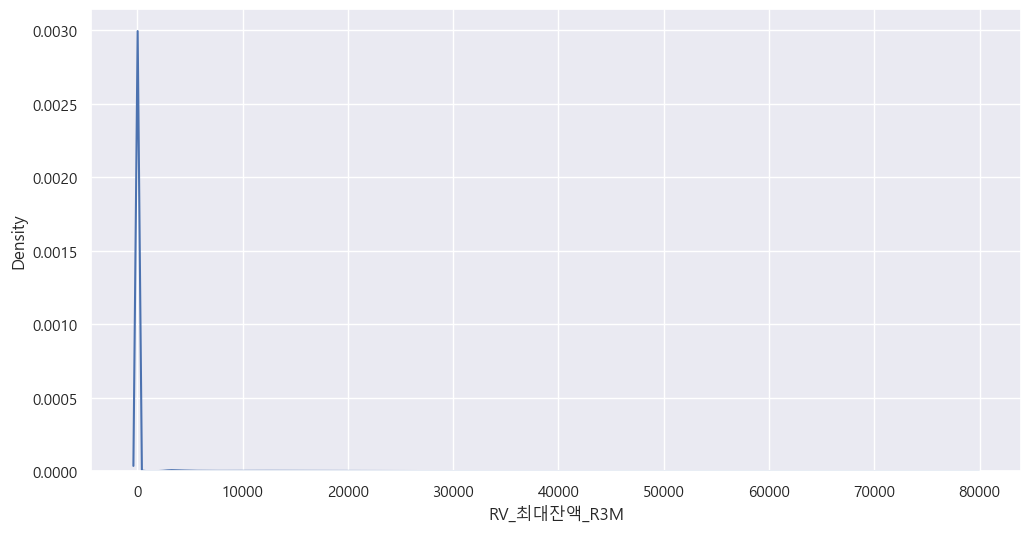

In [121]:
sns.kdeplot(x=df_temp['RV_최대잔액_R3M'])
plt.show()

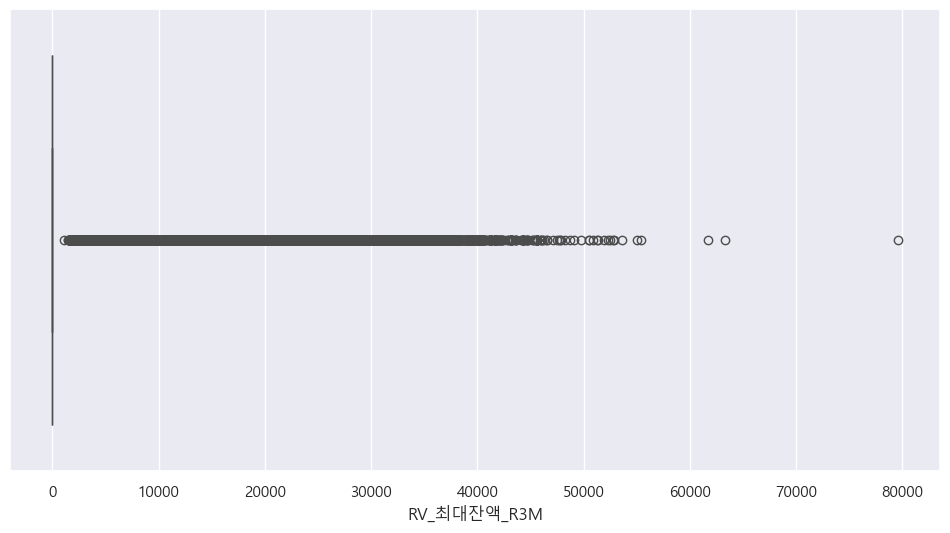

In [122]:
sns.boxplot(x=df_temp['RV_최대잔액_R3M'])
plt.show()

#### RV잔액이월횟수_R6M -> 0 drop
 - 리볼빙 잔액 이월 횟수 (최근6개월간)

In [123]:
df_temp['RV잔액이월횟수_R6M'].value_counts()

RV잔액이월횟수_R6M
0    4800000
Name: count, dtype: int64

#### RV잔액이월횟수_R3M -> 0 drop
 - 리볼빙 잔액 이월 횟수 (최근3개월)

In [127]:
df_temp['RV잔액이월횟수_R3M'].value_counts()

RV잔액이월횟수_R3M
0    4800000
Name: count, dtype: int64

#### 잔액_할부_유이자_B0M
 - 잔액 할부 유이자 (당월)

In [128]:
df_temp['잔액_할부_유이자_B0M'].value_counts()

잔액_할부_유이자_B0M
0        4085497
2190         433
2645         426
2335         418
2414         416
          ...   
12107          1
13792          1
14554          1
11816          1
11812          1
Name: count, Length: 12956, dtype: int64

In [129]:
df_temp['잔액_할부_유이자_B0M'].describe()

count    4.800000e+06
mean     5.228410e+02
std      1.539437e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.061400e+04
Name: 잔액_할부_유이자_B0M, dtype: float64

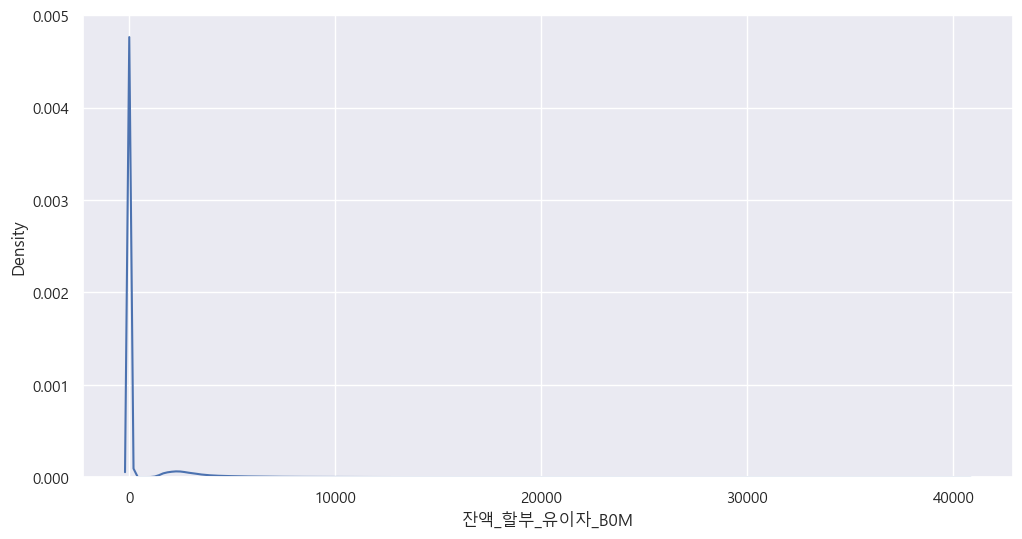

In [130]:
sns.kdeplot(x=df_temp['잔액_할부_유이자_B0M'])
plt.show()

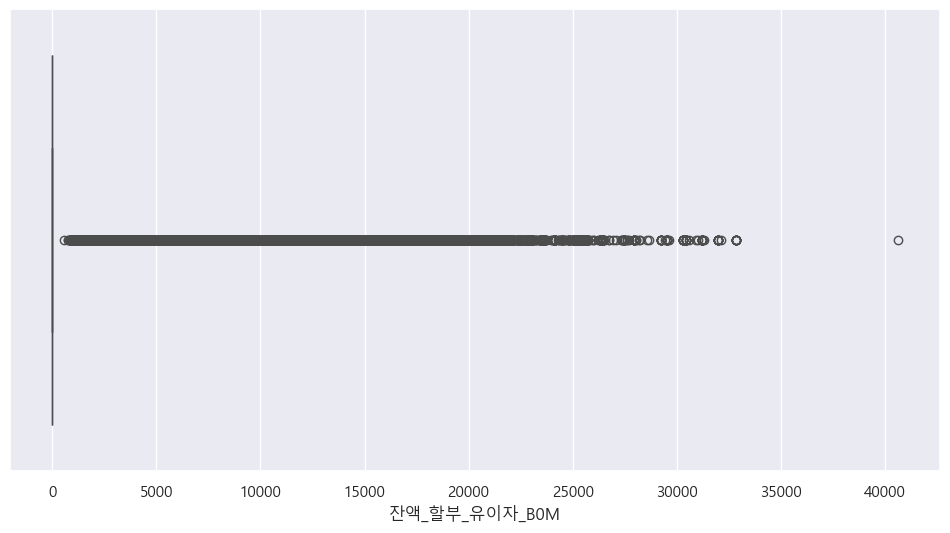

In [131]:
sns.boxplot(x=df_temp['잔액_할부_유이자_B0M'])
plt.show()

#### 잔액_할부_무이자_B0M
 - 잔액 할부 무이자 (당월)

In [132]:
df_temp['잔액_할부_무이자_B0M'].value_counts()

잔액_할부_무이자_B0M
0        3446034
1979         662
1893         647
1921         638
1522         624
          ...   
21987          1
50611          1
14779          1
32688          1
11728          1
Name: count, Length: 22734, dtype: int64

In [133]:
df_temp['잔액_할부_무이자_B0M'].describe()

count    4.800000e+06
mean     1.132455e+03
std      3.019799e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.275000e+03
max      7.146500e+04
Name: 잔액_할부_무이자_B0M, dtype: float64

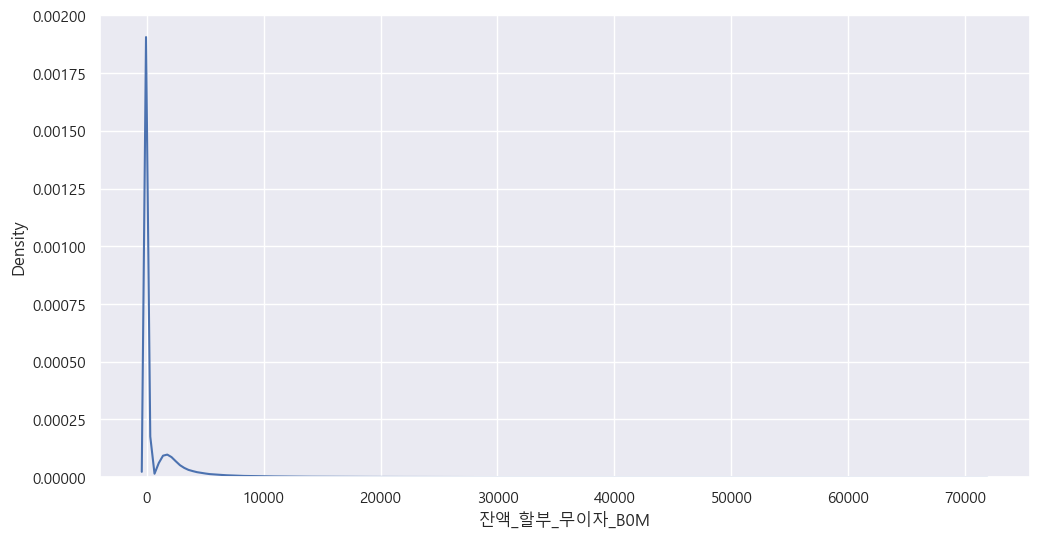

In [134]:
sns.kdeplot(x=df_temp['잔액_할부_무이자_B0M'])
plt.show()

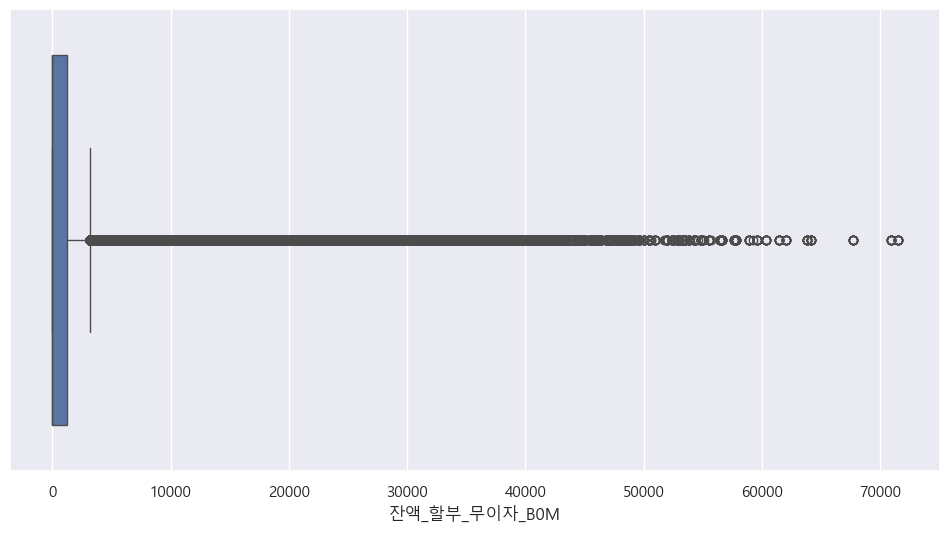

In [135]:
sns.boxplot(x=df_temp['잔액_할부_무이자_B0M'])
plt.show()

#### 잔액_할부_해외_B0M
 - 잔액 할부 해외 (당월)

In [136]:
df_temp['잔액_할부_해외_B0M'].value_counts()

잔액_할부_해외_B0M
0       4798766
6041         29
6049         28
6088         27
6114         27
         ...   
6015          1
5580          1
5931          1
5833          1
6033          1
Name: count, Length: 264, dtype: int64

In [137]:
df_temp['잔액_할부_해외_B0M'].describe()

count    4.800000e+06
mean     1.551611e+00
std      9.677550e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.739000e+03
Name: 잔액_할부_해외_B0M, dtype: float64

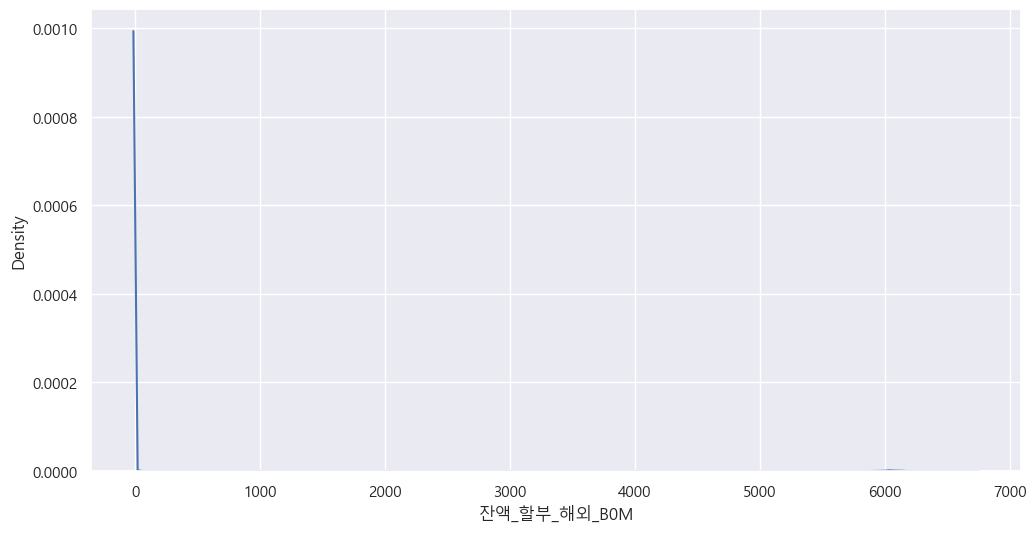

In [138]:
sns.kdeplot(x=df_temp['잔액_할부_해외_B0M'])
plt.show()

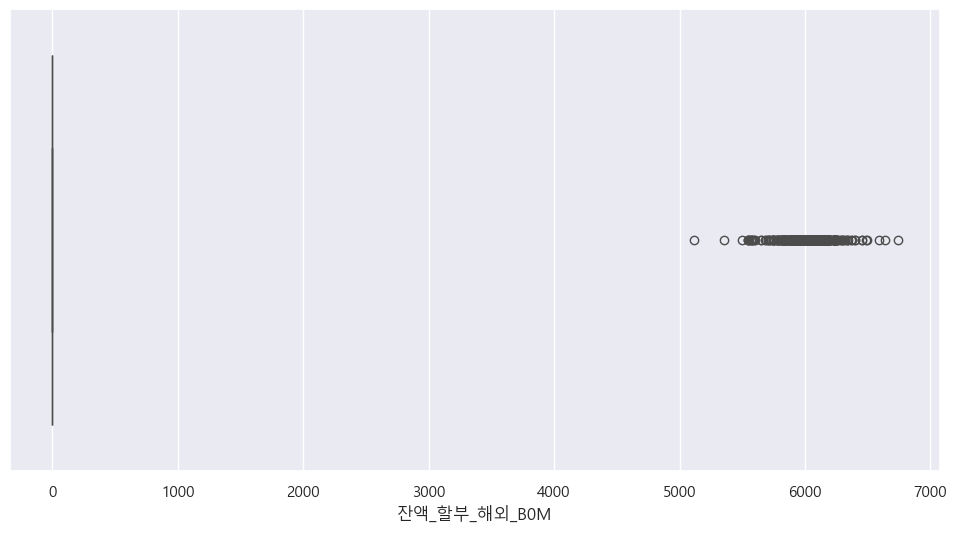

In [139]:
sns.boxplot(x=df_temp['잔액_할부_해외_B0M'])
plt.show()

#### 연체잔액_일시불_해외_B0M -> 0 Drop
 - 연체잔액 일시불 해외 (당월)

In [140]:
df_temp['연체잔액_일시불_해외_B0M'].value_counts()

연체잔액_일시불_해외_B0M
0    4800000
Name: count, dtype: int64

#### 연체잔액_CA_B0M
 - 연체잔액 현금서비스 (당월)

In [143]:
df_temp['연체잔액_CA_B0M'].value_counts()

연체잔액_CA_B0M
0       4793825
8255         46
8271         37
8267         37
8411         37
         ...   
8167          1
7915          1
7353          1
7932          1
6810          1
Name: count, Length: 765, dtype: int64

In [144]:
df_temp['연체잔액_CA_B0M'].describe()

count    4.800000e+06
mean     1.061650e+01
std      2.959667e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.084800e+04
Name: 연체잔액_CA_B0M, dtype: float64

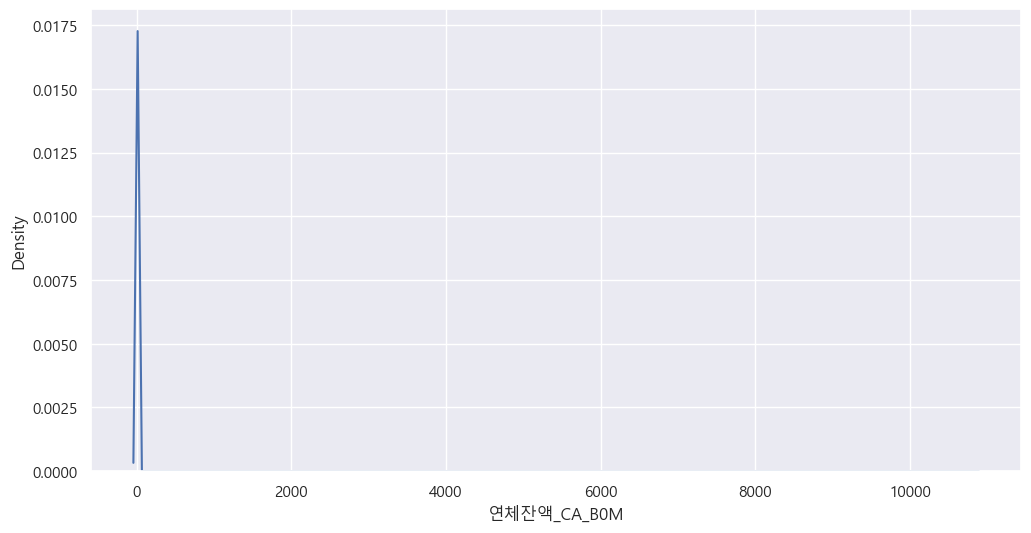

In [145]:
sns.kdeplot(x=df_temp['연체잔액_CA_B0M'])
plt.show()

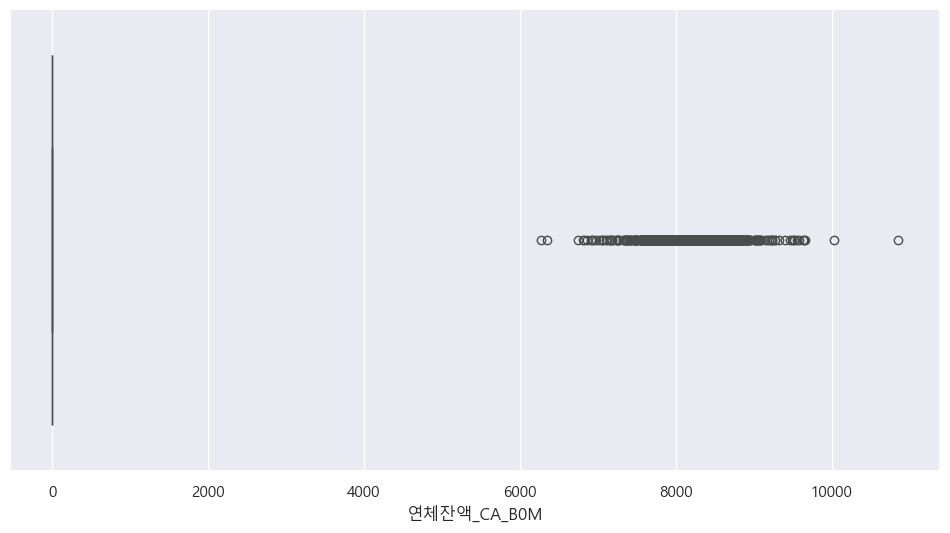

In [146]:
sns.boxplot(x=df_temp['연체잔액_CA_B0M'])
plt.show()

#### 연체잔액_CA_해외_B0M -> 0 drop
 - 연체잔액 현금서비스 해외 (당월)

In [147]:
df_temp['연체잔액_CA_해외_B0M'].value_counts()

연체잔액_CA_해외_B0M
0    4800000
Name: count, dtype: int64

#### 월중평잔
 - 월 평균 잔액

In [148]:
df_temp['월중평잔'].value_counts()

월중평잔
0         986862
330702      6684
12          5422
13          5367
14          5247
           ...  
59077          1
70779          1
69122          1
107054         1
77538          1
Name: count, Length: 95410, dtype: int64

In [149]:
df_temp['월중평잔'].describe()

count    4.800000e+06
mean     1.042778e+04
std      2.753003e+04
min      0.000000e+00
25%      1.600000e+02
50%      3.002000e+03
75%      8.837000e+03
max      3.307020e+05
Name: 월중평잔, dtype: float64

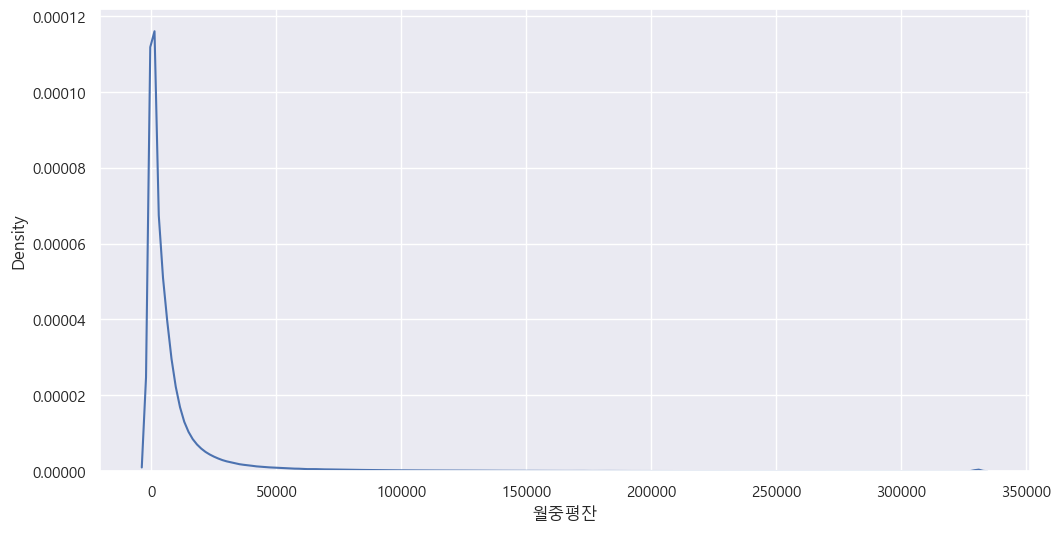

In [150]:
sns.kdeplot(x=df_temp['월중평잔'])
plt.show()

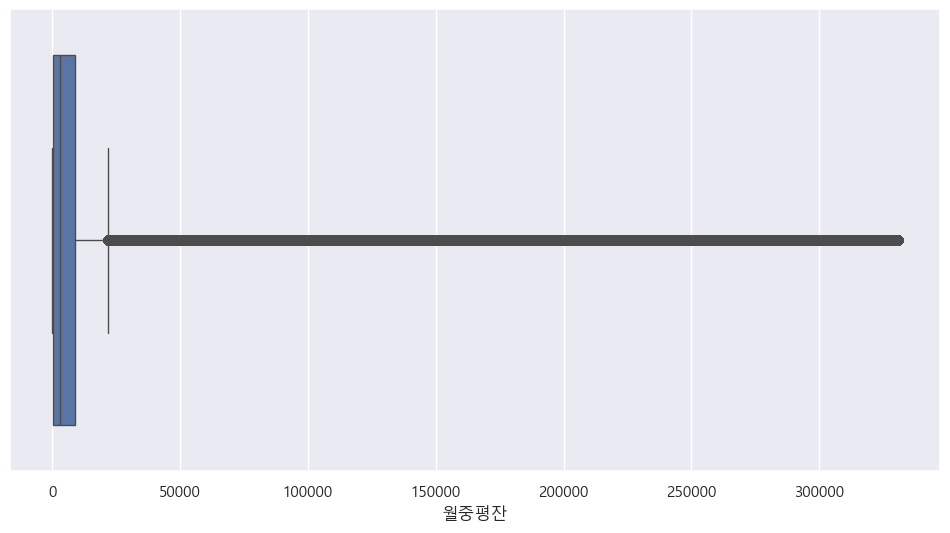

In [151]:
sns.boxplot(x=df_temp['월중평잔'])
plt.show()

#### 월중평잔_일시불
 - 월 평균 잔액

In [152]:
df_temp['월중평잔_일시불'].value_counts()

월중평잔_일시불
0         1140055
4            7777
3            6825
5            5585
8            5131
           ...   
34113           1
137650          1
63724           1
38798           1
46583           1
Name: count, Length: 43290, dtype: int64

In [153]:
df_temp['월중평잔_일시불'].describe()

count    4.800000e+06
mean     3.726190e+03
std      6.679784e+03
min      0.000000e+00
25%      1.400000e+01
50%      1.430000e+03
75%      4.597000e+03
max      2.130830e+05
Name: 월중평잔_일시불, dtype: float64

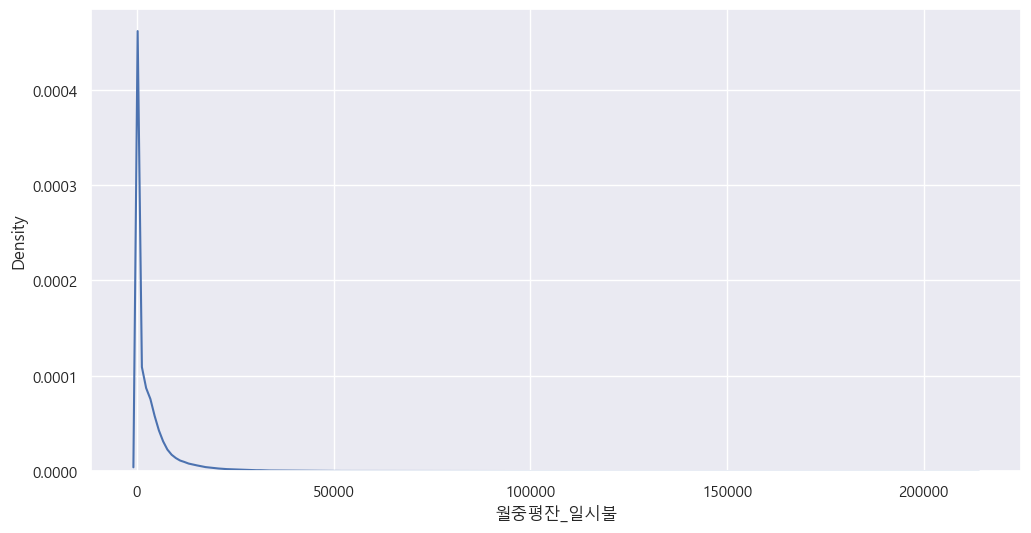

In [154]:
sns.kdeplot(x=df_temp['월중평잔_일시불'])
plt.show()

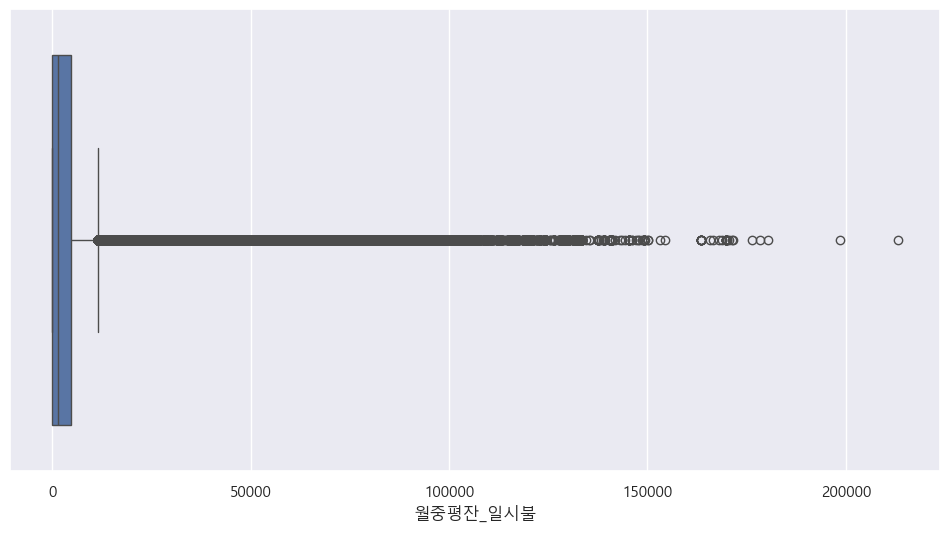

In [155]:
sns.boxplot(x=df_temp['월중평잔_일시불'])
plt.show()

#### 월중평잔_RV일시불
 - 월 평균 잔액 리볼빙 일시불

In [156]:
df_temp['월중평잔_RV일시불'].value_counts()

월중평잔_RV일시불
0        4027884
1789         278
2204         277
1423         276
2259         271
          ...   
66893          1
27404          1
26589          1
43824          1
21955          1
Name: count, Length: 31071, dtype: int64

In [157]:
df_temp['월중평잔_RV일시불'].describe()

count    4.800000e+06
mean     9.090899e+02
std      4.194364e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.788550e+05
Name: 월중평잔_RV일시불, dtype: float64

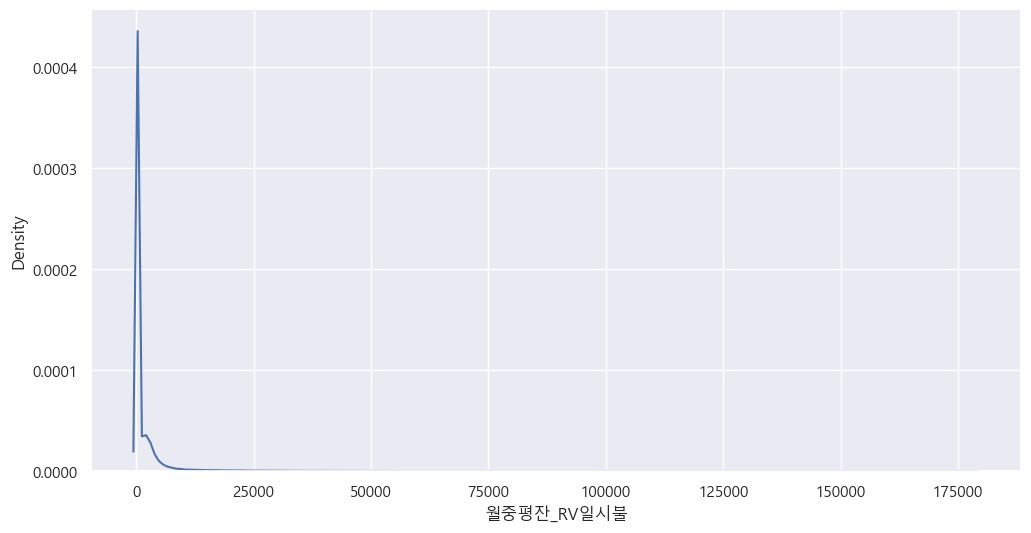

In [158]:
sns.kdeplot(x=df_temp['월중평잔_RV일시불'])
plt.show()

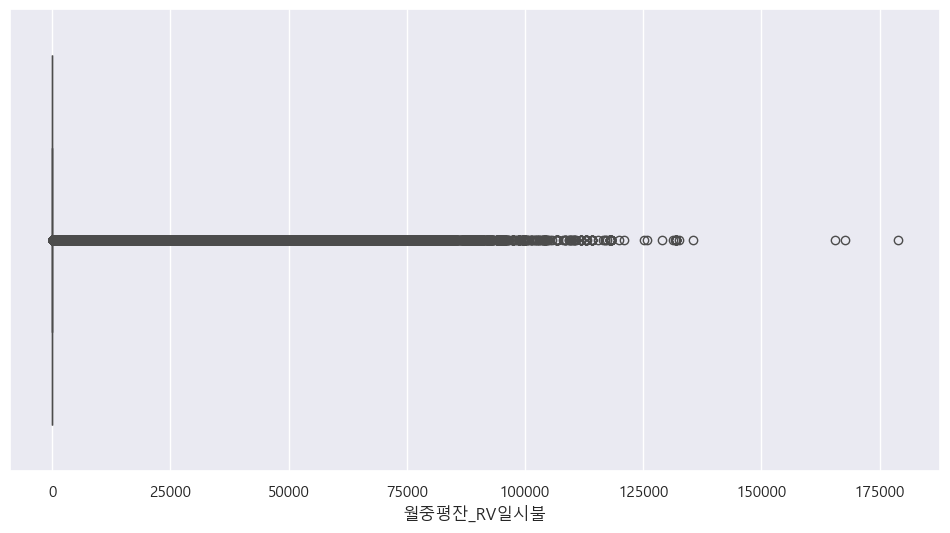

In [159]:
sns.boxplot(x=df_temp['월중평잔_RV일시불'])
plt.show()

#### 월중평잔_할부
 - 월 평균 잔액 할부

In [164]:
df_temp['월중평잔_할부'].value_counts()

월중평잔_할부
0        3048352
1544         651
1367         645
1287         637
1369         621
          ...   
27603          1
36053          1
45225          1
41305          1
50358          1
Name: count, Length: 38704, dtype: int64

In [165]:
df_temp['월중평잔_할부'].describe()

count    4.800000e+06
mean     2.176665e+03
std      6.518101e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.694000e+03
max      1.807770e+05
Name: 월중평잔_할부, dtype: float64

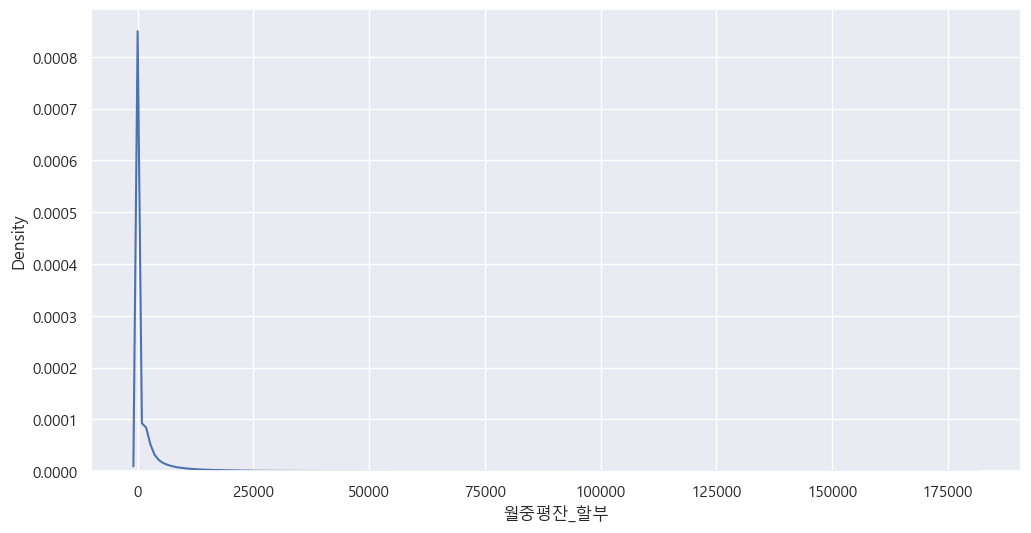

In [166]:
sns.kdeplot(x=df_temp['월중평잔_할부'])
plt.show()

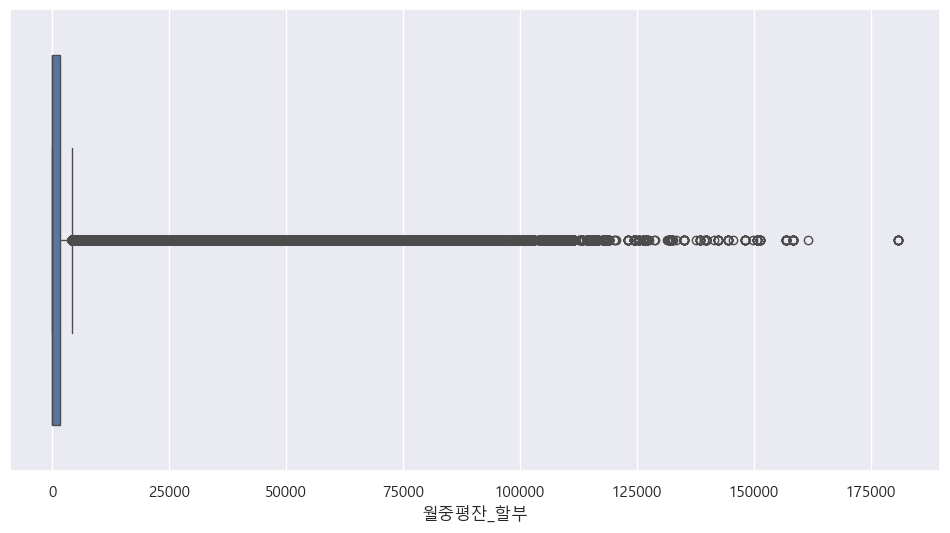

In [167]:
sns.boxplot(x=df_temp['월중평잔_할부'])
plt.show()

#### 월중평잔_CA
 - 월 평균 잔액 현금서비스 

In [168]:
df_temp['월중평잔_CA'].value_counts()

월중평잔_CA
0        4491160
2188         124
2482         117
3374         109
2634         105
          ...   
26805          1
19716          1
17081          1
53271          1
39136          1
Name: count, Length: 29378, dtype: int64

In [169]:
df_temp['월중평잔_CA'].describe()

count    4.800000e+06
mean     7.088408e+02
std      3.983186e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.104780e+05
Name: 월중평잔_CA, dtype: float64

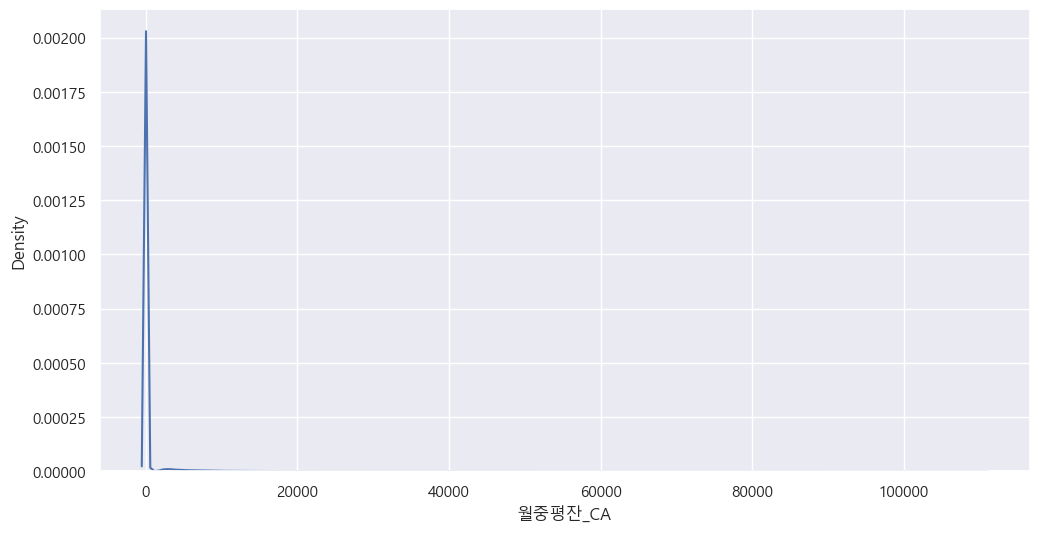

In [170]:
sns.kdeplot(x=df_temp['월중평잔_CA'])
plt.show()

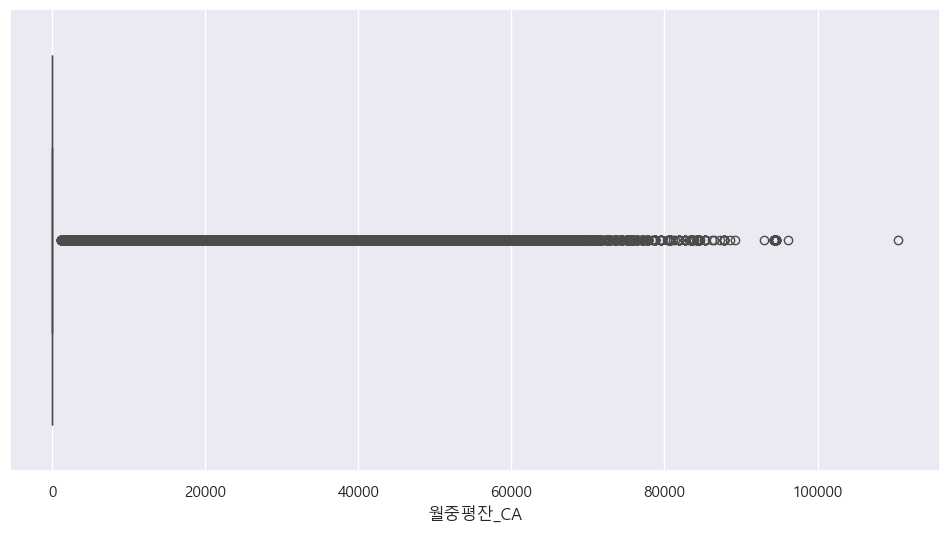

In [171]:
sns.boxplot(x=df_temp['월중평잔_CA'])
plt.show()

#### 월중평잔_카드론
 - 월 평균 잔액 카드론

In [172]:
df_temp['월중평잔_카드론'].value_counts()

월중평잔_카드론
0         4496647
24010          56
35985          48
26556          48
21185          47
           ...   
131303          1
17209           1
61912           1
66488           1
73551           1
Name: count, Length: 56434, dtype: int64

In [173]:
df_temp['월중평잔_카드론'].describe()

count    4.800000e+06
mean     2.631752e+03
std      1.259326e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.417900e+05
Name: 월중평잔_카드론, dtype: float64

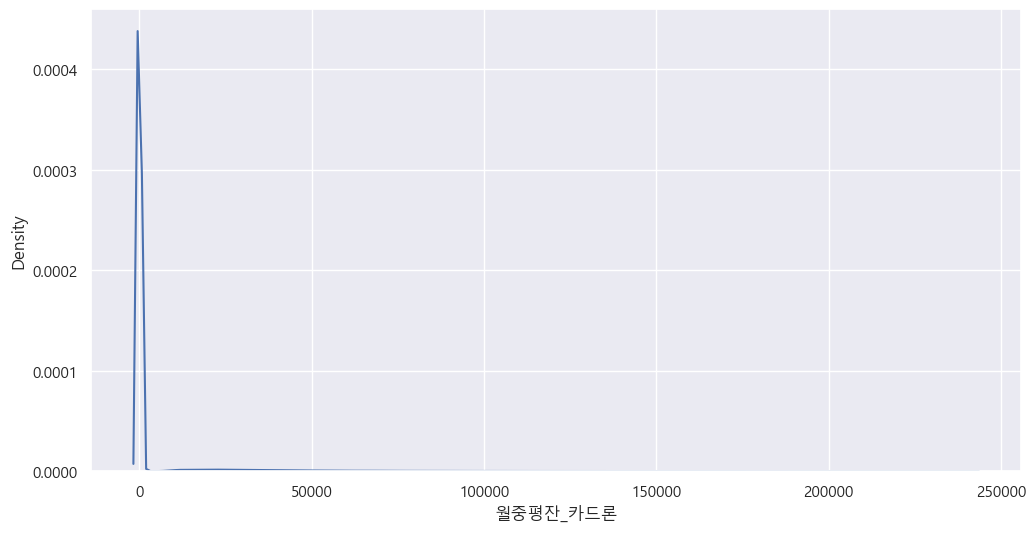

In [174]:
sns.kdeplot(x=df_temp['월중평잔_카드론'])
plt.show()

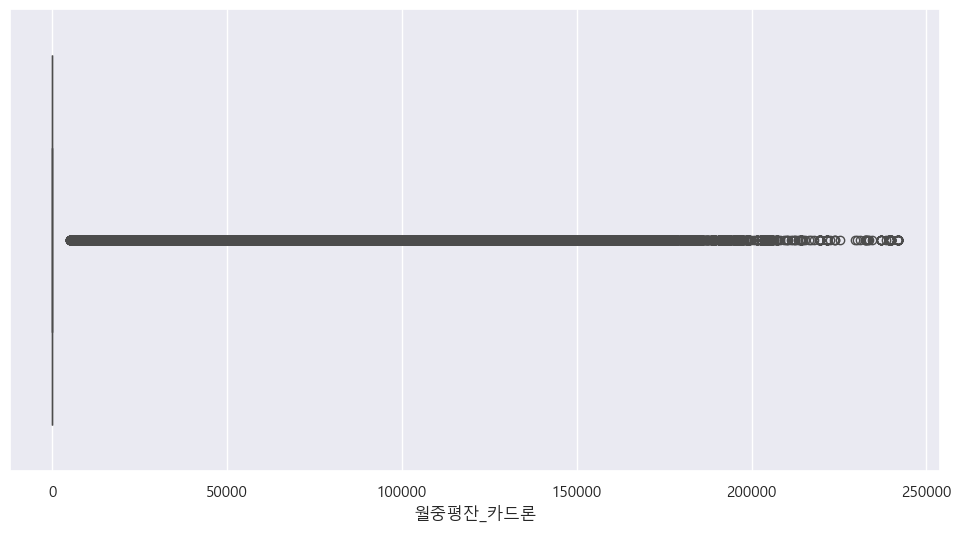

In [175]:
sns.boxplot(x=df_temp['월중평잔_카드론'])
plt.show()

#### 평잔_3M
 - 평균 잔액 (최근3개월)

In [176]:
df_temp['평잔_3M'].value_counts()

평잔_3M
0         840413
311938      9438
8           7054
9           6955
10          6650
           ...  
162611         1
53486          1
127844         1
170992         1
189423         1
Name: count, Length: 100100, dtype: int64

In [177]:
df_temp['평잔_3M'].describe()

count    4.800000e+06
mean     1.126467e+04
std      2.909373e+04
min      0.000000e+00
25%      2.040000e+02
50%      3.332000e+03
75%      9.499000e+03
max      3.119380e+05
Name: 평잔_3M, dtype: float64

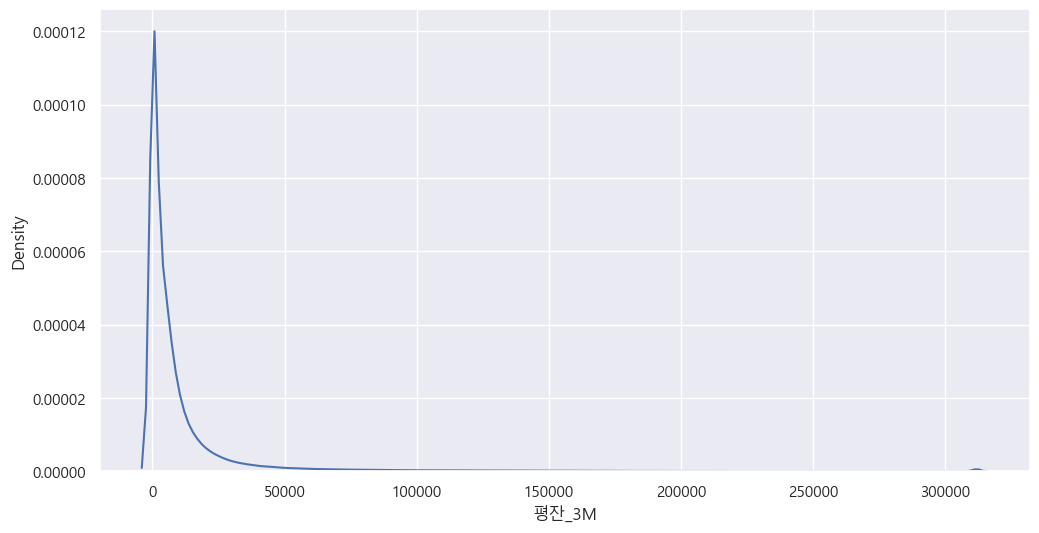

In [178]:
sns.kdeplot(x=df_temp['평잔_3M'])
plt.show()

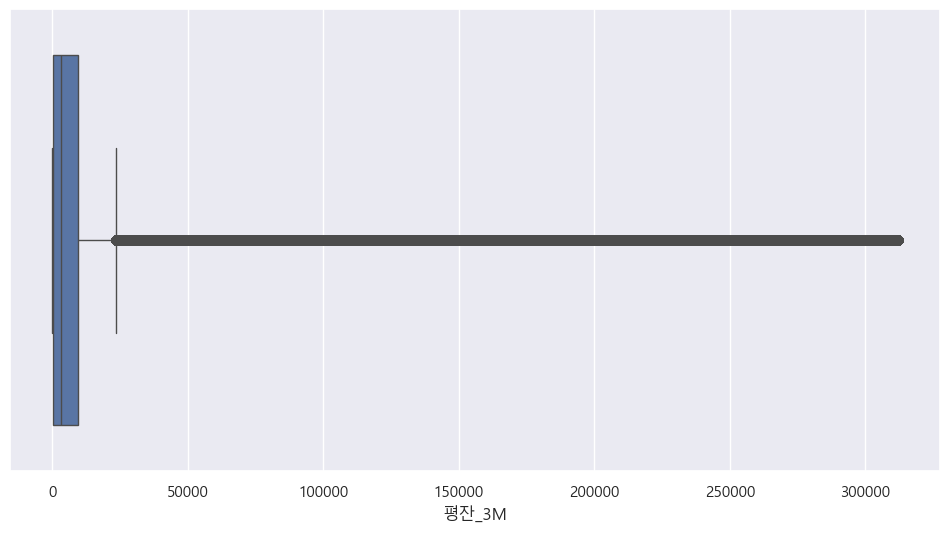

In [179]:
sns.boxplot(x=df_temp['평잔_3M'])
plt.show()

#### 평잔_일시불_3M
 - 평균 잔액 일시불 (최근3개월)

In [180]:
df_temp['평잔_일시불_3M'].value_counts()

평잔_일시불_3M
0        968191
3          9115
7          8831
8          8030
6          7998
          ...  
35680         1
57223         1
57375         1
32517         1
27719         1
Name: count, Length: 45127, dtype: int64

In [181]:
df_temp['평잔_일시불_3M'].describe()

count    4.800000e+06
mean     3.954507e+03
std      6.956613e+03
min      0.000000e+00
25%      8.100000e+01
50%      1.658000e+03
75%      4.812000e+03
max      1.842760e+05
Name: 평잔_일시불_3M, dtype: float64

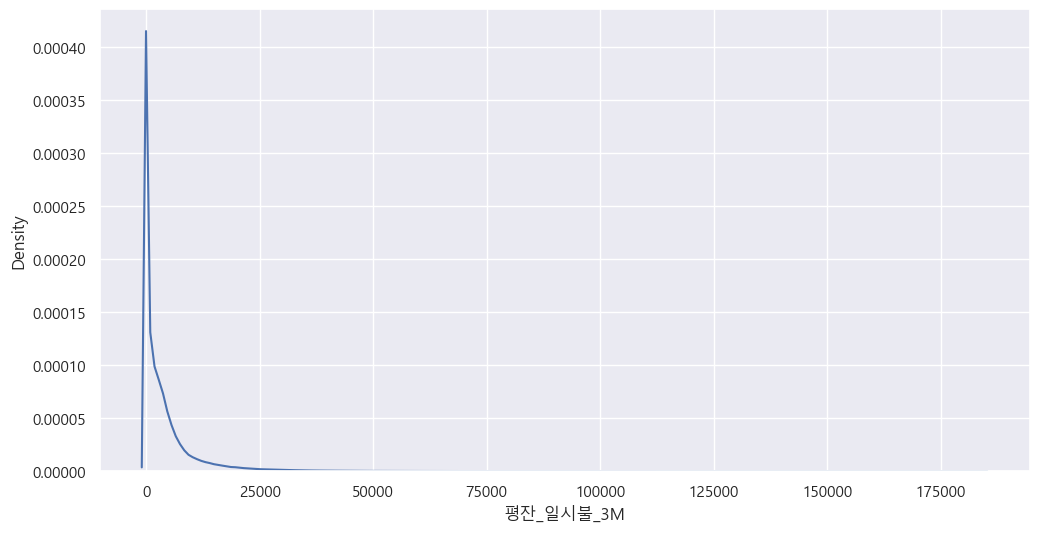

In [182]:
sns.kdeplot(x=df_temp['평잔_일시불_3M'])
plt.show()

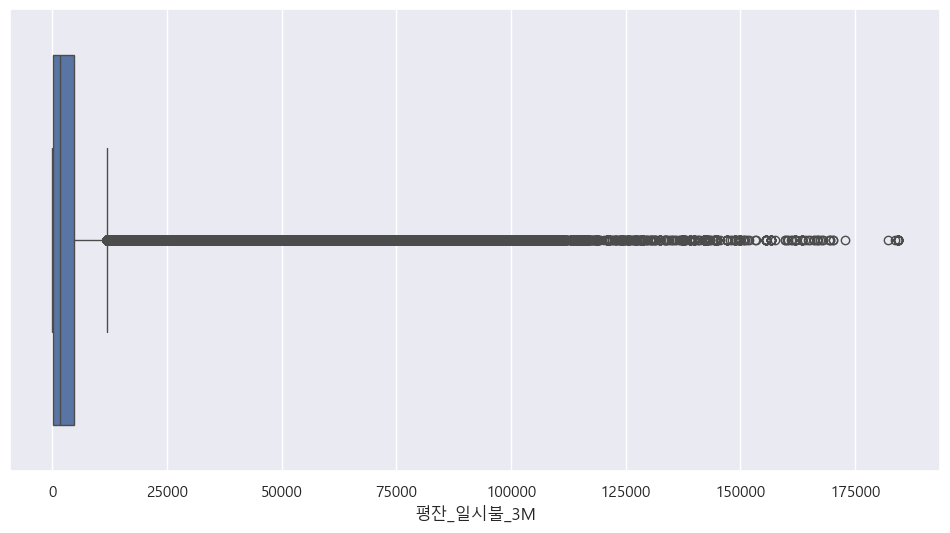

In [183]:
sns.boxplot(x=df_temp['평잔_일시불_3M'])
plt.show()

#### 평잔_일시불_해외_3M
 - 평균 잔액 일시불 해외 (최근3개월)

In [184]:
df_temp['평잔_일시불_해외_3M'].value_counts()

평잔_일시불_해외_3M
0       4265352
312        2911
298        2750
305        2743
331        2740
         ...   
1963          1
1204          1
1432          1
1506          1
1730          1
Name: count, Length: 1350, dtype: int64

In [185]:
df_temp['평잔_일시불_해외_3M'].describe()

count    4.800000e+06
mean     4.344558e+01
std      1.323937e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.639000e+03
Name: 평잔_일시불_해외_3M, dtype: float64

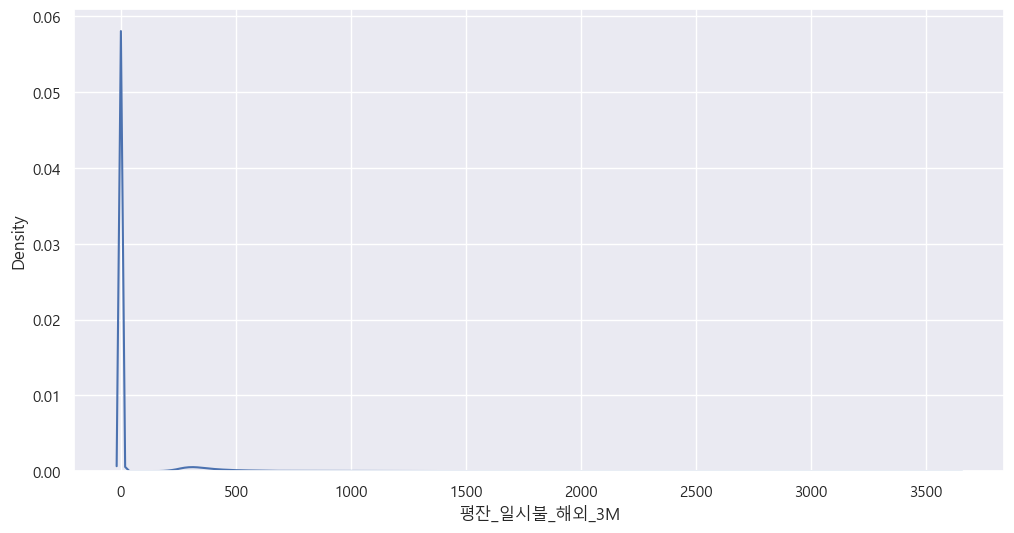

In [186]:
sns.kdeplot(x=df_temp['평잔_일시불_해외_3M'])
plt.show()

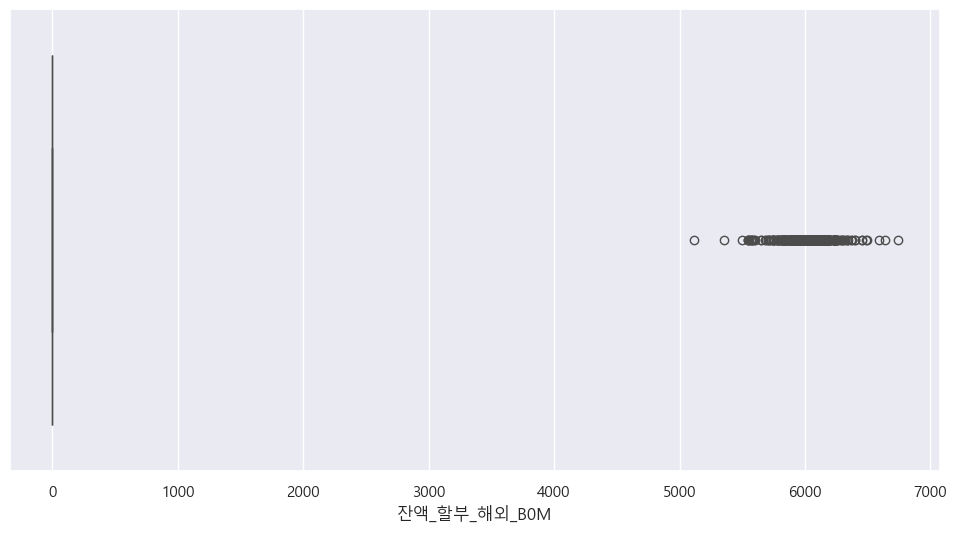

In [187]:
sns.boxplot(x=df_temp['잔액_할부_해외_B0M'])
plt.show()

#### 평잔_RV일시불_3M
 - 평균 잔액 리볼빙 일시불 (최근3개월)

In [188]:
df_temp['평잔_RV일시불_3M'].value_counts()

평잔_RV일시불_3M
0        4007652
2367         303
1011         288
2240         283
947          278
          ...   
50925          1
12724          1
30610          1
37087          1
20580          1
Name: count, Length: 32589, dtype: int64

In [189]:
df_temp['평잔_RV일시불_3M'].describe()

count    4.800000e+06
mean     9.826014e+02
std      4.747027e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.822370e+05
Name: 평잔_RV일시불_3M, dtype: float64

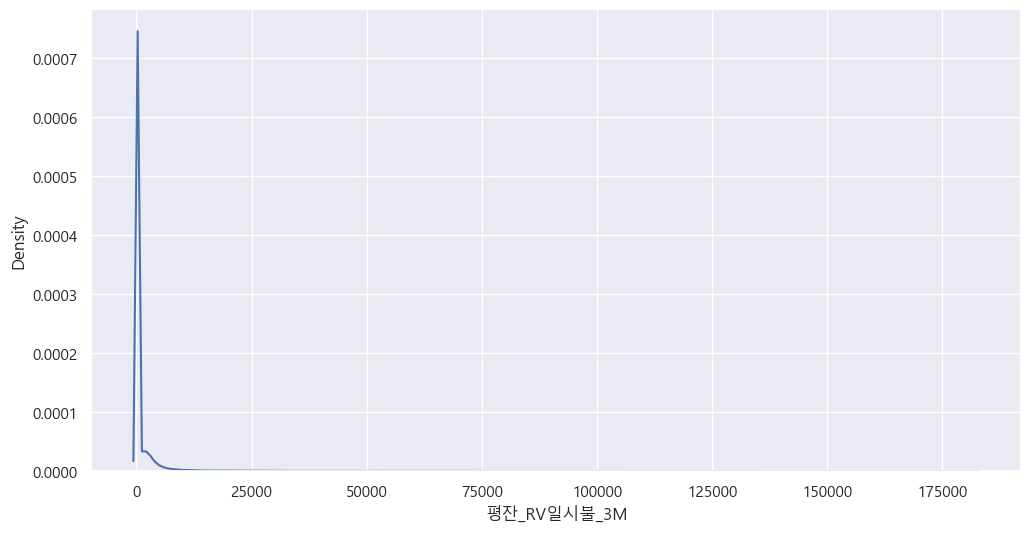

In [190]:
sns.kdeplot(x=df_temp['평잔_RV일시불_3M'])
plt.show()

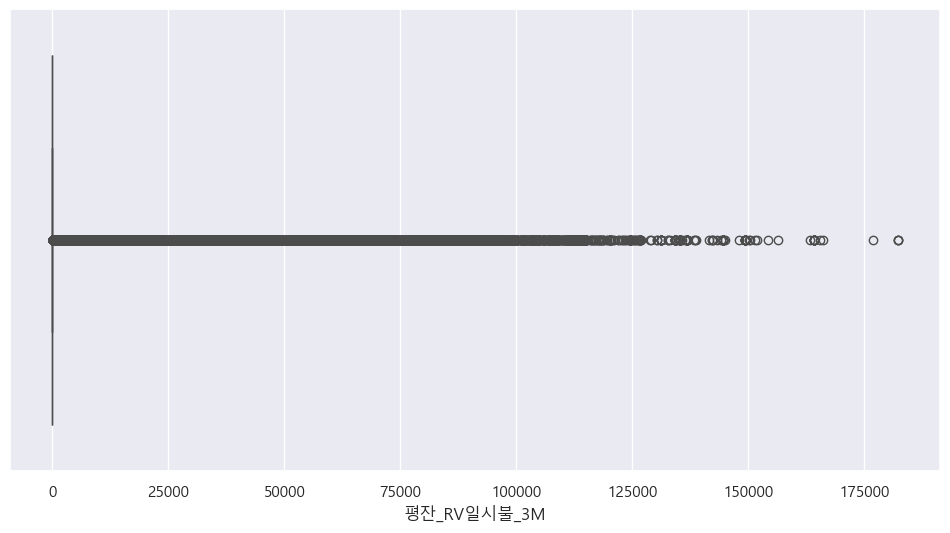

In [191]:
sns.boxplot(x=df_temp['평잔_RV일시불_3M'])
plt.show()

#### 평잔_RV일시불_해외_3M
 - 평균 잔액 리볼빙 일시불 해외 (최근3개월)

In [192]:
df_temp['평잔_RV일시불_해외_3M'].value_counts()

평잔_RV일시불_해외_3M
0      4677271
397       1289
399       1260
390       1202
395       1201
        ...   
897          1
224          1
873          1
796          1
833          1
Name: count, Length: 671, dtype: int64

In [193]:
df_temp['평잔_RV일시불_해외_3M'].describe()

count    4.800000e+06
mean     1.084777e+01
std      6.781196e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.450000e+03
Name: 평잔_RV일시불_해외_3M, dtype: float64

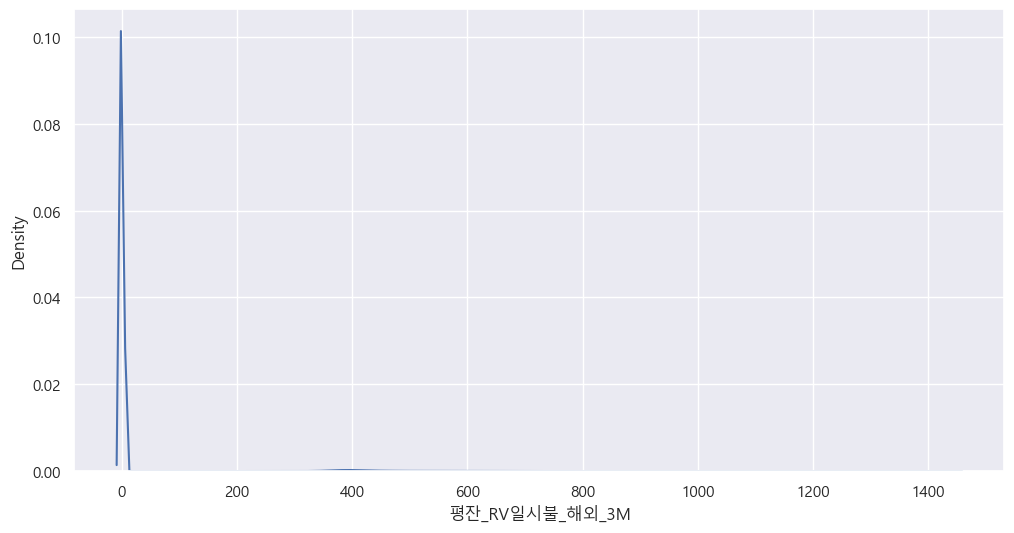

In [194]:
sns.kdeplot(x=df_temp['평잔_RV일시불_해외_3M'])
plt.show()

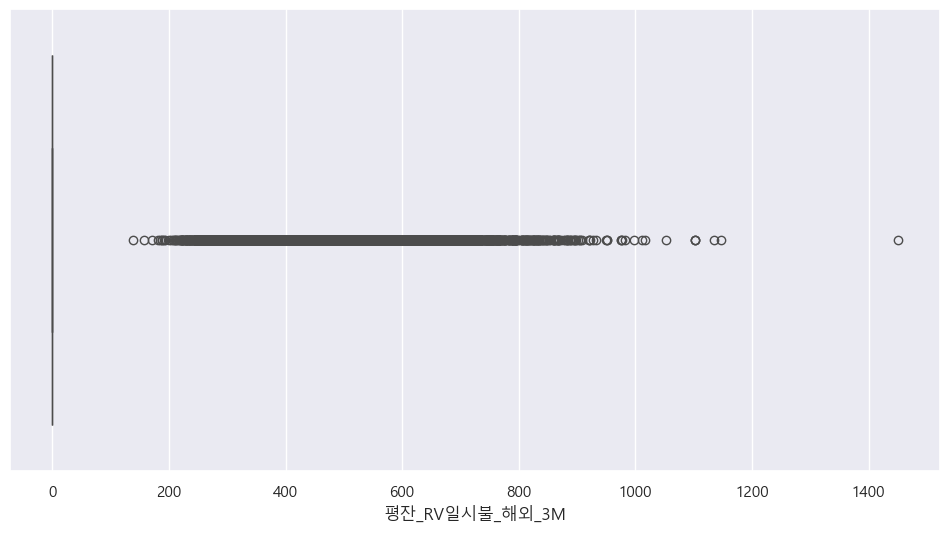

In [195]:
sns.boxplot(x=df_temp['평잔_RV일시불_해외_3M'])
plt.show()

#### 평잔_할부_3M
 - 평균 잔액 할부 (최근3개월)

In [196]:
df_temp['평잔_할부_3M'].value_counts()

평잔_할부_3M
0        2867139
425          854
372          814
386          807
624          790
          ...   
35829          1
41282          1
24060          1
53231          1
45648          1
Name: count, Length: 43495, dtype: int64

In [197]:
df_temp['평잔_할부_3M'].describe()

count    4.800000e+06
mean     2.437604e+03
std      7.315340e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.749000e+03
max      1.572740e+05
Name: 평잔_할부_3M, dtype: float64

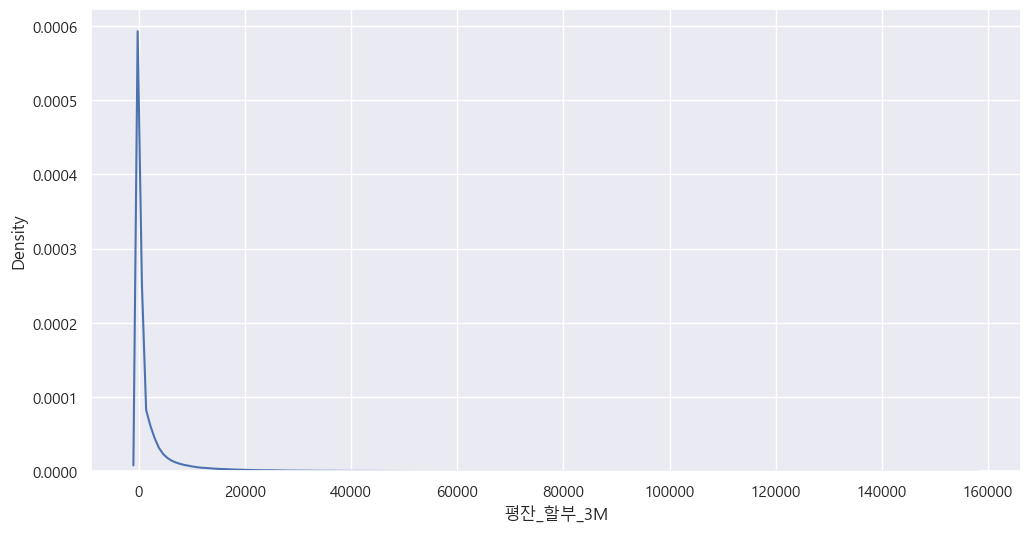

In [198]:
sns.kdeplot(x=df_temp['평잔_할부_3M'])
plt.show()

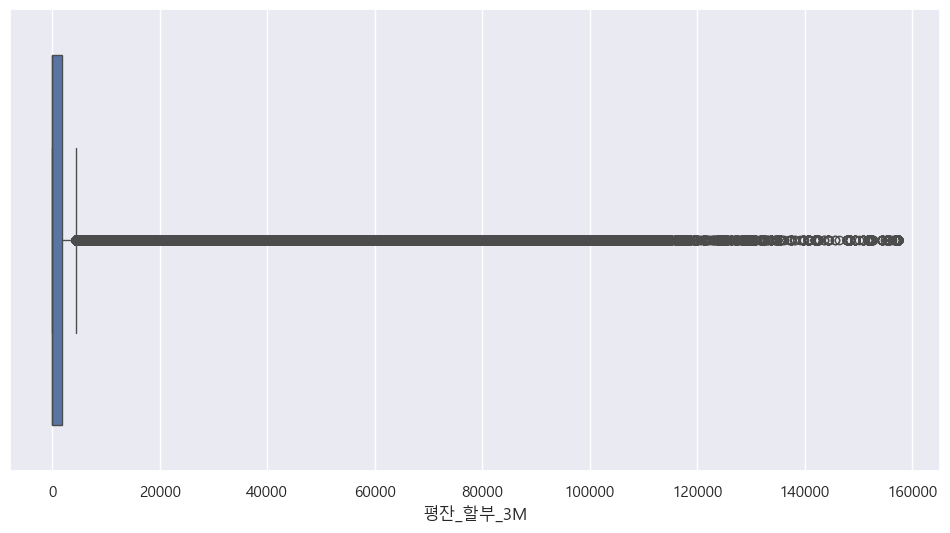

In [199]:
sns.boxplot(x=df_temp['평잔_할부_3M'])
plt.show()

#### 평잔_할부_해외_3M
 - 평균 잔액 할부 해외 (최근3개월)

In [200]:
df_temp['평잔_할부_해외_3M'].value_counts()

평잔_할부_해외_3M
0       4795991
4335         58
4401         56
4323         50
4324         49
         ...   
4814          1
4622          1
3997          1
4694          1
4558          1
Name: count, Length: 540, dtype: int64

In [201]:
df_temp['평잔_할부_해외_3M'].describe()

count    4.800000e+06
mean     3.632833e+00
std      1.256959e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.357000e+03
Name: 평잔_할부_해외_3M, dtype: float64

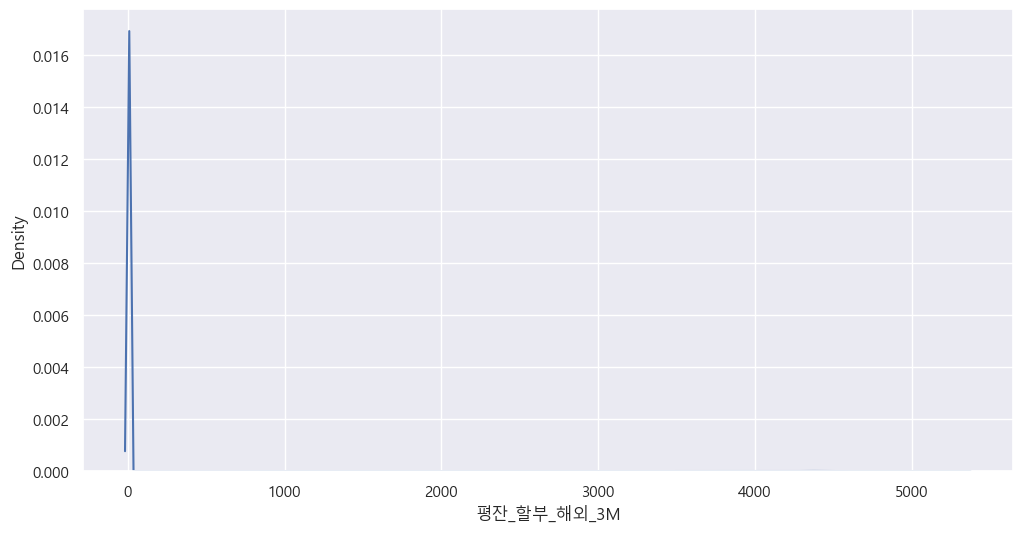

In [202]:
sns.kdeplot(x=df_temp['평잔_할부_해외_3M'])
plt.show()

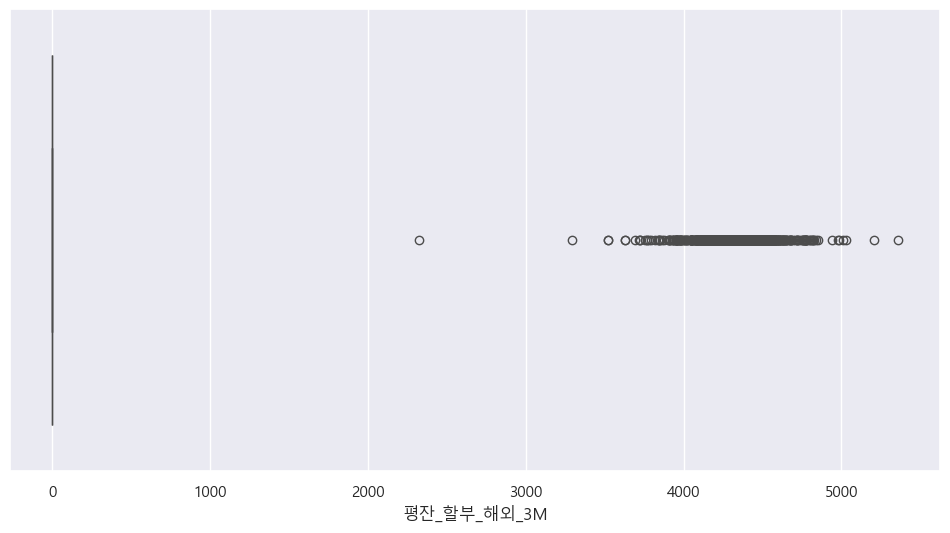

In [203]:
sns.boxplot(x=df_temp['평잔_할부_해외_3M'])
plt.show()

#### 평잔_CA_3M
 - 평균 잔액 현금서비스 (최근3개월)

In [204]:
df_temp['평잔_CA_3M'].value_counts()

평잔_CA_3M
0        4403888
1613         177
1137         173
1286         171
1168         169
          ...   
20264          1
17009          1
21643          1
68255          1
8664           1
Name: count, Length: 33678, dtype: int64

In [205]:
df_temp['평잔_CA_3M'].describe()

count    4.800000e+06
mean     8.344867e+02
std      4.919614e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.413040e+05
Name: 평잔_CA_3M, dtype: float64

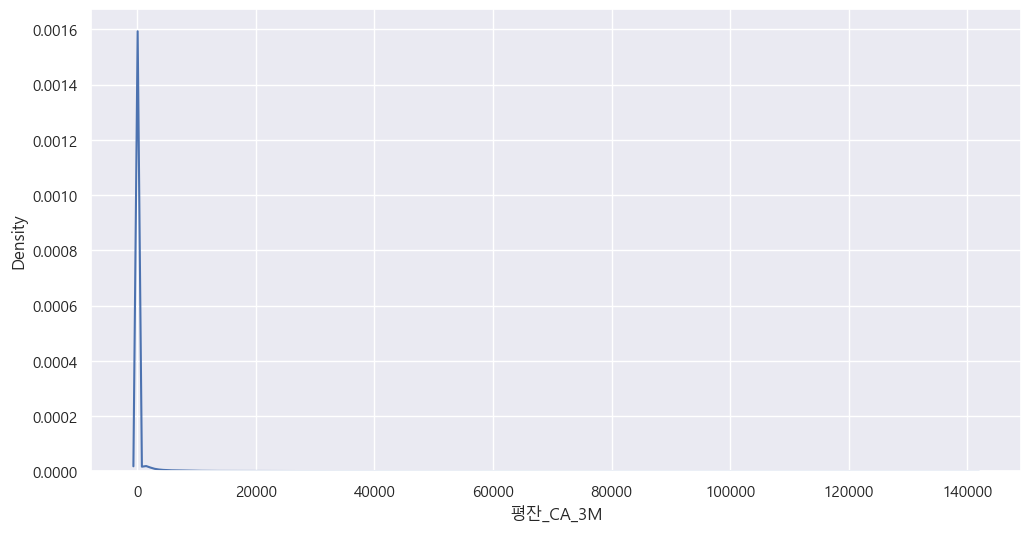

In [206]:
sns.kdeplot(x=df_temp['평잔_CA_3M'])
plt.show()

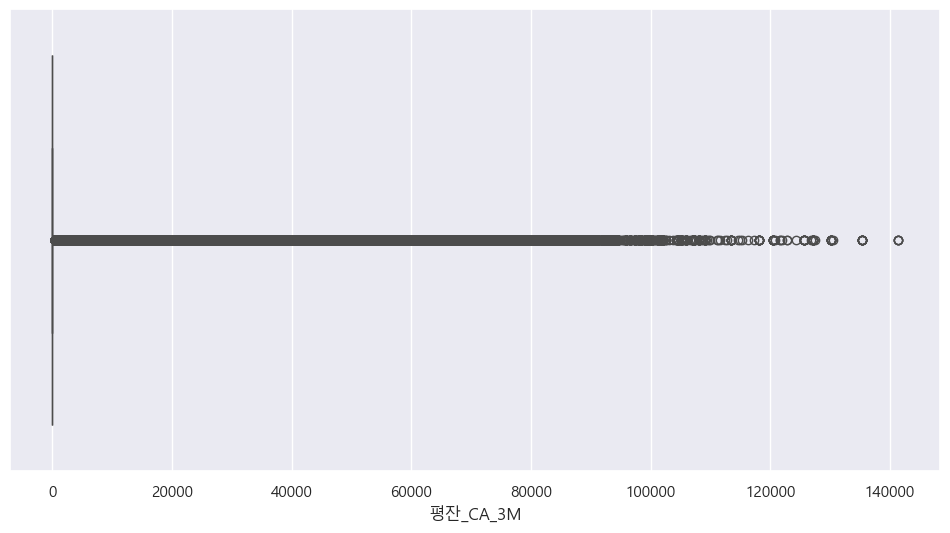

In [207]:
sns.boxplot(x=df_temp['평잔_CA_3M'])
plt.show()

#### 평잔_CA_해외_3M
 - 평균 잔액 현금서비스 해외 (최근3개월)

In [208]:
df_temp['평잔_CA_해외_3M'].value_counts()

평잔_CA_해외_3M
0       4799162
1805         46
1819         37
1775         37
1797         37
         ...   
1646          1
1844          1
1721          1
1487          1
1666          1
Name: count, Length: 98, dtype: int64

In [209]:
df_temp['평잔_CA_해외_3M'].describe()

count    4.800000e+06
mean     3.142742e-01
std      2.378751e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.986000e+03
Name: 평잔_CA_해외_3M, dtype: float64

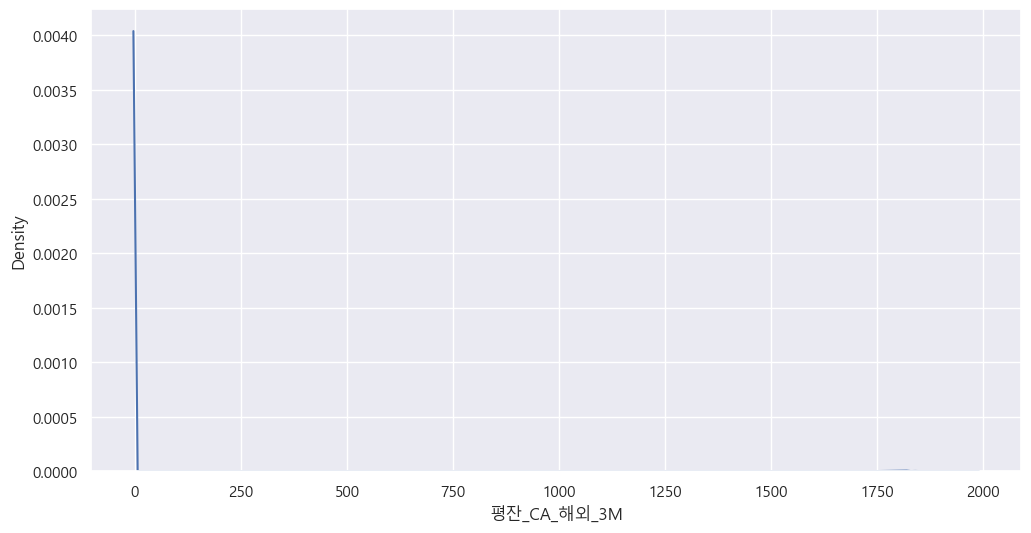

In [210]:
sns.kdeplot(x=df_temp['평잔_CA_해외_3M'])
plt.show()

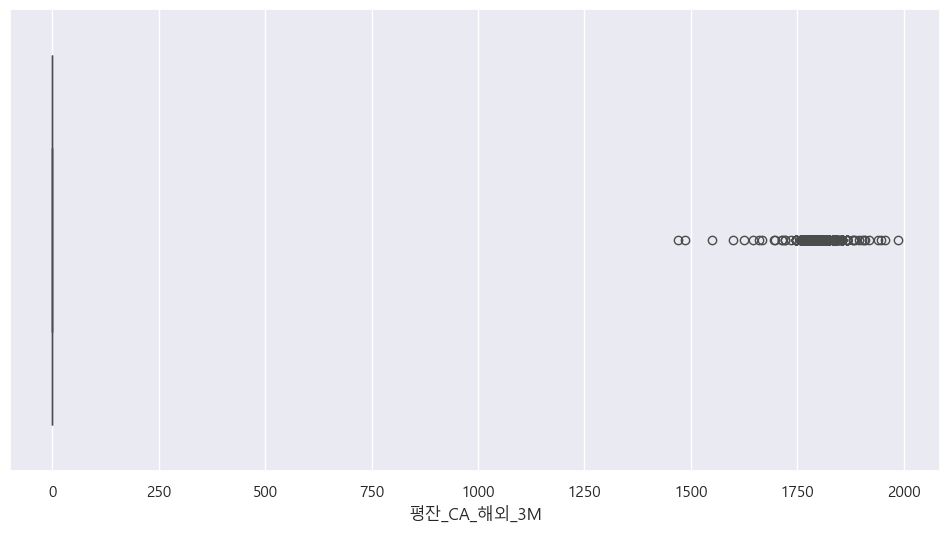

In [211]:
sns.boxplot(x=df_temp['평잔_CA_해외_3M'])
plt.show()

#### 평잔_카드론_3M
 - 평균 잔액 카드론 (최근3개월)

In [212]:
df_temp['평잔_카드론_3M'].value_counts()

평잔_카드론_3M
0         4467143
230000        791
7143           55
13996          50
31835          49
           ...   
104178          1
44793           1
49899           1
2683            1
95587           1
Name: count, Length: 61605, dtype: int64

In [213]:
df_temp['평잔_카드론_3M'].describe()

count    4.800000e+06
mean     2.852419e+03
std      1.422781e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.300000e+05
Name: 평잔_카드론_3M, dtype: float64

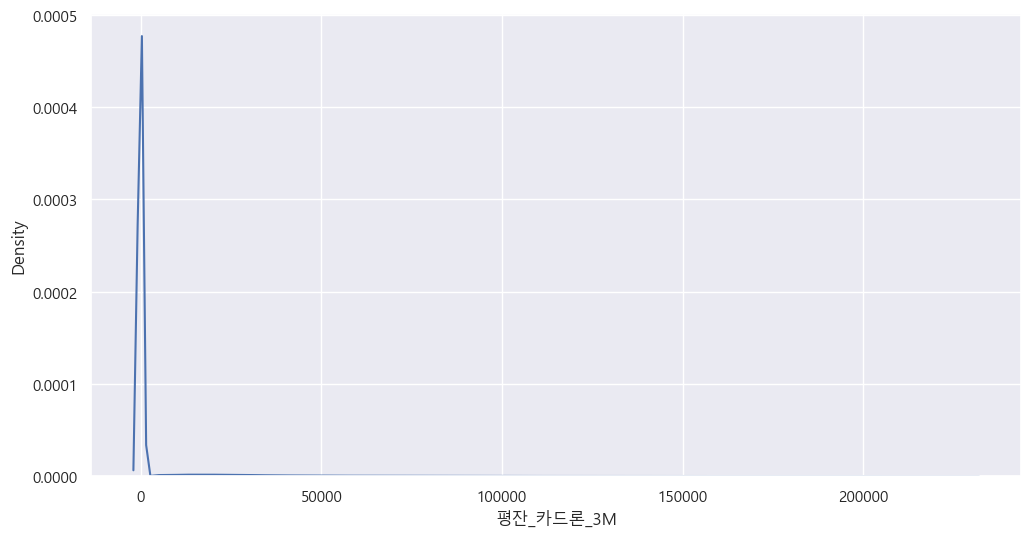

In [214]:
sns.kdeplot(x=df_temp['평잔_카드론_3M'])
plt.show()

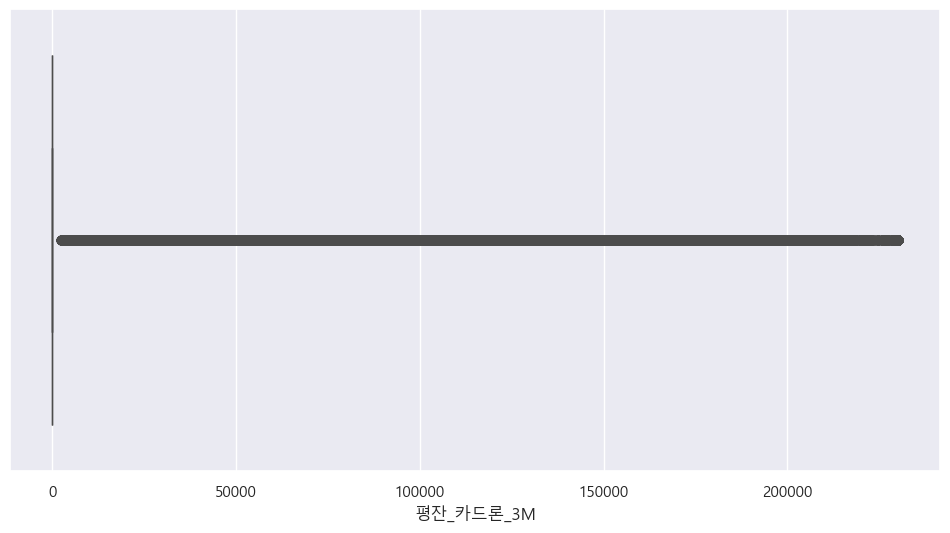

In [215]:
sns.boxplot(x=df_temp['평잔_카드론_3M'])
plt.show()

#### 평잔_6M
 - 평균 잔액 (최근6개월)

In [216]:
df_temp['평잔_6M'].value_counts()

평잔_6M
0         684446
299154      9223
9           6403
10          5850
8           5843
           ...  
130450         1
223760         1
198160         1
118595         1
165296         1
Name: count, Length: 103634, dtype: int64

In [217]:
df_temp['평잔_6M'].describe()

count    4.800000e+06
mean     1.151879e+04
std      2.854753e+04
min      0.000000e+00
25%      2.910000e+02
50%      3.437000e+03
75%      1.001700e+04
max      2.991540e+05
Name: 평잔_6M, dtype: float64

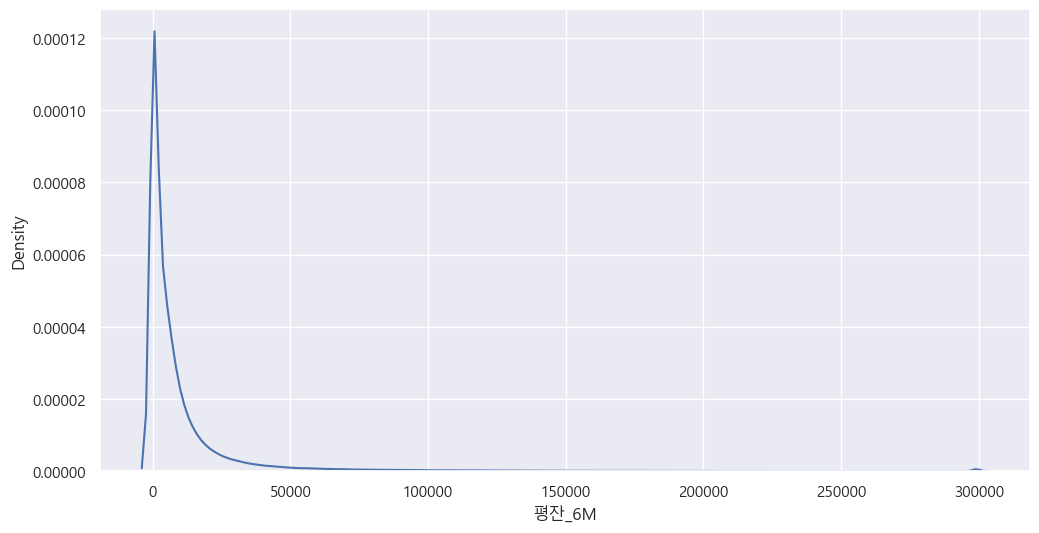

In [218]:
sns.kdeplot(x=df_temp['평잔_6M'])
plt.show()

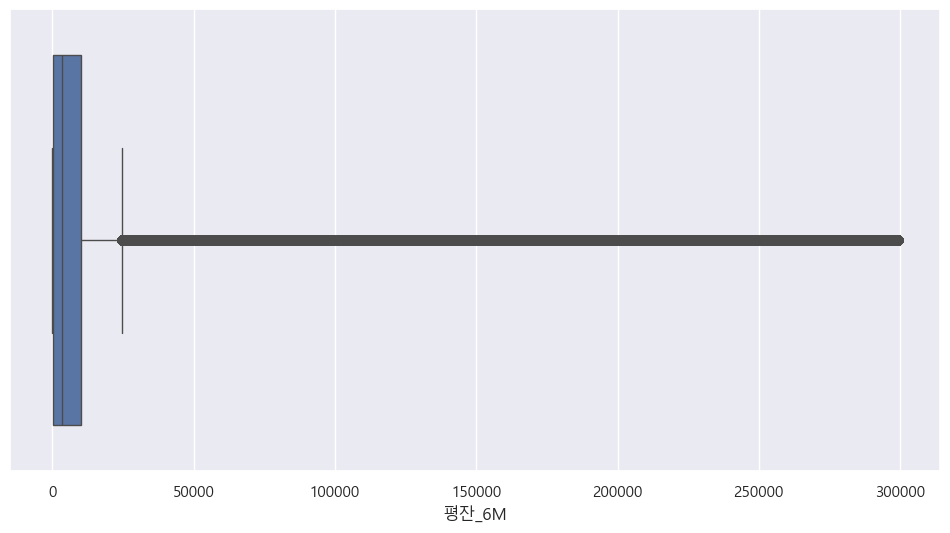

In [219]:
sns.boxplot(x=df_temp['평잔_6M'])
plt.show()

#### 평잔_일시불_6M
 - 평균 잔액 일시불 (최근6개월)

In [220]:
df_temp['평잔_일시불_6M'].value_counts()

평잔_일시불_6M
0        792037
6          9318
7          8668
5          7951
8          7405
          ...  
42987         1
26557         1
37385         1
37269         1
36128         1
Name: count, Length: 44118, dtype: int64

In [221]:
df_temp['평잔_일시불_6M'].describe()

count    4.800000e+06
mean     3.927217e+03
std      6.717585e+03
min      0.000000e+00
25%      1.370000e+02
50%      1.641000e+03
75%      4.788000e+03
max      1.768610e+05
Name: 평잔_일시불_6M, dtype: float64

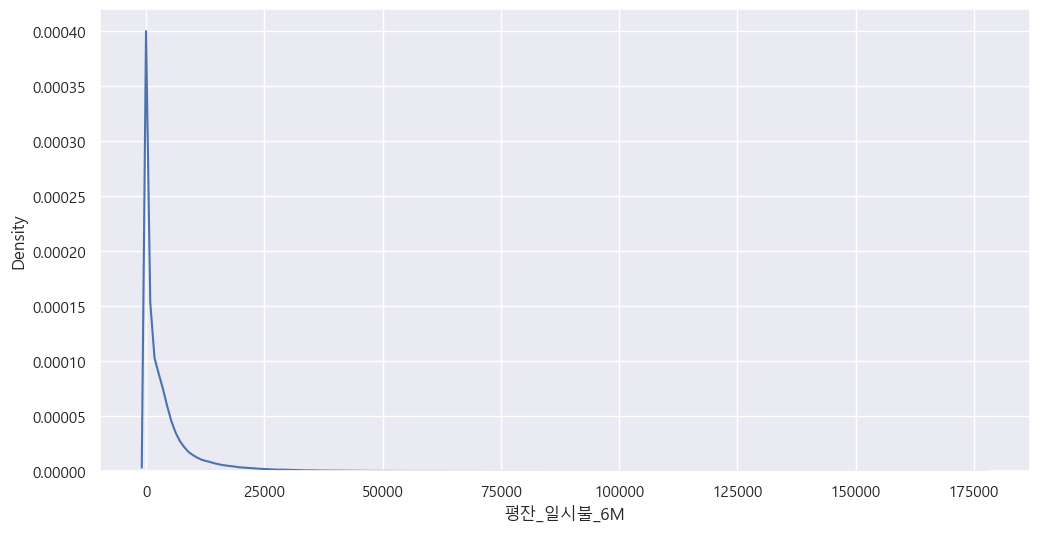

In [222]:
sns.kdeplot(x=df_temp['평잔_일시불_6M'])
plt.show()

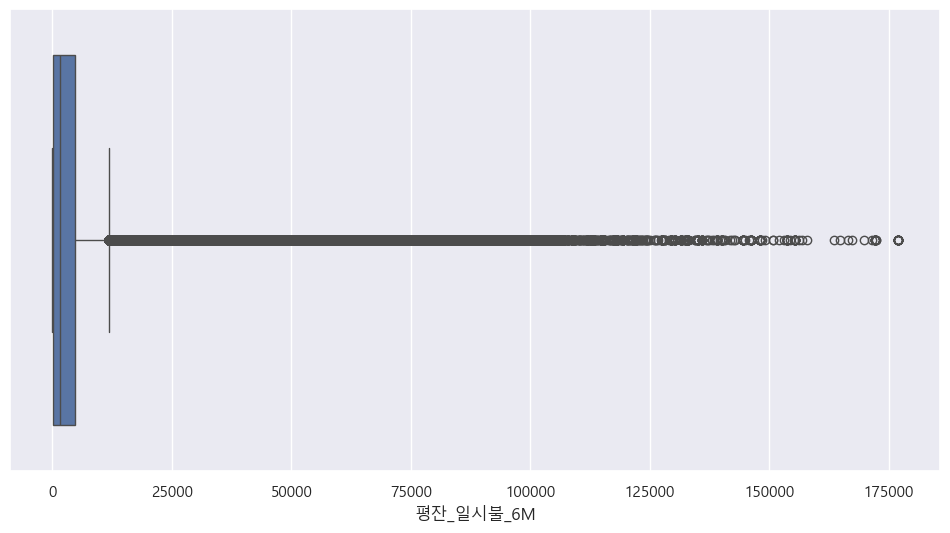

In [223]:
sns.boxplot(x=df_temp['평잔_일시불_6M'])
plt.show()

#### 평잔_일시불_해외_6M
 - 평균 잔액 일시불 해외 (최근6개월)

In [224]:
df_temp['평잔_일시불_해외_6M'].value_counts()

평잔_일시불_해외_6M
0       4183680
269        2668
254        2585
276        2561
264        2557
         ...   
1969          1
1393          1
2234          1
1594          1
1356          1
Name: count, Length: 1609, dtype: int64

In [225]:
df_temp['평잔_일시불_해외_6M'].describe()

count    4.800000e+06
mean     4.689500e+01
std      1.397050e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.843000e+03
Name: 평잔_일시불_해외_6M, dtype: float64

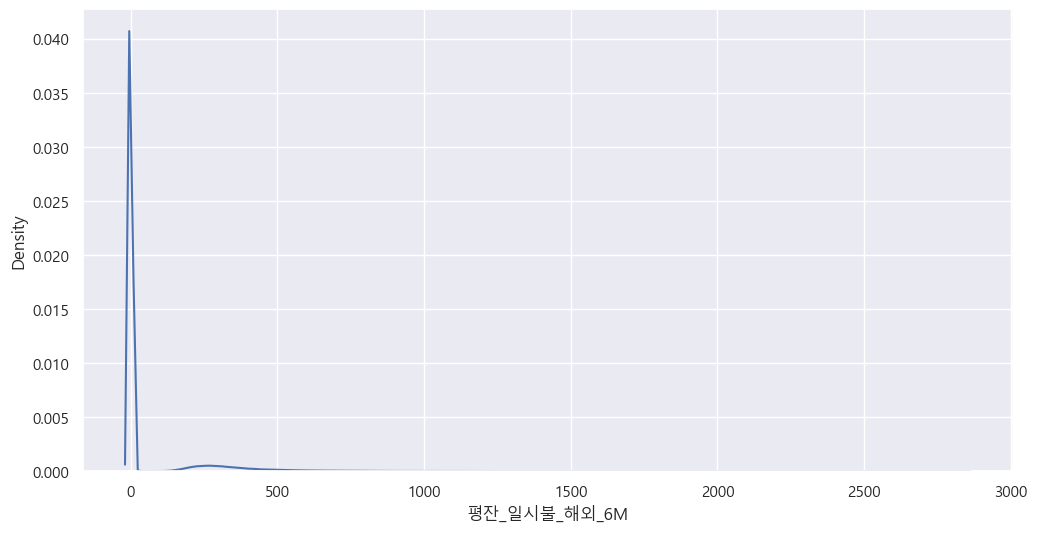

In [226]:
sns.kdeplot(x=df_temp['평잔_일시불_해외_6M'])
plt.show()

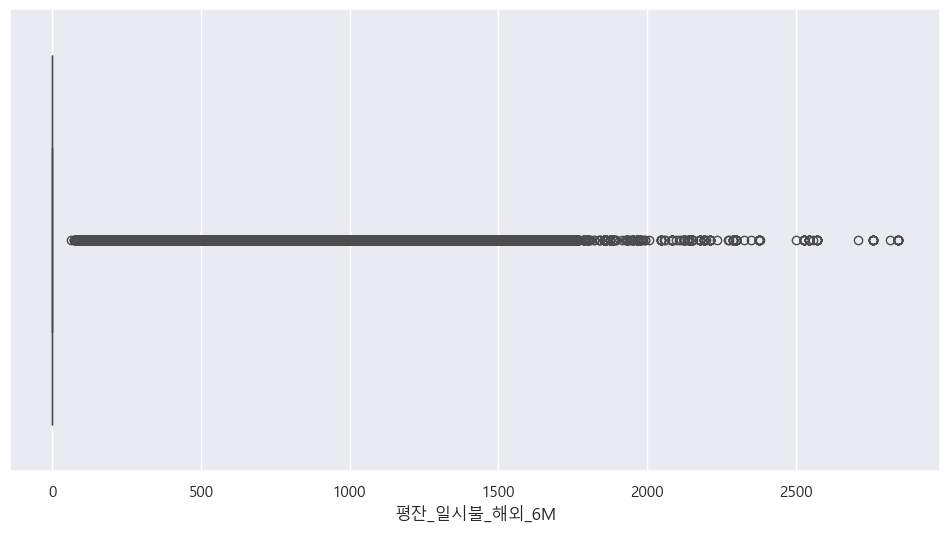

In [227]:
sns.boxplot(x=df_temp['평잔_일시불_해외_6M'])
plt.show()

#### 평잔_RV일시불_6M
 - 평균 잔액 리볼빙 일시불 (최근6개월)

In [228]:
df_temp['평잔_RV일시불_6M'].value_counts()

평잔_RV일시불_6M
0        3980324
357          302
794          293
468          289
800          289
          ...   
48655          1
49242          1
31744          1
20036          1
10559          1
Name: count, Length: 32693, dtype: int64

In [229]:
df_temp['평잔_RV일시불_6M'].describe()

count    4.800000e+06
mean     1.000131e+03
std      4.769145e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.768610e+05
Name: 평잔_RV일시불_6M, dtype: float64

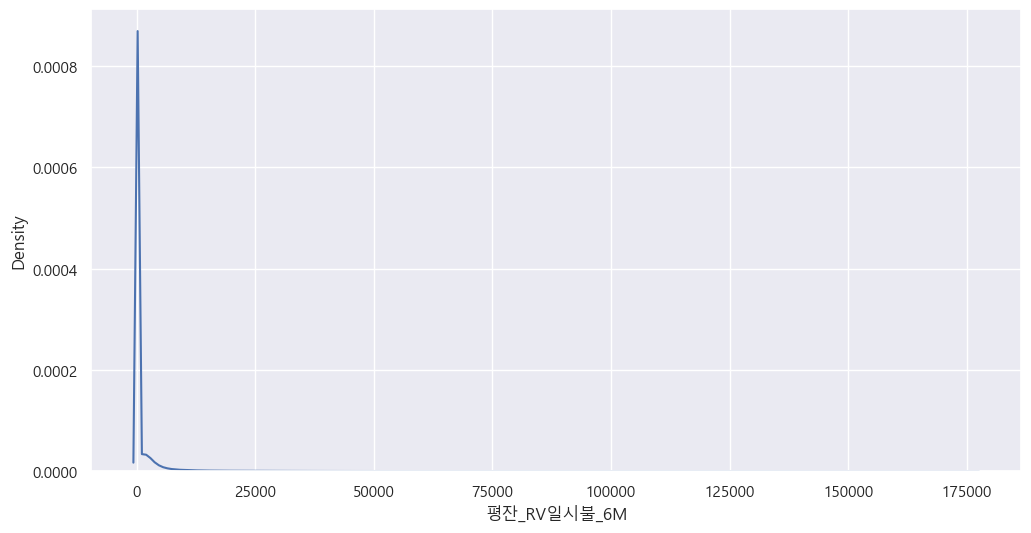

In [230]:
sns.kdeplot(x=df_temp['평잔_RV일시불_6M'])
plt.show()

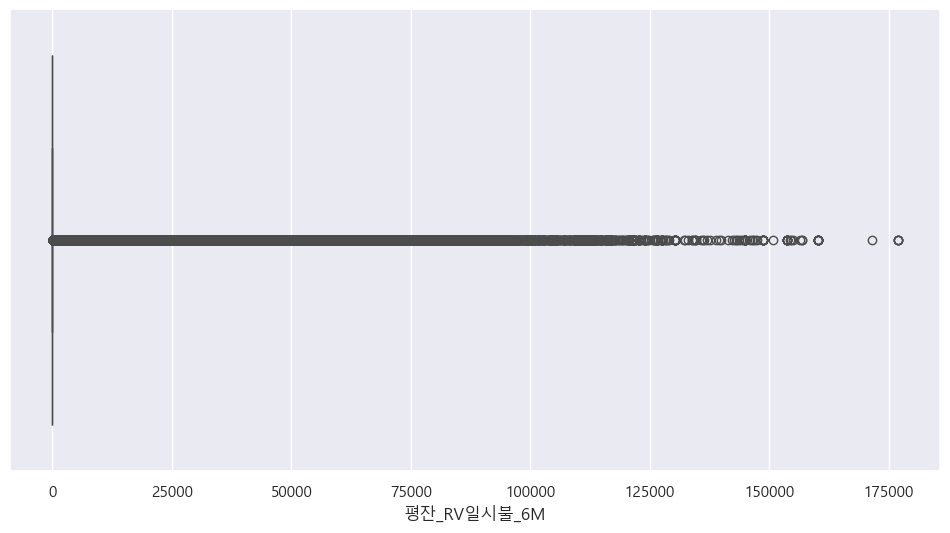

In [231]:
sns.boxplot(x=df_temp['평잔_RV일시불_6M'])
plt.show()

#### 평잔_RV일시불_해외_6M
 - 평균 잔액 리볼빙 일시불 해외 (최근6개월)

In [232]:
df_temp['평잔_RV일시불_해외_6M'].value_counts()

평잔_RV일시불_해외_6M
0      4663109
349       1121
341       1117
347       1100
345       1092
        ...   
177          1
695          1
743          1
725          1
821          1
Name: count, Length: 567, dtype: int64

In [233]:
df_temp['평잔_RV일시불_해외_6M'].describe()

count    4.800000e+06
mean     1.041626e+01
std      6.196373e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.600000e+02
Name: 평잔_RV일시불_해외_6M, dtype: float64

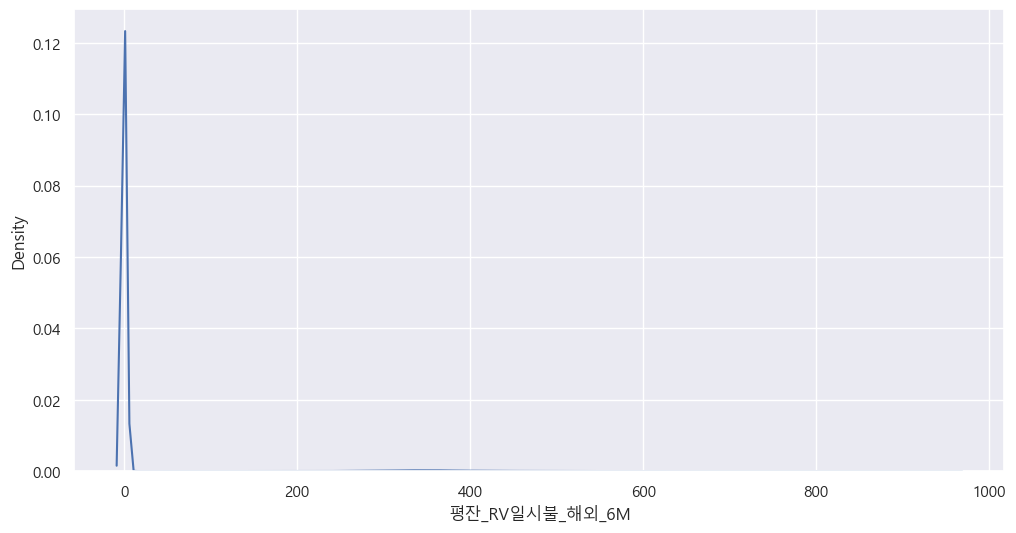

In [234]:
sns.kdeplot(x=df_temp['평잔_RV일시불_해외_6M'])
plt.show()

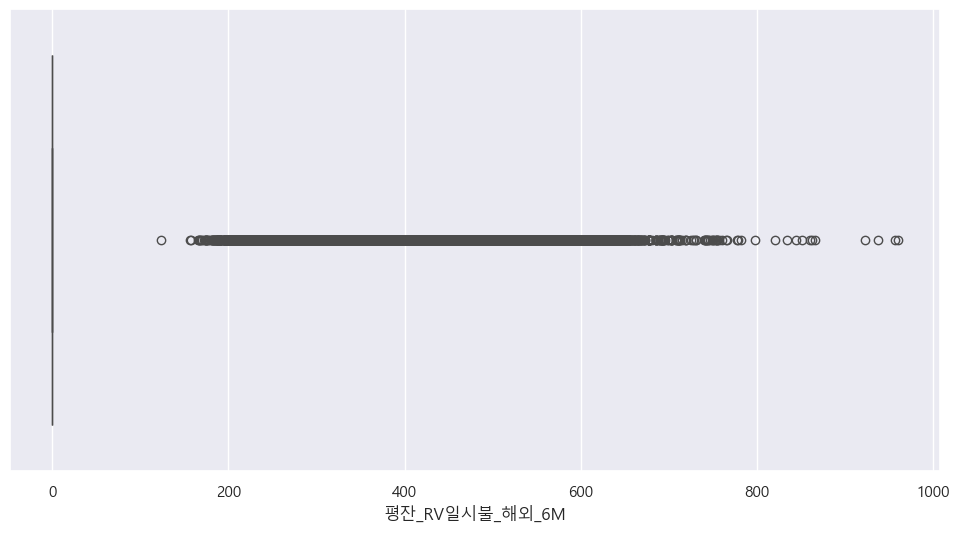

In [235]:
sns.boxplot(x=df_temp['평잔_RV일시불_해외_6M'])
plt.show()

#### 평잔_할부_6M
 - 평균 잔액 할부 (최근6개월)

In [236]:
df_temp['평잔_할부_6M'].value_counts()

평잔_할부_6M
0         2618911
302          1175
266          1108
339          1091
384          1075
           ...   
27415           1
20907           1
61340           1
103299          1
48659           1
Name: count, Length: 46128, dtype: int64

In [237]:
df_temp['평잔_할부_6M'].describe()

count    4.800000e+06
mean     2.626210e+03
std      7.609742e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.996000e+03
max      1.409010e+05
Name: 평잔_할부_6M, dtype: float64

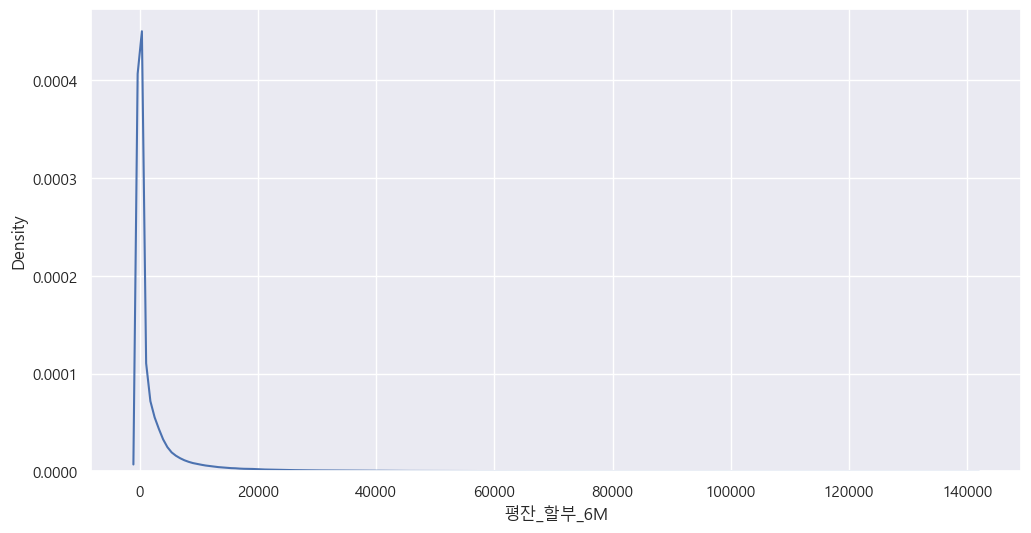

In [238]:
sns.kdeplot(x=df_temp['평잔_할부_6M'])
plt.show()

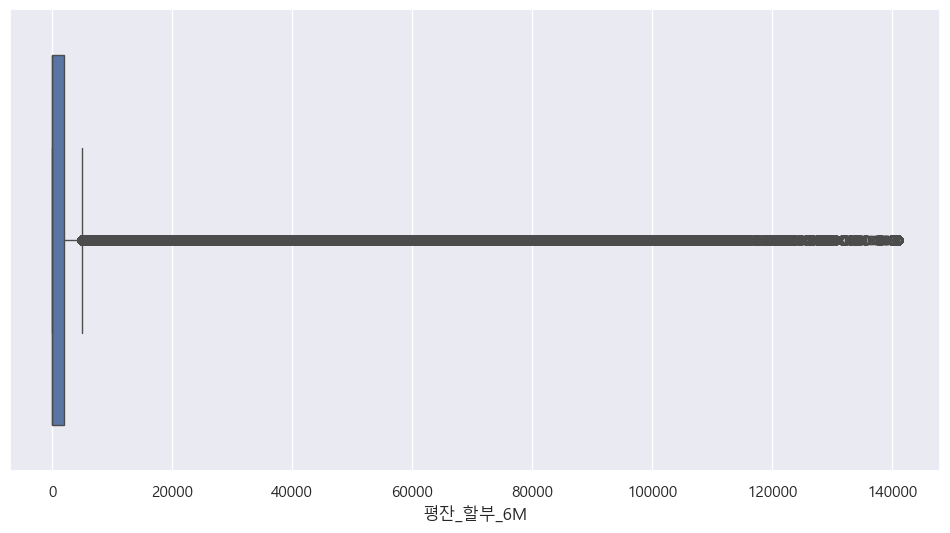

In [239]:
sns.boxplot(x=df_temp['평잔_할부_6M'])
plt.show()

#### 평잔_할부_해외_6M
 - 평균 잔액 할부 해외 (최근6개월)

In [240]:
df_temp['평잔_할부_해외_6M'].value_counts()

평잔_할부_해외_6M
0       4794825
1273         89
1274         85
1268         84
1246         80
         ...   
957           1
973           1
1581          1
1706          1
1495          1
Name: count, Length: 500, dtype: int64

In [241]:
df_temp['평잔_할부_해외_6M'].describe()

count    4.800000e+06
mean     1.368379e+00
std      4.173615e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.518000e+03
Name: 평잔_할부_해외_6M, dtype: float64

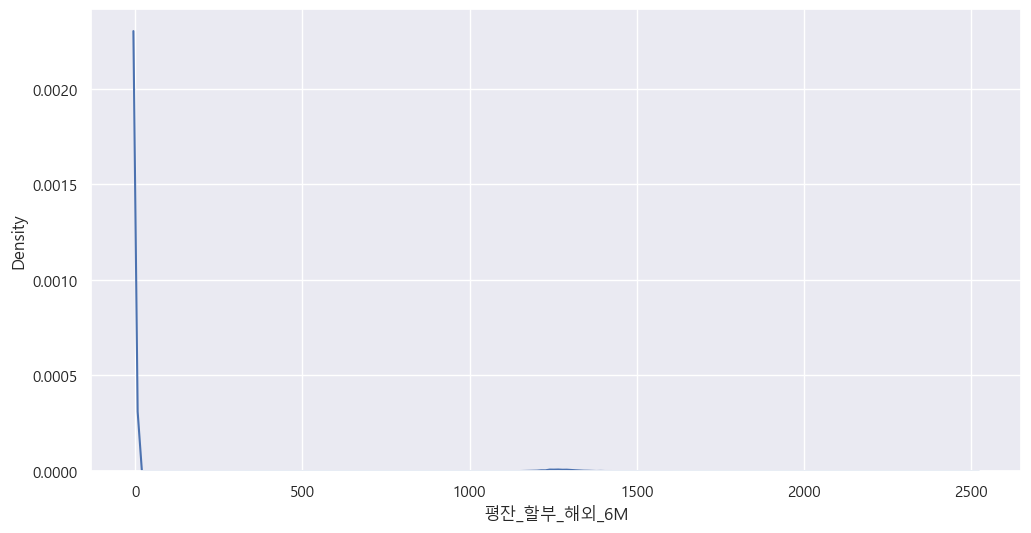

In [242]:
sns.kdeplot(x=df_temp['평잔_할부_해외_6M'])
plt.show()

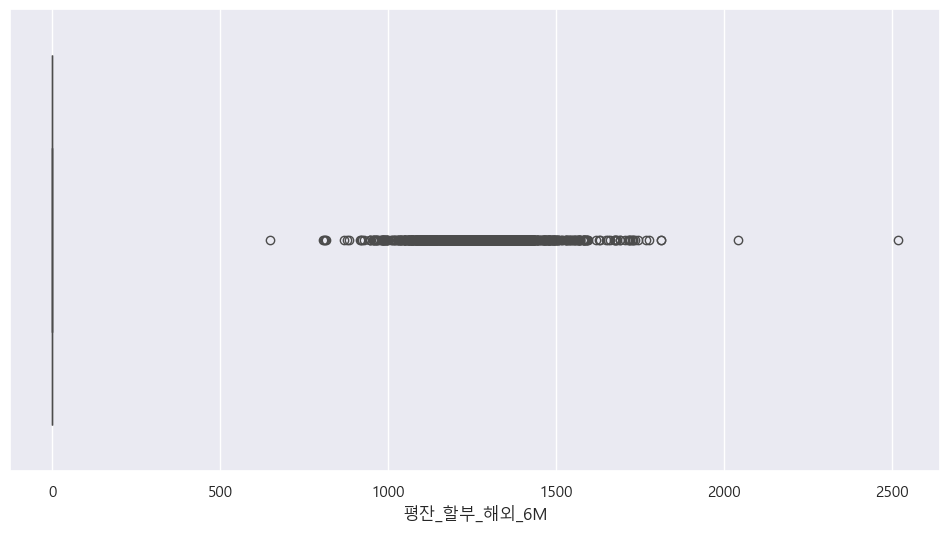

In [243]:
sns.boxplot(x=df_temp['평잔_할부_해외_6M'])
plt.show()

#### 평잔_CA_6M
 - 평균 잔액 현금서비스 (최근6개월)

In [244]:
df_temp['평잔_CA_6M'].value_counts()

평잔_CA_6M
0        4315647
540          331
684          319
597          319
606          314
          ...   
19378          1
55146          1
34322          1
39371          1
79249          1
Name: count, Length: 34951, dtype: int64

In [245]:
df_temp['평잔_CA_6M'].describe()

count    4.800000e+06
mean     8.453677e+02
std      4.876393e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.404780e+05
Name: 평잔_CA_6M, dtype: float64

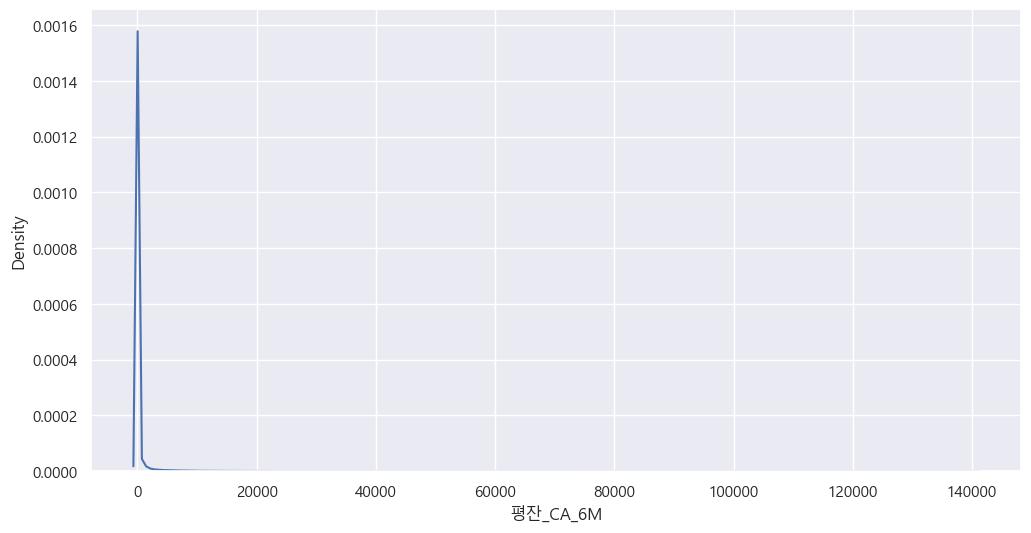

In [246]:
sns.kdeplot(x=df_temp['평잔_CA_6M'])
plt.show()

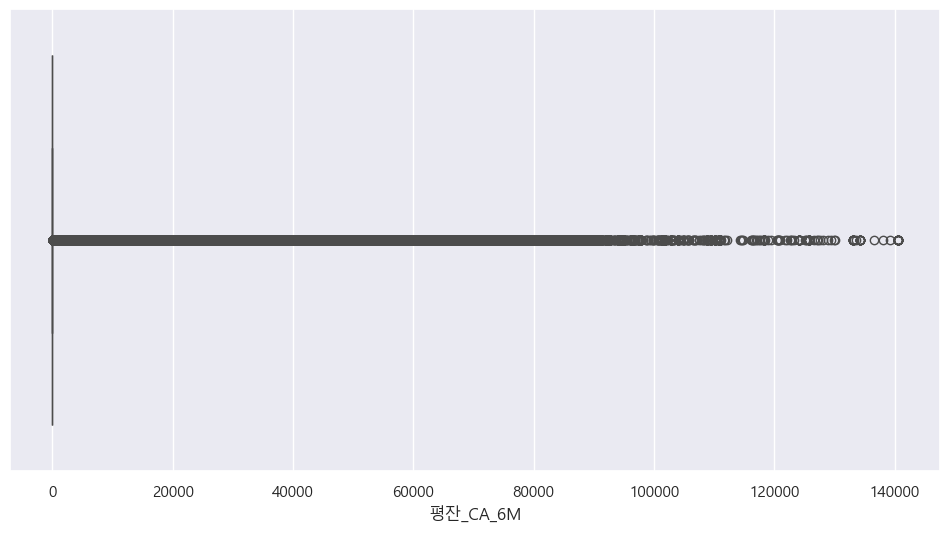

In [247]:
sns.boxplot(x=df_temp['평잔_CA_6M'])
plt.show()

#### 평잔_CA_해외_6M
 - 평균 잔액 현금서비스 해외 (최근6개월)

In [248]:
df_temp['평잔_CA_해외_6M'].value_counts()

평잔_CA_해외_6M
0       4798191
1200         68
1220         63
1208         59
1228         55
         ...   
1120          1
1088          1
1267          1
1150          1
1362          1
Name: count, Length: 162, dtype: int64

In [249]:
df_temp['평잔_CA_해외_6M'].describe()

count    4.800000e+06
mean     4.564419e-01
std      2.351427e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.372000e+03
Name: 평잔_CA_해외_6M, dtype: float64

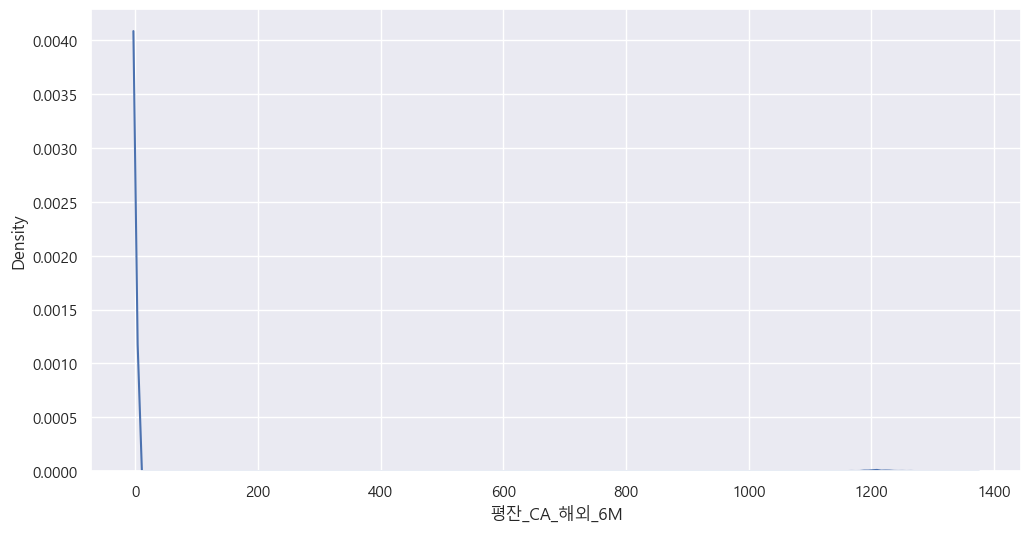

In [250]:
sns.kdeplot(x=df_temp['평잔_CA_해외_6M'])
plt.show()

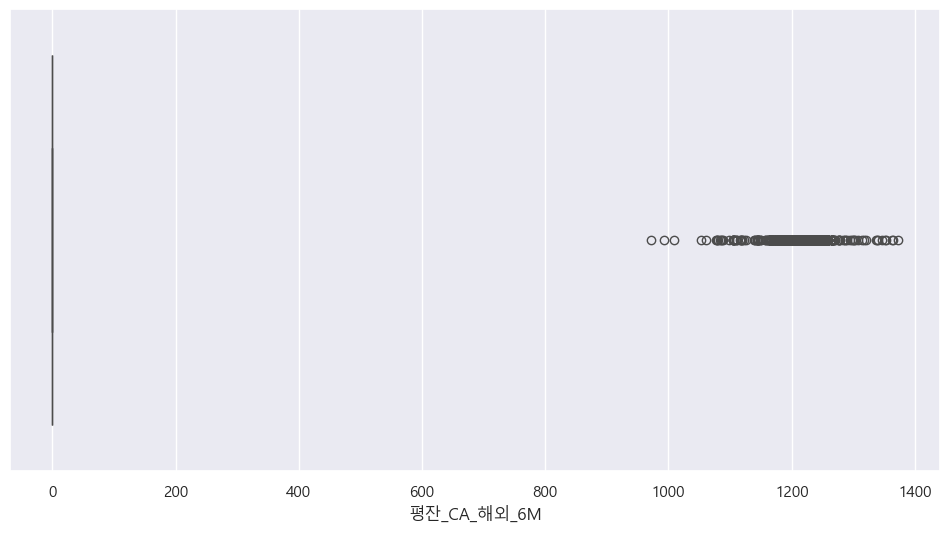

In [251]:
sns.boxplot(x=df_temp['평잔_CA_해외_6M'])
plt.show()

#### 평잔_카드론_6M
 - 평균 잔액 카드론 (최근6개월)

In [252]:
df_temp['평잔_카드론_6M'].value_counts()

평잔_카드론_6M
0         4425936
225000        934
4435           56
11036          55
15785          54
           ...   
102730          1
58665           1
128496          1
57057           1
98858           1
Name: count, Length: 65381, dtype: int64

In [253]:
df_temp['평잔_카드론_6M'].describe()

count    4.800000e+06
mean     3.003833e+03
std      1.465018e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.250000e+05
Name: 평잔_카드론_6M, dtype: float64

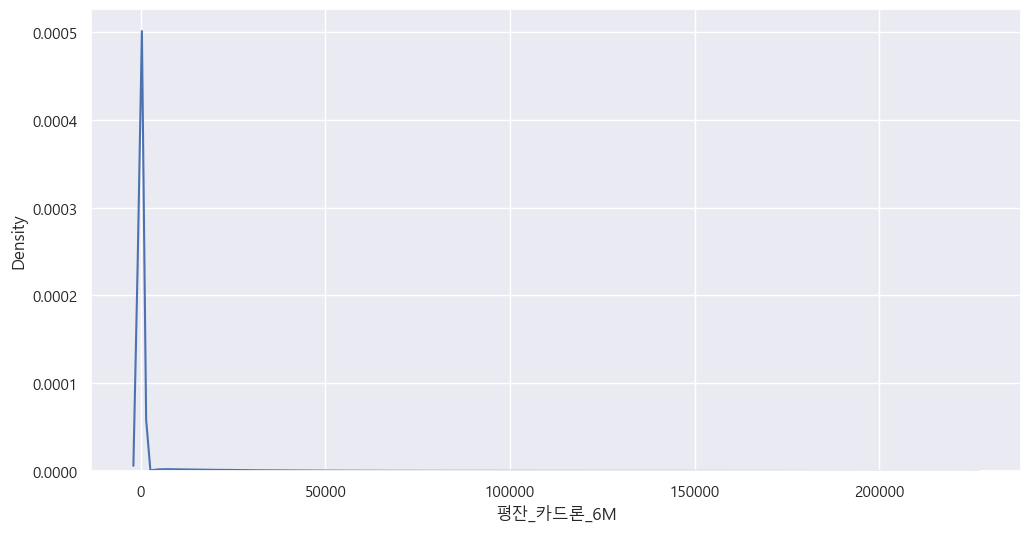

In [254]:
sns.kdeplot(x=df_temp['평잔_카드론_6M'])
plt.show()

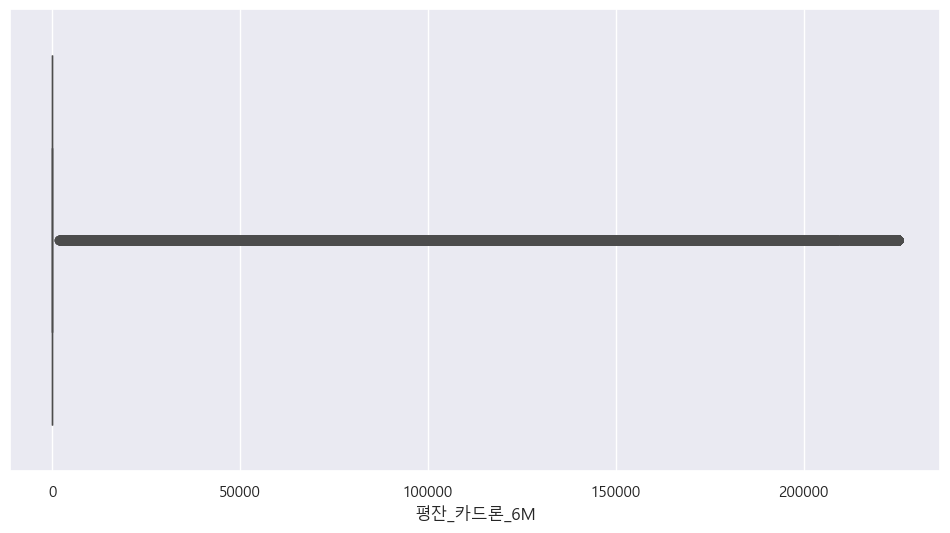

In [255]:
sns.boxplot(x=df_temp['평잔_카드론_6M'])
plt.show()

### 2d

#### 연체일수_최근 X 연체 원금_최근

In [275]:
df_temp[['연체일수_최근','연체원금_최근']]

,연체일수_최근,연체원금_최근
0,-999999,0
1,-999999,0
2,-999999,0
3,-999999,0
4,-999999,0
...,...,...
4799995,-999999,0
4799996,-999999,0
4799997,-999999,0
4799998,-999999,0


In [284]:
df_temp.groupby('연체원금_최근').count()

,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,월중평잔_CA_B0M,연체잔액_B0M,...,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M,Segment
연체원금_최근,,,,,,,,,,,,,,,,,,,,,
0,4780488,4780488,4780488,4780488,4780488,4780488,4780488,4780488,4780488,4780488,...,4780488,4780488,4780488,4780488,4780488,4780488,4780488,4780488,4780488,4780488
942,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1250,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1269,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1447,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14574,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
14813,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
15225,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [294]:
df_temp[df_temp['연체일수_최근']==-999999].groupby('연체원금_최근').count()

,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,월중평잔_CA_B0M,연체잔액_B0M,...,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M,Segment
연체원금_최근,,,,,,,,,,,,,,,,,,,,,
0,4765912,4765912,4765912,4765912,4765912,4765912,4765912,4765912,4765912,4765912,...,4765912,4765912,4765912,4765912,4765912,4765912,4765912,4765912,4765912,4765912
942,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1250,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1269,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1447,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6647,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6754,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [309]:
display(df_temp[(df_temp['연체일수_최근']==-999999) & (df_temp['연체원금_최근']!=0)][['연체일수_최근','연체원금_최근']].value_counts())

연체일수_최근  연체원금_최근
-999999  2620       18
         3006       18
         3112       18
         3394       18
         3043       12
                    ..
         6641        1
         6647        1
         6754        1
         7207        1
         4543        1
Name: count, Length: 651, dtype: int64

In [327]:
df_temp[(df_temp['연체일수_최근']==-999999) & (df_temp['연체원금_최근']==0)]['Segment'].value_counts()

Segment
4    3815361
3     694374
2     253945
0       1944
1        288
Name: count, dtype: int64

In [330]:
df_temp[(df_temp['연체일수_최근']==-999999) & (df_temp['연체원금_최근']!=0)]['Segment'].value_counts()

Segment
4    1830
3     233
2     111
Name: count, dtype: int64

In [333]:
df_temp[(df_temp['연체일수_최근']==0) & (df_temp['연체원금_최근']!=0)]['Segment'].value_counts()

Segment
4    7613
3    1918
2     667
Name: count, dtype: int64

In [335]:
df_temp[(df_temp['연체일수_최근']==1) & (df_temp['연체원금_최근']!=0)]['Segment'].value_counts()

Segment
4    5127
3    1647
2     366
Name: count, dtype: int64

In [337]:
df_temp[(df_temp['연체일수_최근']==0) & (df_temp['연체원금_최근']==0)]['Segment'].value_counts()

Segment
4    14141
3      297
2       86
Name: count, dtype: int64

In [336]:
df_temp[(df_temp['연체일수_최근']==1) & (df_temp['연체원금_최근']==0)]['Segment'].value_counts()

Segment
4    32
3    15
2     5
Name: count, dtype: int64

In [338]:
df_temp[(df_temp['연체일수_최근']>1) & (df_temp['연체원금_최근']==0)]['Segment'].value_counts()

Series([], Name: count, dtype: int64)

In [324]:
df_temp_not_999999=df_temp[df_temp['연체일수_최근']!=-999999]

<Axes: xlabel='연체일수_최근', ylabel='Count'>

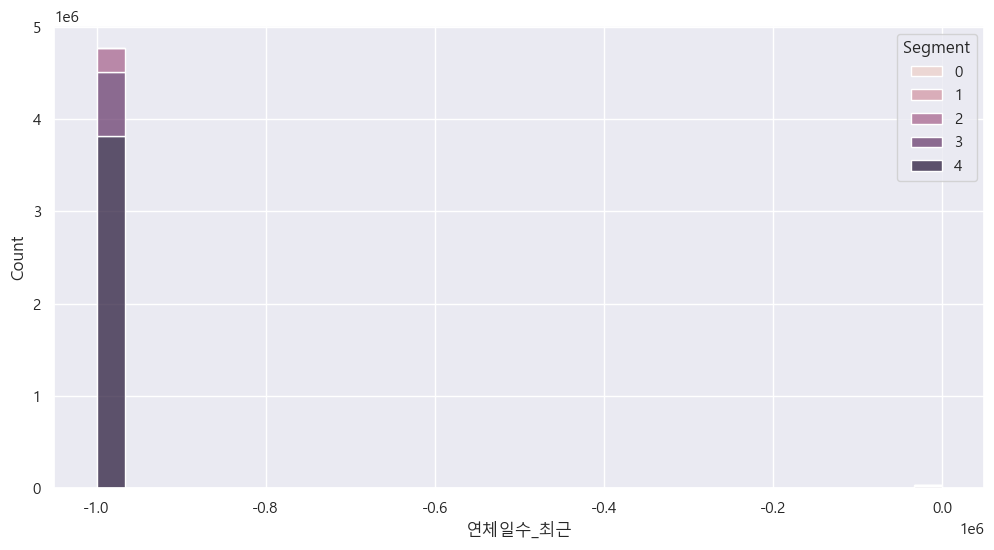

In [329]:
sns.histplot(data=df_temp, x='연체일수_최근', hue='Segment', bins=30, multiple='stack')

<Axes: xlabel='연체일수_최근', ylabel='Count'>

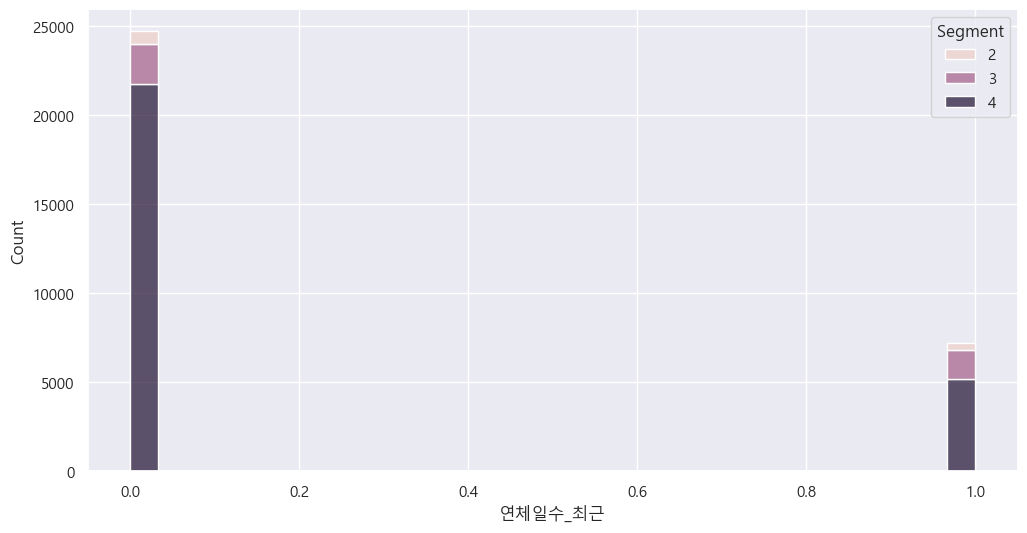

In [325]:
sns.histplot(data=df_temp_not_999999, x='연체일수_최근', hue='Segment', bins=30, multiple='stack')

#### Segment X 매각잔액_B1M

In [342]:
temp=df[['Segment','매각잔액_B1M']]
temp

,Segment,매각잔액_B1M
0,3,0
1,3,0
2,3,0
3,4,0
4,4,0
...,...,...
4799995,4,0
4799996,4,0
4799997,4,0
4799998,4,0


In [ ]:
temp['Segment']=encoder.inverse_transform(temp['Segment'])

In [347]:
temp.groupby('Segment').max()

,매각잔액_B1M
Segment,
A,0
B,0
C,0
D,0
E,46708


In [345]:
temp.nlargest(50,'매각잔액_B1M')

,Segment,매각잔액_B1M
1022700,4,46708
1022701,4,46708
1022702,4,46708
3422700,4,46708
3422701,4,46708
3422702,4,46708
4622700,4,46708
4622701,4,46708
4622702,4,46708
0,3,0


#### Segment X 연체잔액_B0M

In [348]:
temp=df[['Segment','연체잔액_B0M']]
temp

,Segment,연체잔액_B0M
0,3,0
1,3,0
2,3,0
3,4,0
4,4,0
...,...,...
4799995,4,0
4799996,4,0
4799997,4,0
4799998,4,0


In [349]:
temp['Segment']=encoder.inverse_transform(temp['Segment'])

In [359]:
temp.groupby('Segment')['연체잔액_B0M'].agg(['mean', 'std', 'max','count','sum'])

,mean,std,max,count,sum
Segment,,,,,
A,0.000000,0.000000,0,1944,0
B,0.000000,0.000000,0,288,0
C,19.988334,546.162174,34354,255180,5100623
D,30.661878,678.633644,34323,698484,21416831
E,14.595683,466.476675,34725,3844104,56107325


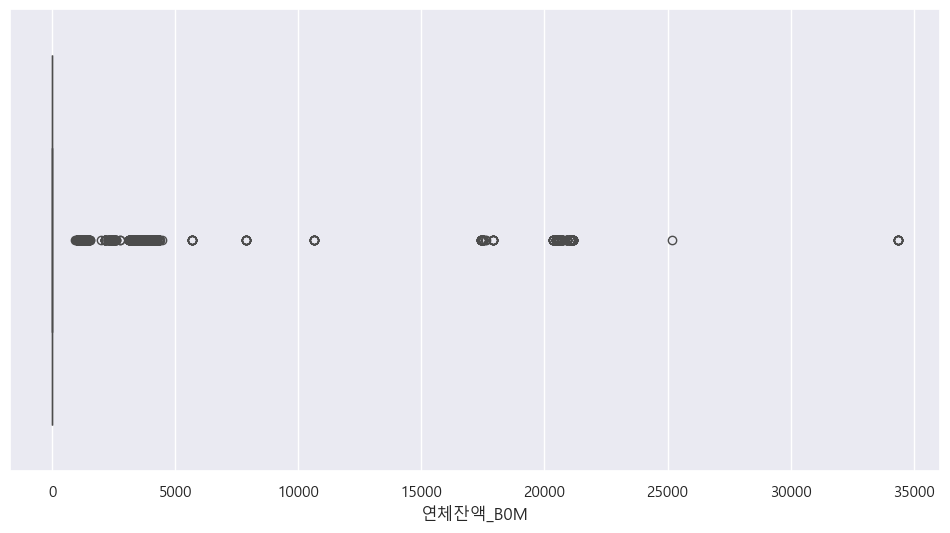

In [362]:
sns.boxplot(data=temp[temp['Segment']=='C'], x='연체잔액_B0M')
plt.show()

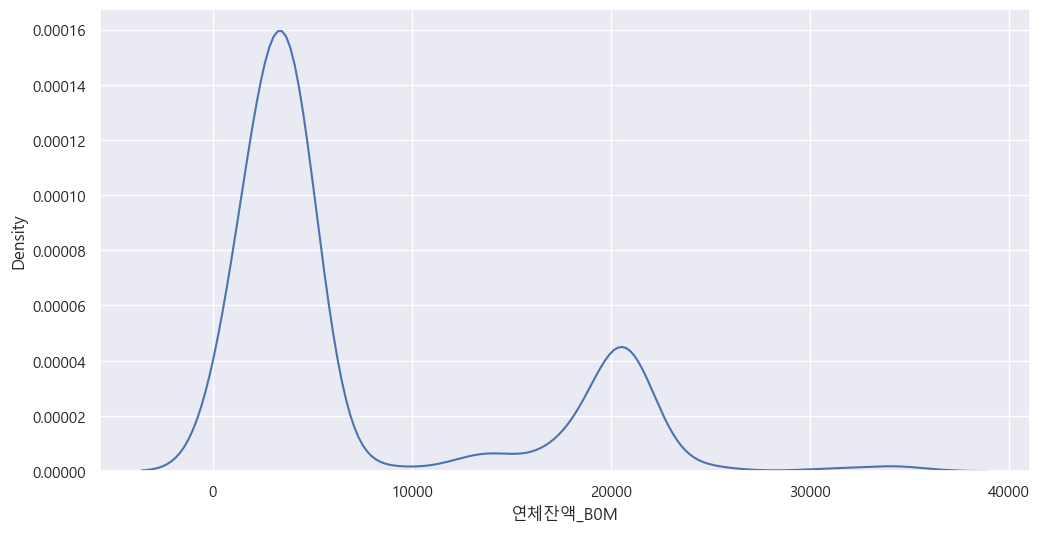

In [366]:
sns.kdeplot(data=temp[(temp['Segment']=='D') & (temp['연체잔액_B0M'] > 1000)], x='연체잔액_B0M')
plt.show()

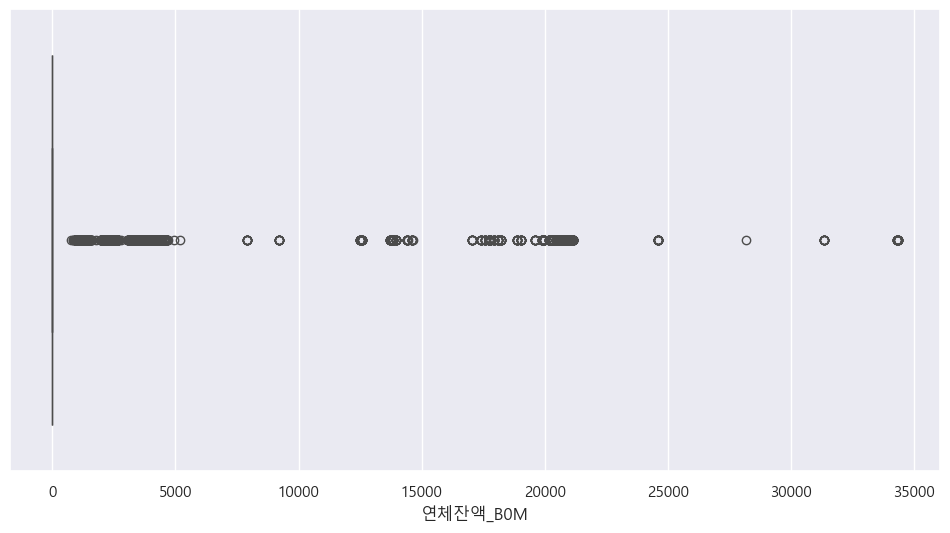

In [360]:
sns.boxplot(data=temp[temp['Segment']=='D'], x='연체잔액_B0M')
plt.show()

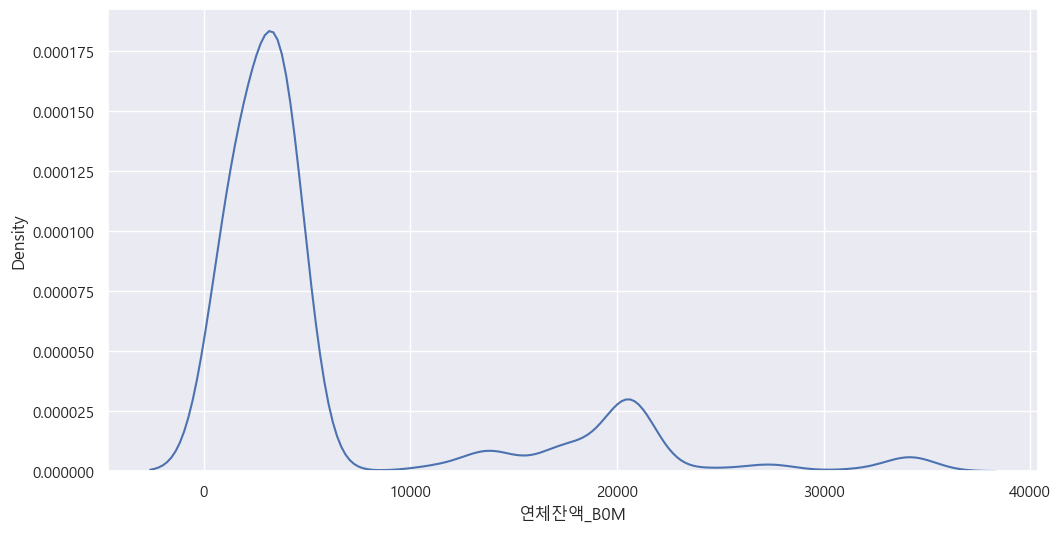

In [367]:
sns.kdeplot(data=temp[(temp['Segment']=='E') & (temp['연체잔액_B0M'] > 1000)], x='연체잔액_B0M')
plt.show()

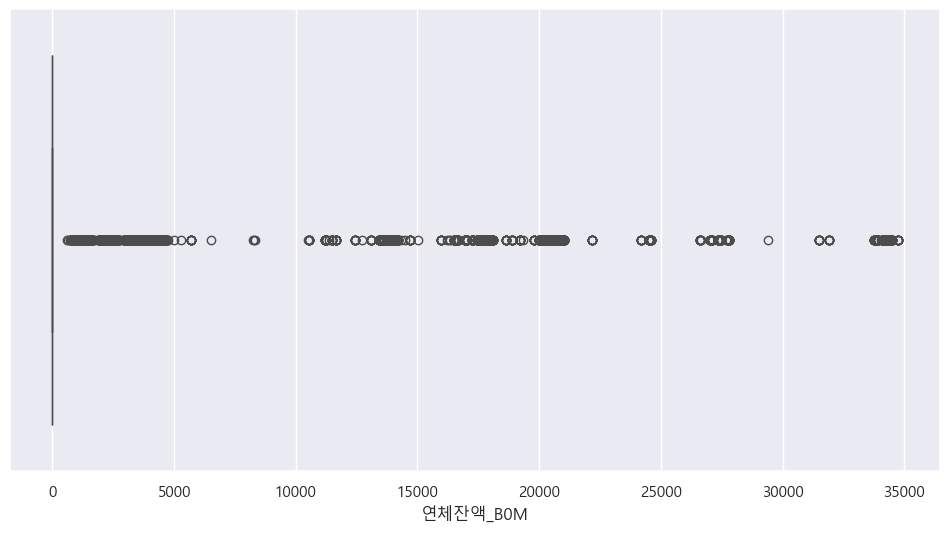

In [361]:
sns.boxplot(data=temp[temp['Segment']=='E'], x='연체잔액_B0M')
plt.show()

#### 연체원금_B1M, 연체원금_B2M X Segment

In [372]:
temp=df[['Segment',"연체잔액_B0M",'연체원금_B1M','연체원금_B2M']]
temp

,Segment,연체잔액_B0M,연체원금_B1M,연체원금_B2M
0,3,0,0,0
1,3,0,0,0
2,3,0,0,0
3,4,0,0,0
4,4,0,0,0
...,...,...,...,...
4799995,4,0,0,0
4799996,4,0,0,0
4799997,4,0,0,0
4799998,4,0,0,0


In [373]:
temp['Segment']=encoder.inverse_transform(temp['Segment'])

In [377]:
temp.groupby('Segment')['연체원금_B2M'].agg(['mean', 'std', 'max','count','sum'])

,mean,std,max,count,sum
Segment,,,,,
A,0.000000,0.000000,0,1944,0
B,0.000000,0.000000,0,288,0
C,29.195439,418.906035,15779,255180,7450092
D,37.871012,490.543131,16542,698484,26452296
E,22.393879,334.849491,18116,3844104,86084399


In [378]:
temp.groupby('Segment')['연체원금_B1M'].agg(['mean', 'std', 'max','count','sum'])

,mean,std,max,count,sum
Segment,,,,,
A,0.000000,0.000000,0,1944,0
B,0.000000,0.000000,0,288,0
C,34.143507,497.621802,15779,255180,8712740
D,44.420617,593.250834,16542,698484,31027090
E,25.660309,393.184149,18116,3844104,98640897


In [379]:
temp.groupby('Segment')['연체잔액_B0M'].agg(['mean', 'std', 'max','count','sum'])

,mean,std,max,count,sum
Segment,,,,,
A,0.000000,0.000000,0,1944,0
B,0.000000,0.000000,0,288,0
C,19.988334,546.162174,34354,255180,5100623
D,30.661878,678.633644,34323,698484,21416831
E,14.595683,466.476675,34725,3844104,56107325


#### diff_연체원금_B1-2M / 연체원금_B1M, 연체원금_B2M

In [380]:
df_temp['diff_연체원금_B1-2M'] = df_temp['연체원금_B1M'] - df_temp['연체원금_B2M']
df_temp['diff_연체원금_B1-2M']

0          0
1          0
2          0
3          0
4          0
          ..
4799995    0
4799996    0
4799997    0
4799998    0
4799999    0
Name: diff_연체원금_B1-2M, Length: 4800000, dtype: int64

In [398]:
conditions = [
    df_temp['diff_연체원금_B1-2M'] > 0,
    df_temp['diff_연체원금_B1-2M'] < 0,
    df_temp['diff_연체원금_B1-2M'] == 0
]

choices = ['증가', '감소', '유지']

df_temp['diff_연체원금_B1-2M_category'] = np.select(conditions, choices, default='기타')

In [392]:
temp=df_temp[['Segment',"diff_연체원금_B1-2M",'diff_연체원금_B1-2M_category']]
temp

,Segment,diff_연체원금_B1-2M,diff_연체원금_B1-2M_category
0,3,0,유지
1,3,0,유지
2,3,0,유지
3,4,0,유지
4,4,0,유지
...,...,...,...
4799995,4,0,유지
4799996,4,0,유지
4799997,4,0,유지
4799998,4,0,유지


In [395]:
diff_연체금_encoder = LabelEncoder()
temp['diff_연체원금_B1-2M_category']=diff_연체금_encoder.fit_transform(temp['diff_연체원금_B1-2M_category'])

In [407]:
temp['Segment']=encoder.inverse_transform(temp['Segment'])
#temp['diff_연체원금_B1-2M_category']=encoder.inverse_transform(temp['diff_연체원금_B1-2M_category'])

ValueError: y contains previously unseen labels: ['A' 'B' 'C' 'D' 'E']

In [387]:
temp.groupby('Segment')['diff_연체원금_B1-2M'].agg(['mean', 'std', 'max','count','sum'])

,mean,std,max,count,sum
Segment,,,,,
A,0.000000,0.000000,0,1944,0
B,0.000000,0.000000,0,288,0
C,4.948068,230.028495,9806,255180,1262648
D,6.549605,268.037385,9891,698484,4574794
E,3.266430,189.462593,8672,3844104,12556498


In [404]:
temp.groupby(['Segment','diff_연체원금_B1-2M_category']).count()

diff_연체원금_B1-2M
Segment diff_연체원금_B1-2M_category                 
A       유지                                   1944
B       유지                                    288
C       감소                                    687
        유지                                 252945
        증가                                   1548
D       감소                                   2666
        유지                                 690753
        증가                                   5065
E       감소                                  13777
        유지                                3806231
        증가                                  24096

In [406]:
# 개수 테이블
count_table = temp.groupby(['Segment', 'diff_연체원금_B1-2M_category']).size().unstack(fill_value=0)

# 비율 계산 (row-wise)
ratio_table = count_table.div(count_table.sum(axis=1), axis=0)

# 보기 좋게 정리 (비율을 %로)
ratio_table = (ratio_table * 100).round(2)
ratio_table

diff_연체원금_B1-2M_category,감소,유지,증가
Segment,,,
A,0.00,100.00,0.00
B,0.00,100.00,0.00
C,0.27,99.12,0.61
D,0.38,98.89,0.73
E,0.36,99.01,0.63


#### 수치형 X 수치형

,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,월중평잔_CA_B0M,연체잔액_B0M,...,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M,Segment
잔액_일시불_B0M,1.000000,0.147430,0.035313,0.547278,0.033908,0.029197,0.958477,0.099602,0.027827,-0.005800,...,0.879011,0.342811,0.634464,0.270195,0.107290,0.005925,0.026159,0.010251,0.024695,-0.419460
잔액_할부_B0M,0.147430,1.000000,0.119288,0.045616,-0.006878,0.106922,0.137257,0.928400,0.105548,0.022749,...,0.112039,0.084222,0.065499,0.053715,0.873797,0.073679,0.105742,-0.002671,0.094622,-0.260857
잔액_현금서비스_B0M,0.035313,0.119288,1.000000,0.123532,0.073604,0.128414,0.025287,0.086849,0.973125,0.069263,...,0.017859,-0.007162,0.083550,0.018846,0.089298,0.017603,0.938414,0.000322,0.125488,-0.265017
잔액_리볼빙일시불이월_B0M,0.547278,0.045616,0.123532,1.000000,0.147151,0.082439,0.520381,0.028001,0.106800,0.018312,...,0.489298,0.105447,0.836038,0.289928,0.031269,0.001855,0.099592,-0.002702,0.080447,-0.068808
잔액_리볼빙CA이월_B0M,0.033908,-0.006878,0.073604,0.147151,1.000000,0.004410,0.024335,-0.005938,0.060102,0.000396,...,0.030509,0.007753,0.101052,0.028674,-0.005889,-0.000720,0.054018,-0.000426,0.004233,-0.001048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
평잔_할부_해외_6M,0.005925,0.073679,0.017603,0.001855,-0.000720,0.014664,0.005305,0.072425,0.016887,-0.001113,...,0.008471,0.087382,0.004493,0.027322,0.071393,1.000000,0.017326,0.003433,0.013956,-0.026820
평잔_CA_6M,0.026159,0.105742,0.938414,0.099592,0.054018,0.109822,0.018674,0.078710,0.961422,0.039539,...,0.013014,-0.004963,0.067326,0.015815,0.083570,0.017326,1.000000,0.000717,0.111854,-0.277397
평잔_CA_해외_6M,0.010251,-0.002671,0.000322,-0.002702,-0.000426,-0.003327,0.013041,-0.001666,0.003107,-0.000659,...,0.017090,0.077543,0.002857,0.028271,-0.001567,0.003433,0.000717,1.000000,-0.002819,-0.016221
평잔_카드론_6M,0.024695,0.094622,0.125488,0.080447,0.004233,0.928742,0.010707,0.076242,0.108998,0.024603,...,0.007616,-0.010899,0.083667,0.033522,0.079083,0.013956,0.111854,-0.002819,1.000000,-0.046948


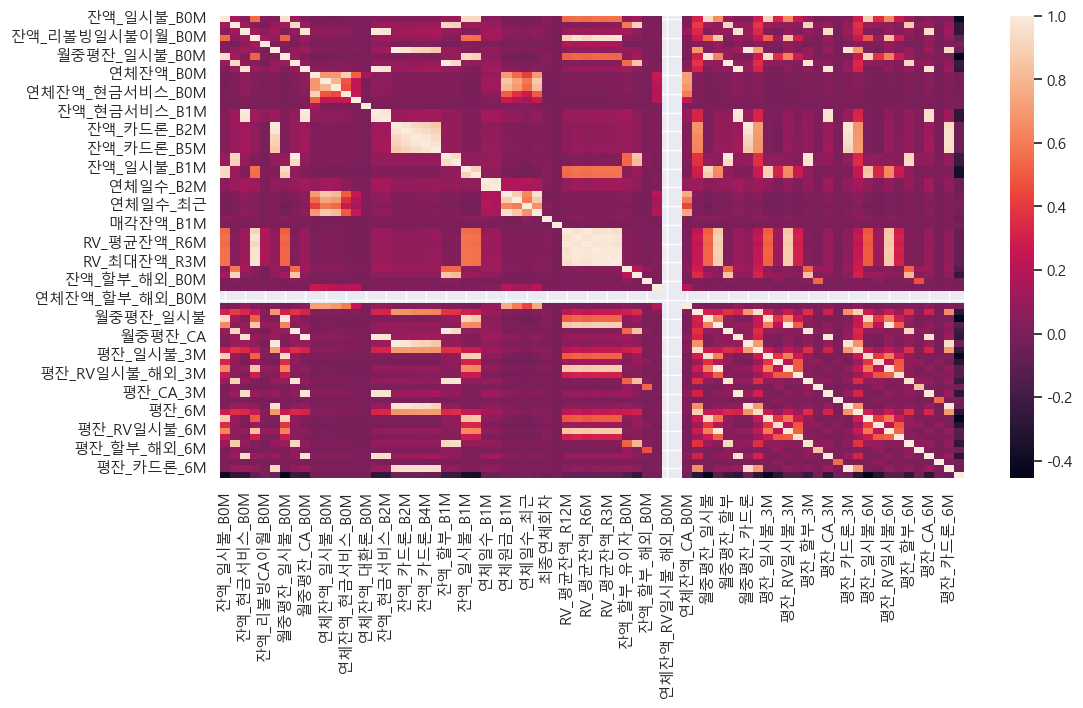

In [303]:
cor_data=df_temp.corr()
display(cor_data)
sns.heatmap(cor_data)
plt.show()

In [ ]:
col_list=list(df_temp.columns)

In [ ]:
temp=col_list[:16] + ['Segment']

In [ ]:
cor_data=df_temp[temp].corr()
display(cor_data)
sns.heatmap(cor_data)
plt.show()